In [427]:
import pandas as pd

Load LEGO sets data

In [428]:
LEGO_sets_df = pd.read_csv('sets.csv')

### Original data set

https://www.kaggle.com/datasets/alexracape/lego-sets-and-prices-over-time/data


# Video Presentation

Link: https://www.youtube.com/watch?v=gGFd3lCo-5k

# Business Plan

We have hear rumors on the internet that investing in LEGO sets can be a good investment. Some claims that it can even be more profitable than investing in S&P 500. If this is true we want a tool that can predict what LEGO sets are worth investing in, when they are released.


Based on this we want to do a supervised learning regression problem where we predict the price of a LEGO set, after a given number of years, based on the features of the set in the current year.


If one of our models scores above an R² of 0.5 we will consider it a success. 

# Data overview

In [429]:
LEGO_sets_df.head()

Set_ID            Name  Year      Theme Theme_Group   Subtheme Category  \
0   75-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
1   77-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
2  077-1  Pre-School Set  1975      Duplo  Pre-school        NaN   Normal   
3   78-1   PreSchool Set  1975  PreSchool  Pre-school        NaN   Normal   
4   78-3       Basic Set  1975  Samsonite     Vintage  Basic set   Normal   

         Packaging  Num_Instructions     Availability  Pieces  Minifigures  \
0  {Not specified}                 0  {Not specified}    16.0          NaN   
1  {Not specified}                 0  {Not specified}    20.0          NaN   
2  {Not specified}                 0  {Not specified}    21.0          NaN   
3  {Not specified}                 0  {Not specified}    32.0          NaN   
4              Box                 0  {Not specified}   330.0          NaN   

   Owned  Rating  USD_MSRP  Total_Quantity  Current_Price  
0   10.0     0.0       NaN             NaN            NaN  
1   11.0     0.0       NaN             NaN            NaN  
2   10.0     0.0       NaN             0.0            NaN  
3    8.0     0.0       NaN             NaN            NaN  
4   10.0     0.0       NaN             0.0            NaN

In [430]:
tmp = LEGO_sets_df.copy()
tmp = tmp[['Name','Year','Theme','Theme_Group','Subtheme']]
# select a slice of 10
tmp.iloc[12034:12044]

Name  Year                  Theme  \
12034              Unikitty Roller Coaster Wagon  2018               Unikitty   
12035                Harry's Journey to Hogwarts  2018           Harry Potter   
12036                        Royal Talon Fighter  2018    Marvel Super Heroes   
12037                         Imperial AT-Hauler  2018              Star Wars   
12038  Robot/Vehicle Free Builds - Make It Yours  2018          Miscellaneous   
12039                        The Guardians' Ship  2018    Marvel Super Heroes   
12040                The Mini Ultimate Batmobile  2018  The LEGO Batman Movie   
12041                     WU-CRU Target Training  2018                Ninjago   
12042                           Sons of Garmadon  2018                Ninjago   
12043                                      Turbo  2018                Ninjago   

            Theme_Group                Subtheme  
12034          Licensed             Promotional  
12035          Licensed     Philosopher's Stone  
12036          Licensed           Black Panther  
12037          Licensed                    Solo  
12038     Miscellaneous           Make It Yours  
12039          Licensed  Avengers: Infinity War  
12040          Licensed           Miscellaneous  
12041  Action/Adventure                 General  
12042  Action/Adventure        Sons of Garmadon  
12043  Action/Adventure        Sons of Garmadon

Total_Quantity = Number of sets currently available for sale on Bricklink.com

Current_Price = Current price of the set in USD

In [431]:
LEGO_sets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14936 entries, 0 to 14935
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            14936 non-null  object 
 1   Name              14936 non-null  object 
 2   Year              14936 non-null  int64  
 3   Theme             14936 non-null  object 
 4   Theme_Group       14915 non-null  object 
 5   Subtheme          11495 non-null  object 
 6   Category          14936 non-null  object 
 7   Packaging         14936 non-null  object 
 8   Num_Instructions  14936 non-null  int64  
 9   Availability      14936 non-null  object 
 10  Pieces            13133 non-null  float64
 11  Minifigures       7686 non-null   float64
 12  Owned             14771 non-null  float64
 13  Rating            14936 non-null  float64
 14  USD_MSRP          5837 non-null   float64
 15  Total_Quantity    12276 non-null  float64
 16  Current_Price     5442 non-null   float6

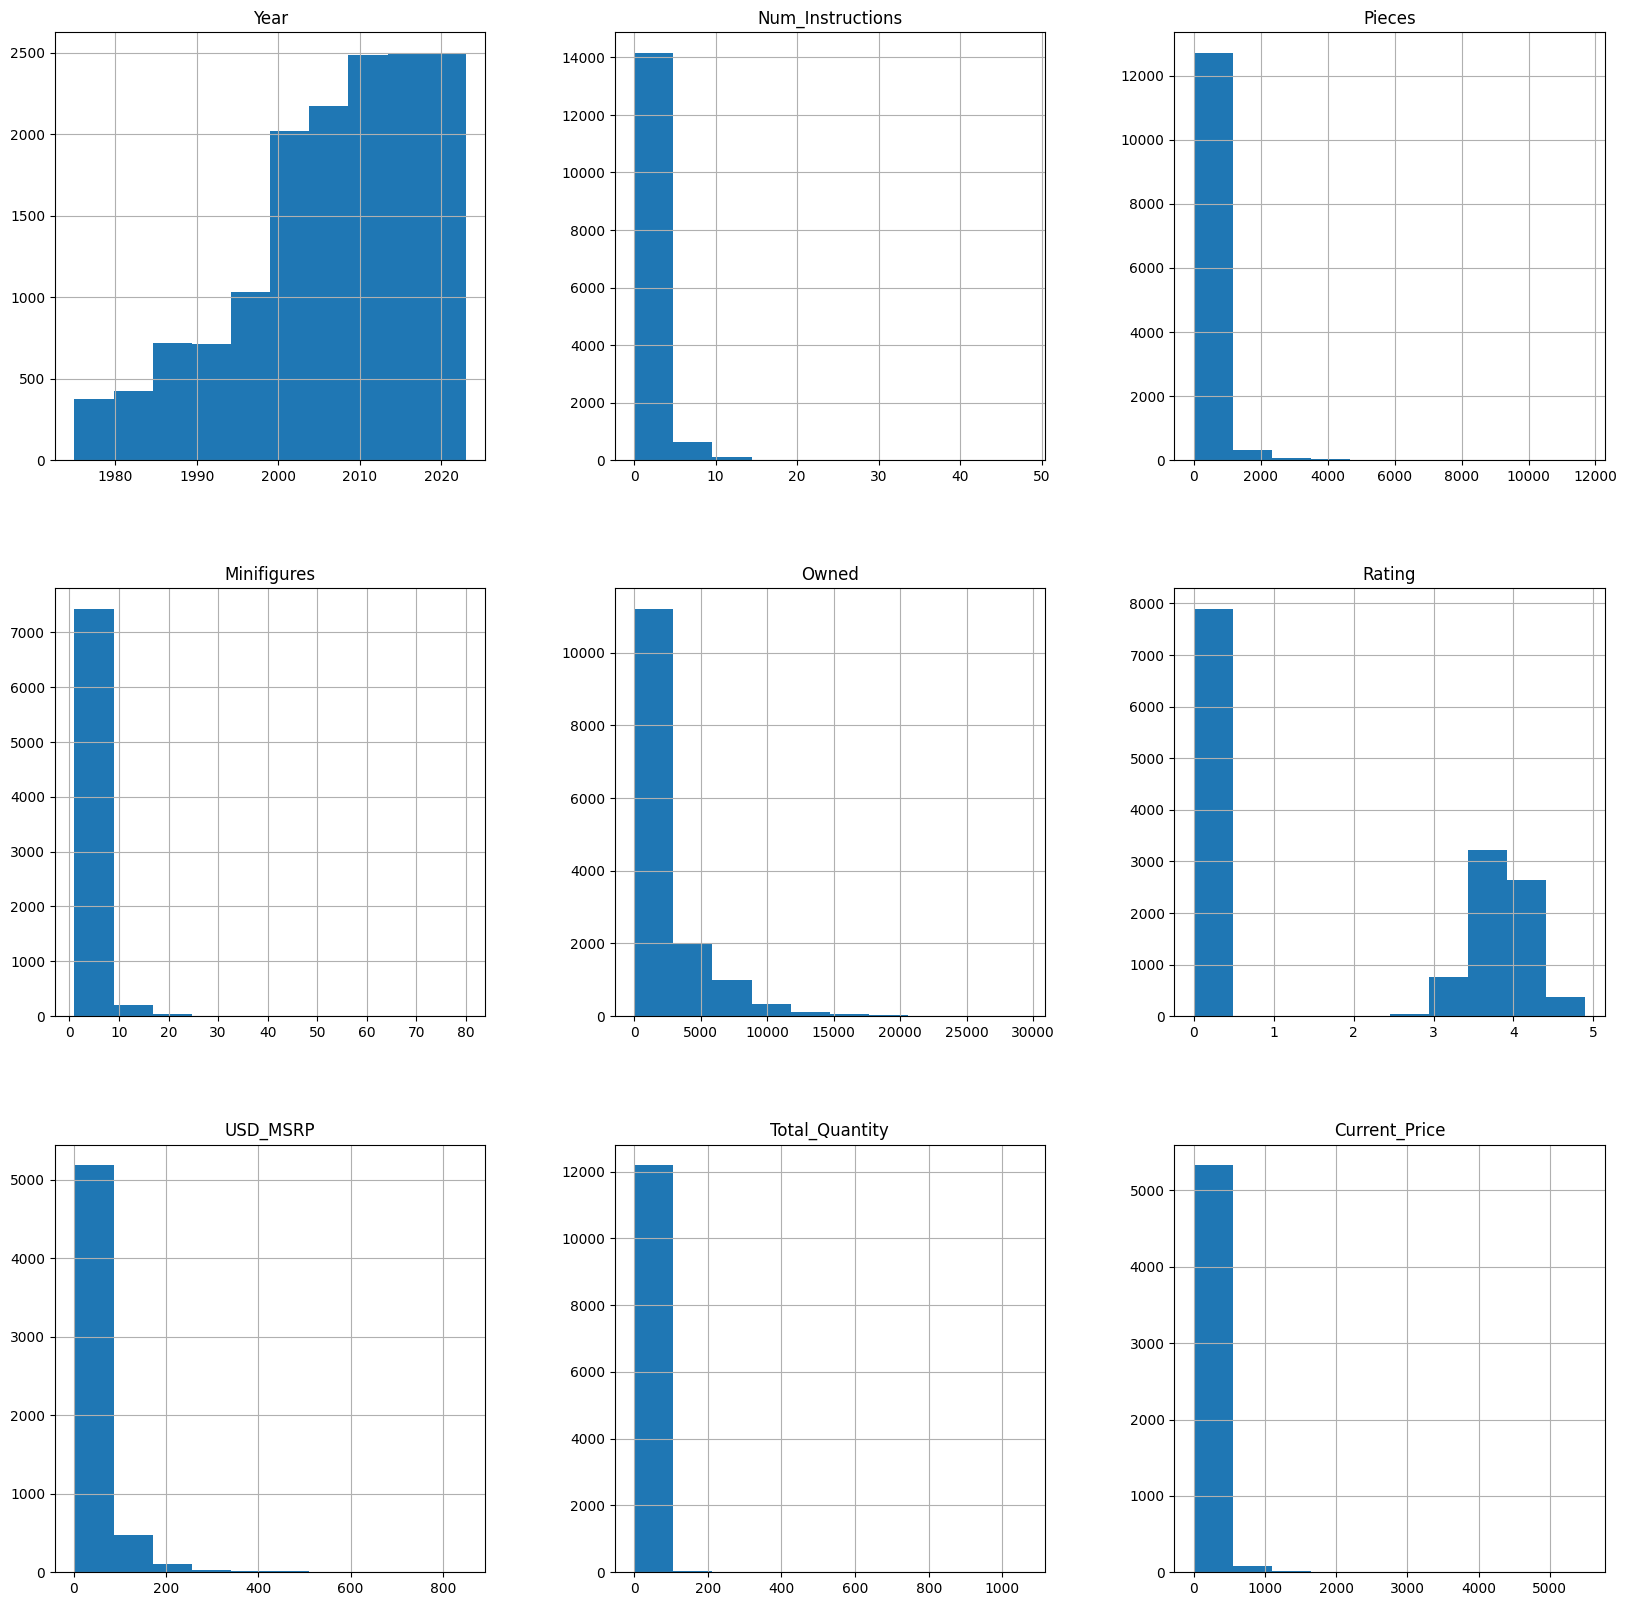

In [432]:
# make histogram of numeric columns only

import matplotlib.pyplot as plt
LEGO_sets_df.hist(figsize=(20,20))
plt.show()

# Price of sets

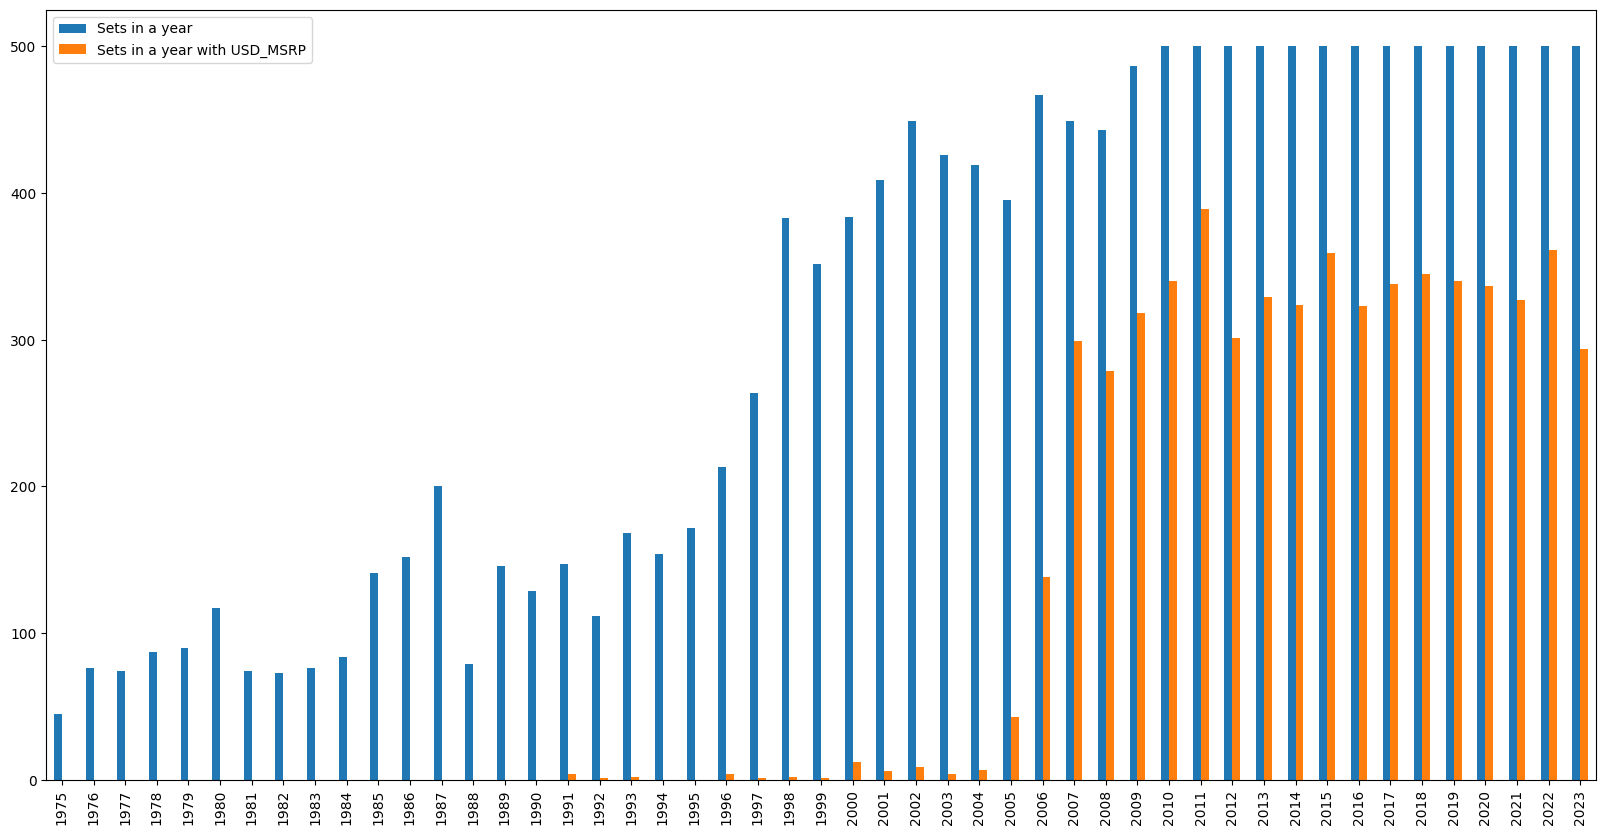

In [433]:
import matplotlib.pyplot as plt

# Calculate value counts
all_years = LEGO_sets_df['Year'].value_counts().sort_index()
non_null_years = LEGO_sets_df[LEGO_sets_df['USD_MSRP'].notnull()]['Year'].value_counts().sort_index()

# Create a DataFrame from the value counts
df = pd.DataFrame({'Sets in a year': all_years, 'Sets in a year with USD_MSRP': non_null_years})

# Create the bar plot
df.plot(kind='bar', figsize=(20,10))

plt.show()

look at price box plot grouped by year after the year 2005

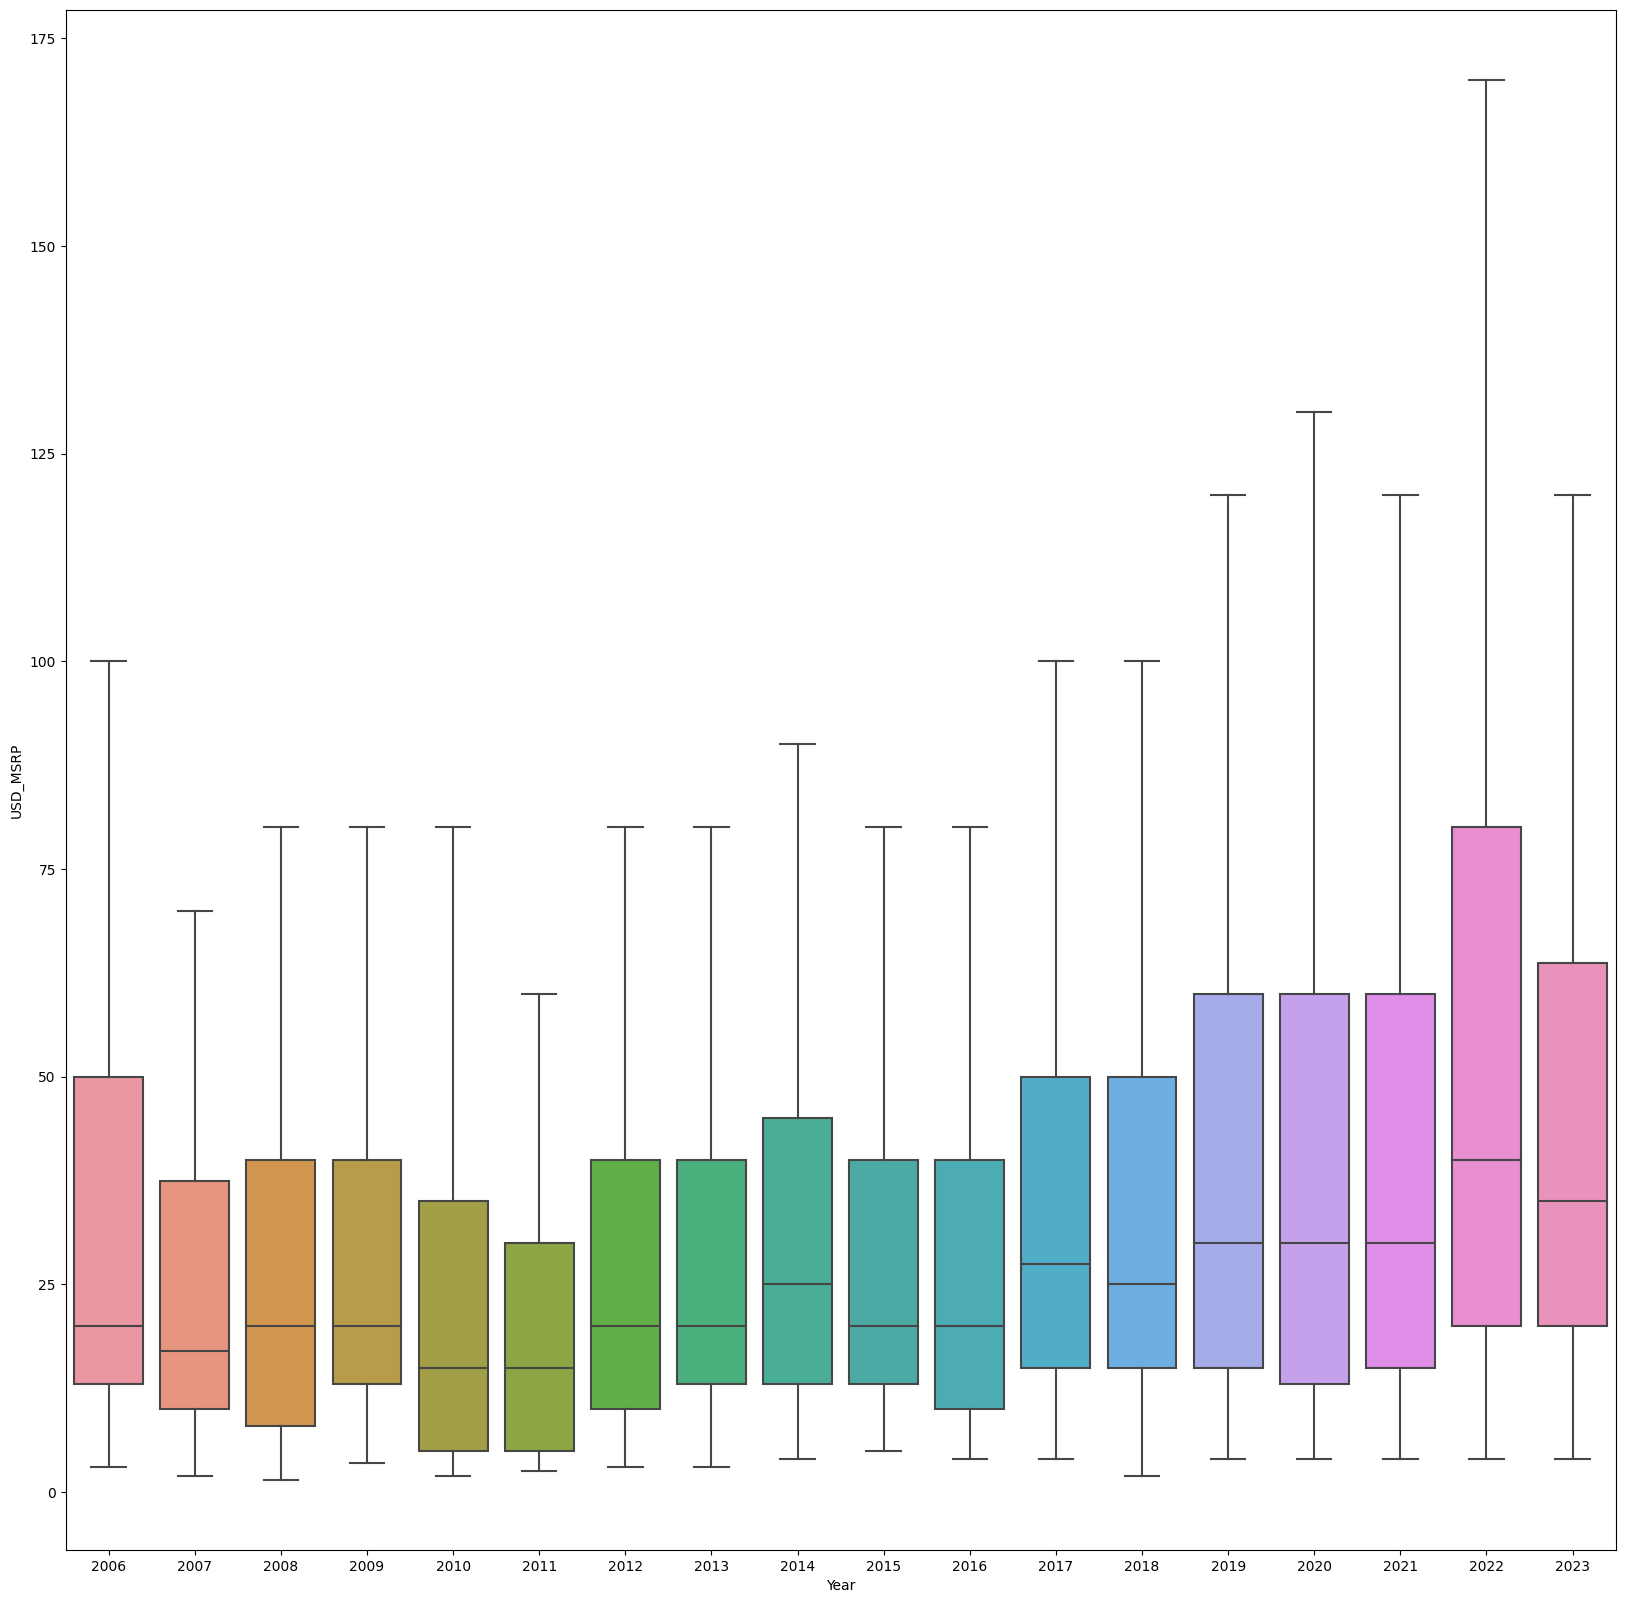

In [434]:
import seaborn as sns

# Filter the DataFrame
SETS_after_2005_df = LEGO_sets_df[LEGO_sets_df['Year'] > 2005]

# Make box plot of price grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=SETS_after_2005_df, showfliers=False)
plt.show()

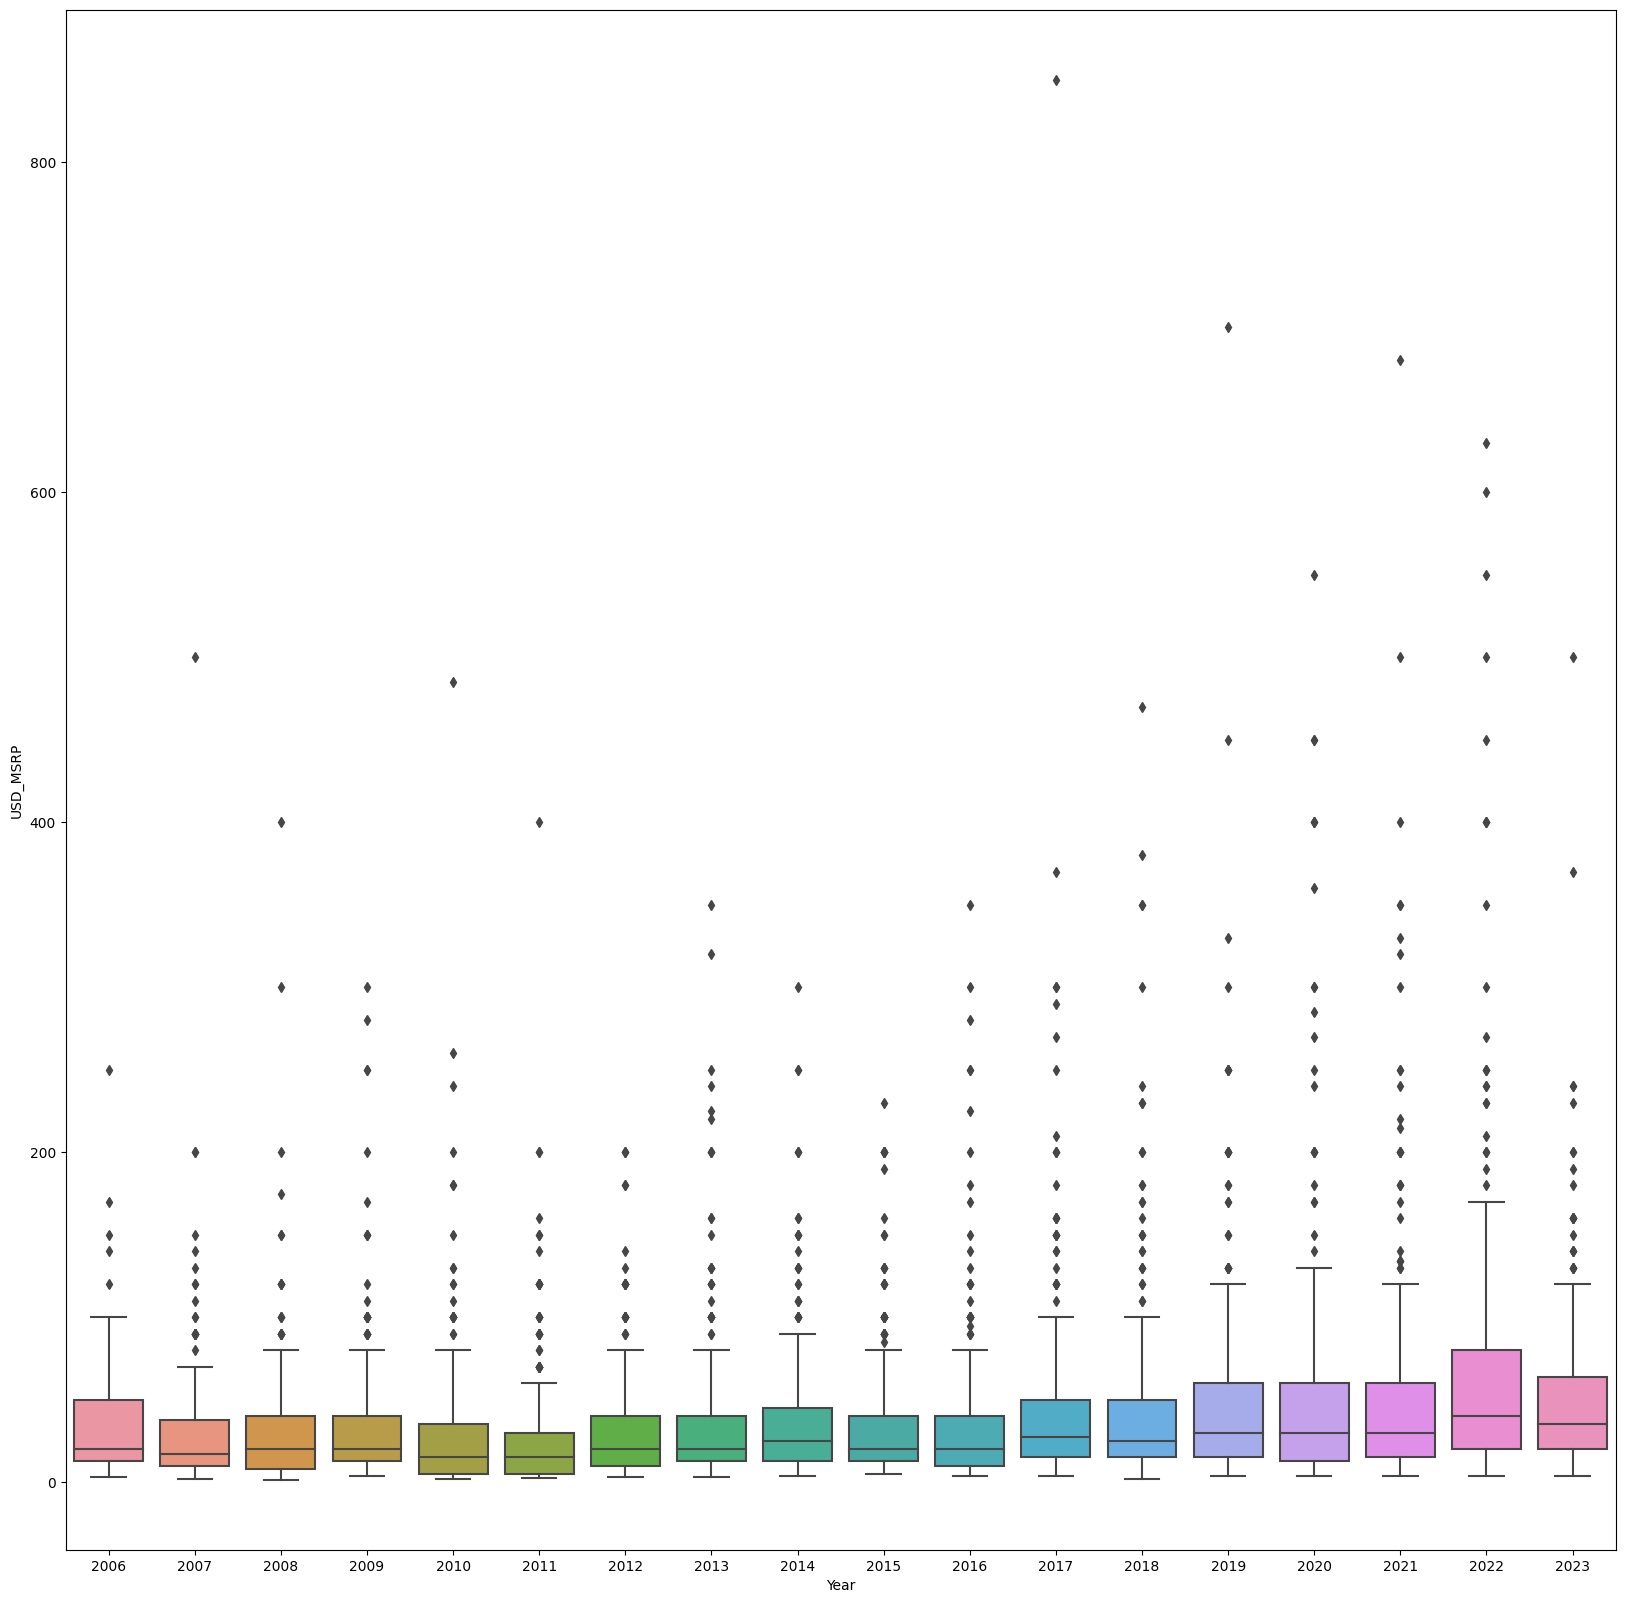

In [435]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=SETS_after_2005_df, showfliers=True)
plt.show()

## Difference in price (retail - current)

<Axes: xlabel='Name'>

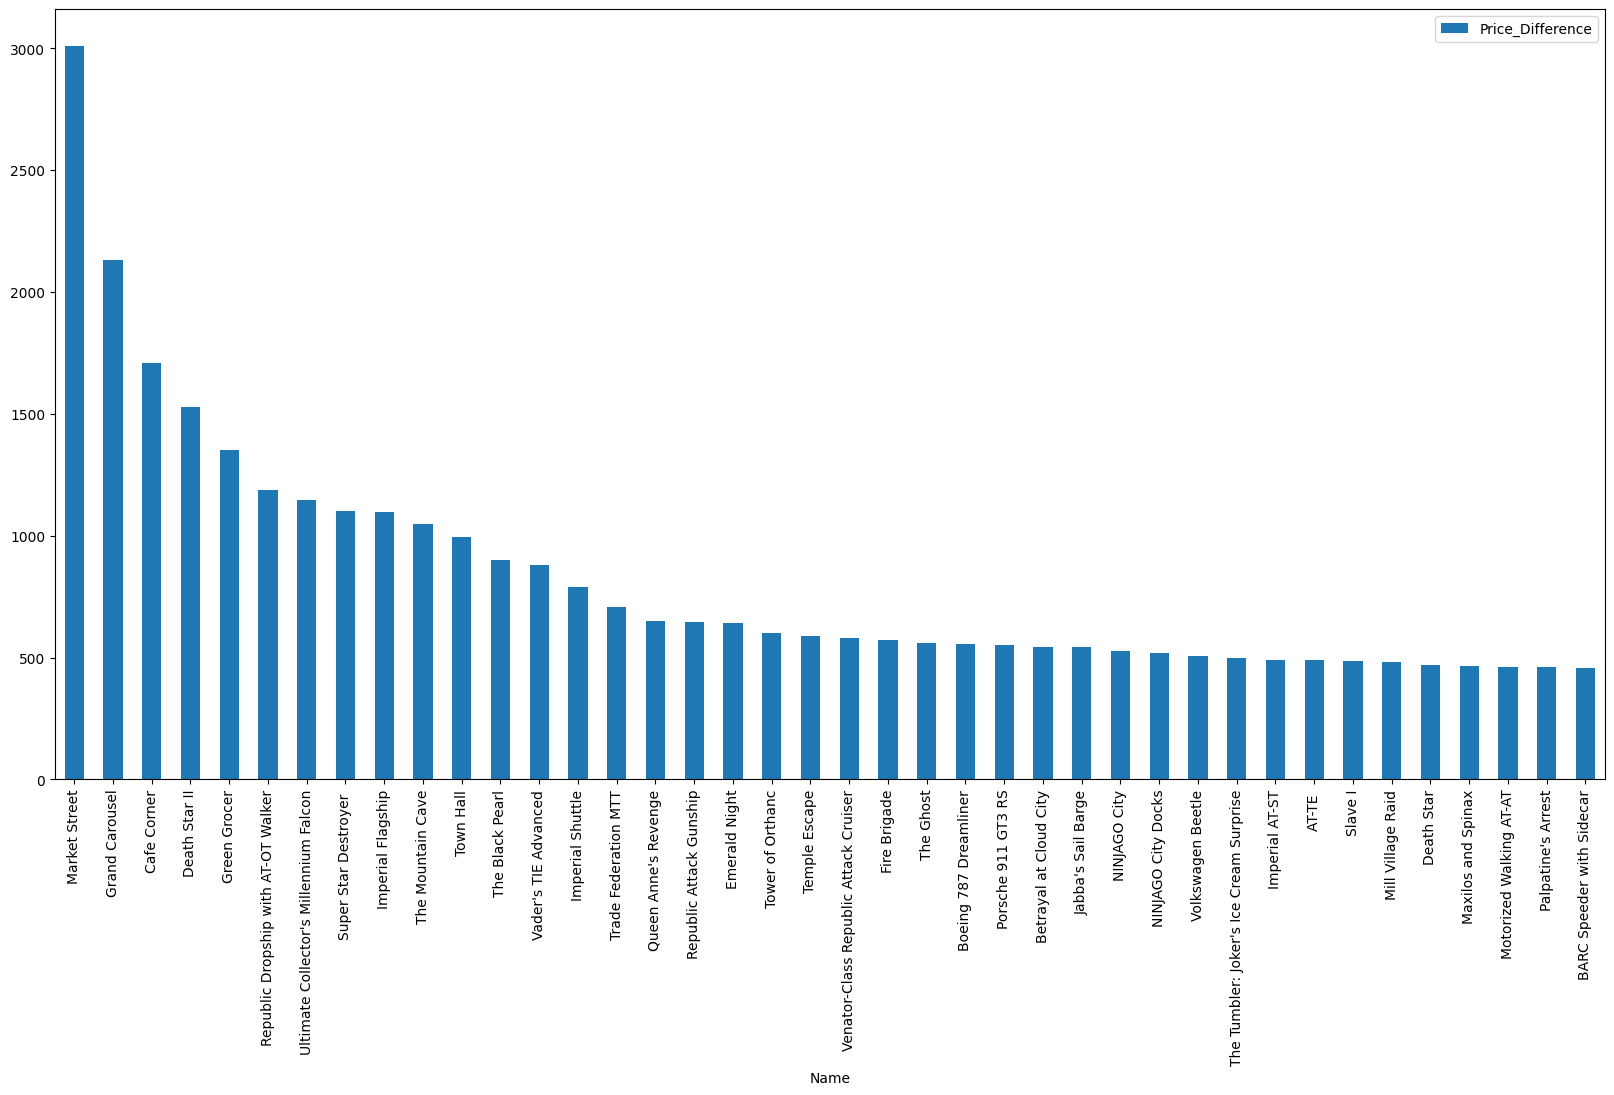

In [436]:
# show the 10 biggest differences between Current_Price and USD_MSRP

LEGO_sets_df['Price_Difference'] = LEGO_sets_df['Current_Price'] - LEGO_sets_df['USD_MSRP']
LEGO_sets_df.sort_values(by='Price_Difference', ascending=False).head(40).plot(x='Name', y='Price_Difference', kind='bar', figsize=(20,10))

In [437]:
LEGO_sets_df.sort_values(by='Price_Difference', ascending=False).head(10)

Set_ID                                    Name  Year            Theme  \
6787   10190-1                           Market Street  2007  Advanced models   
7691   10196-1                          Grand Carousel  2009  Advanced models   
6785   10182-1                             Cafe Corner  2007  Advanced models   
5973   10143-1                           Death Star II  2005        Star Wars   
7245   10185-1                            Green Grocer  2008  Advanced models   
7690   10195-1     Republic Dropship with AT-OT Walker  2009        Star Wars   
6783   10179-1  Ultimate Collector's Millennium Falcon  2007        Star Wars   
8724   10221-1                   Super Star Destroyer   2011        Star Wars   
8202   10210-1                       Imperial Flagship  2010  Advanced models   
11508  21137-1                       The Mountain Cave  2017        Minecraft   

        Theme_Group                      Subtheme Category Packaging  \
6787   Model making  Modular Buildings Collection   Normal       Box   
7691   Model making         Fairground Collection   Normal       Box   
6785   Model making  Modular Buildings Collection   Normal       Box   
5973       Licensed     Ultimate Collector Series   Normal       Box   
7245   Model making  Modular Buildings Collection   Normal       Box   
7690       Licensed                The Clone Wars   Normal       Box   
6783       Licensed     Ultimate Collector Series   Normal       Box   
8724       Licensed     Ultimate Collector Series   Normal       Box   
8202   Model making                 Miscellaneous   Normal       Box   
11508      Licensed                 Minifig-scale   Normal       Box   

       Num_Instructions    Availability  Pieces  Minifigures   Owned  Rating  \
6787                  0  LEGO exclusive  1248.0          3.0  4627.0     4.3   
7691                  2  LEGO exclusive  3263.0          9.0  2463.0     4.3   
6785                  2  LEGO exclusive  2056.0          3.0  7307.0     4.4   
5973                  1  LEGO exclusive  3441.0          NaN  2884.0     4.4   
7245                  3  LEGO exclusive  2352.0          4.0  9048.0     4.6   
7690                  6  LEGO exclusive  1758.0          8.0  4187.0     4.5   
6783                  1  LEGO exclusive  5197.0          5.0  4567.0     4.7   
8724                  1  LEGO exclusive  3152.0          5.0  7640.0     4.4   
8202                  4  LEGO exclusive  1664.0          9.0  5433.0     4.6   
11508                 2  LEGO exclusive  2863.0          6.0   915.0     4.4   

       USD_MSRP  Total_Quantity  Current_Price  Price_Difference  
6787      89.99             2.0      3099.9900         3010.0000  
7691     249.99             1.0      2380.7918         2130.8018  
6785     139.99             4.0      1850.0000         1710.0100  
5973     269.99             6.0      1800.0000         1530.0100  
7245     149.99             5.0      1500.0000         1350.0100  
7690     249.99             3.0      1439.5109         1189.5209  
6783     499.99             1.0      1645.9363         1145.9463  
8724     399.99             9.0      1499.9900         1100.0000  
8202     179.99             7.0      1275.3740         1095.3840  
11508    249.99             1.0      1300.0000         1050.0100

In [438]:
temp = LEGO_sets_df.copy()
temp = temp[['Name','Year','Theme','USD_MSRP','Current_Price','Price_Difference']]
temp.sort_values(by='Price_Difference', ascending=False).head(10)

Name  Year            Theme  \
6787                            Market Street  2007  Advanced models   
7691                           Grand Carousel  2009  Advanced models   
6785                              Cafe Corner  2007  Advanced models   
5973                            Death Star II  2005        Star Wars   
7245                             Green Grocer  2008  Advanced models   
7690      Republic Dropship with AT-OT Walker  2009        Star Wars   
6783   Ultimate Collector's Millennium Falcon  2007        Star Wars   
8724                    Super Star Destroyer   2011        Star Wars   
8202                        Imperial Flagship  2010  Advanced models   
11508                       The Mountain Cave  2017        Minecraft   

       USD_MSRP  Current_Price  Price_Difference  
6787      89.99      3099.9900         3010.0000  
7691     249.99      2380.7918         2130.8018  
6785     139.99      1850.0000         1710.0100  
5973     269.99      1800.0000         1530.0100  
7245     149.99      1500.0000         1350.0100  
7690     249.99      1439.5109         1189.5209  
6783     499.99      1645.9363         1145.9463  
8724     399.99      1499.9900         1100.0000  
8202     179.99      1275.3740         1095.3840  
11508    249.99      1300.0000         1050.0100

The most expensive sets in terms of current price are those of Advanced models for model making or Star Wars Lego sets. Some of those of Star Wars theme are of Ultimate Collector Series. 

### Group by theme and subtheme

<Axes: xlabel='Theme'>

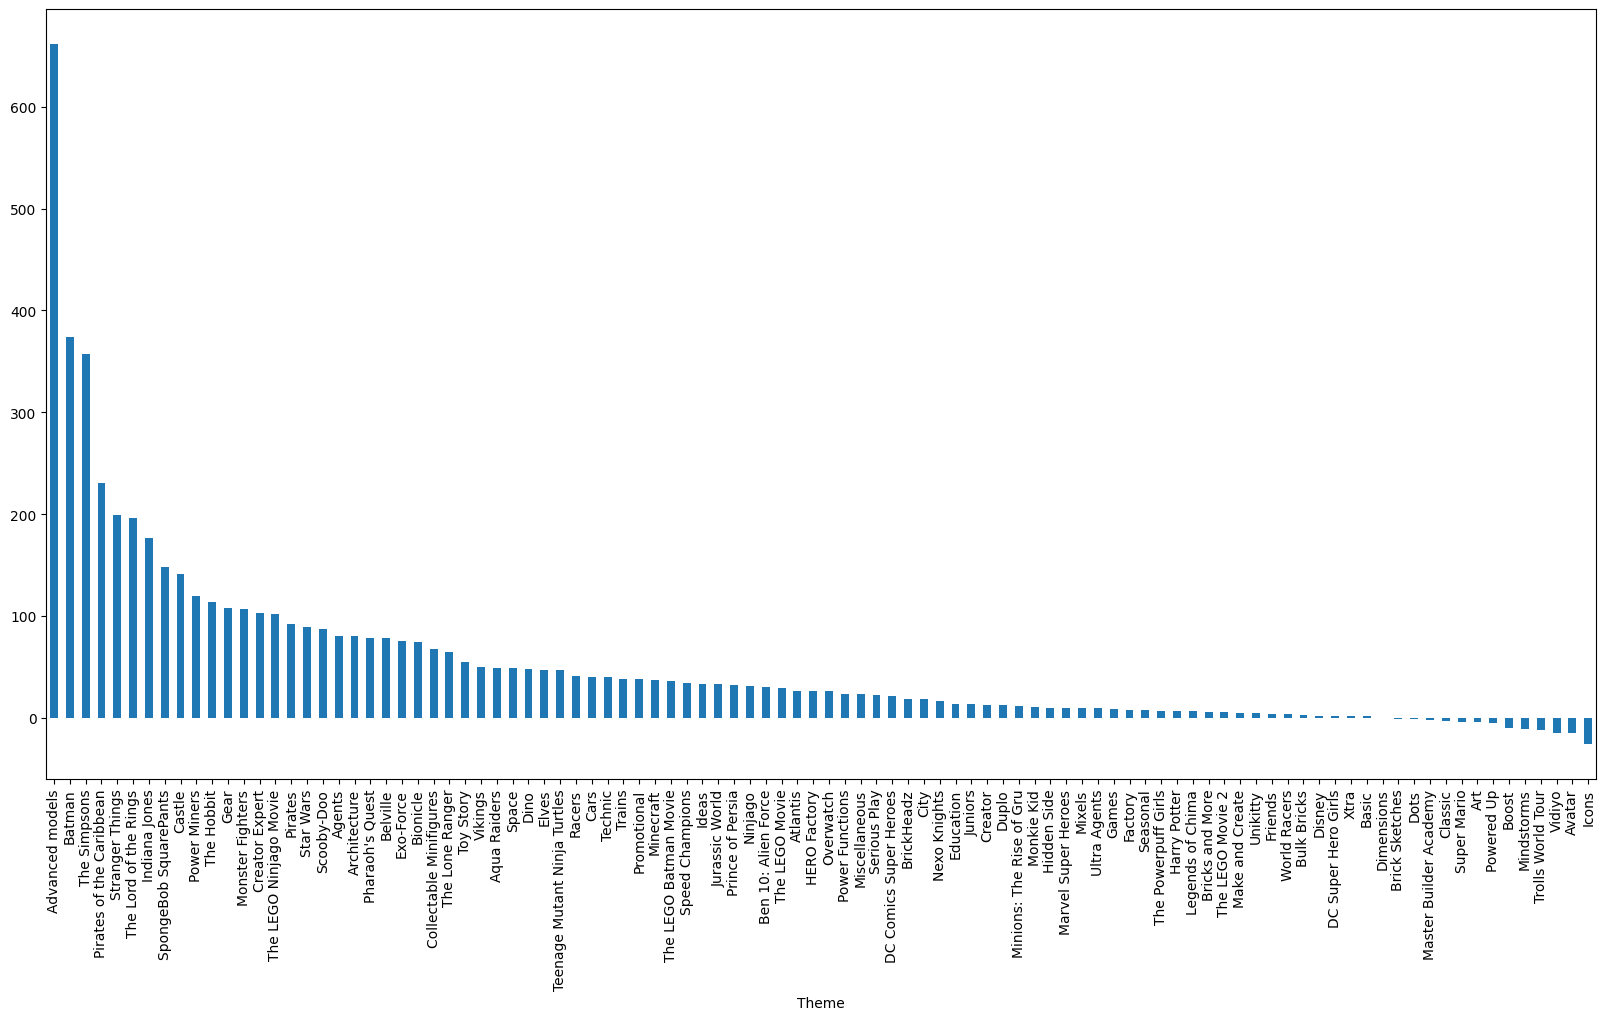

In [439]:
# average Price_Difference per Theme where Price_Difference is not NaN

LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby('Theme')['Price_Difference'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [440]:
LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby('Theme')['Price_Difference'].mean().sort_values(ascending=False).head(20)

Theme
Advanced models             661.415350
Batman                      373.755000
The Simpsons                356.948100
Pirates of the Caribbean    230.906340
Stranger Things             199.010000
The Lord of the Rings       196.404233
Indiana Jones               176.264272
SpongeBob SquarePants       148.369469
Castle                      140.786971
Power Miners                119.549660
The Hobbit                  113.654057
Gear                        108.310633
Monster Fighters            107.230378
Creator Expert              103.236677
The LEGO Ninjago Movie      101.677461
Pirates                      91.980257
Star Wars                    88.782686
Scooby-Doo                   87.148920
Agents                       80.796662
Architecture                 80.169120
Name: Price_Difference, dtype: float64

<Axes: xlabel='Theme,Subtheme'>

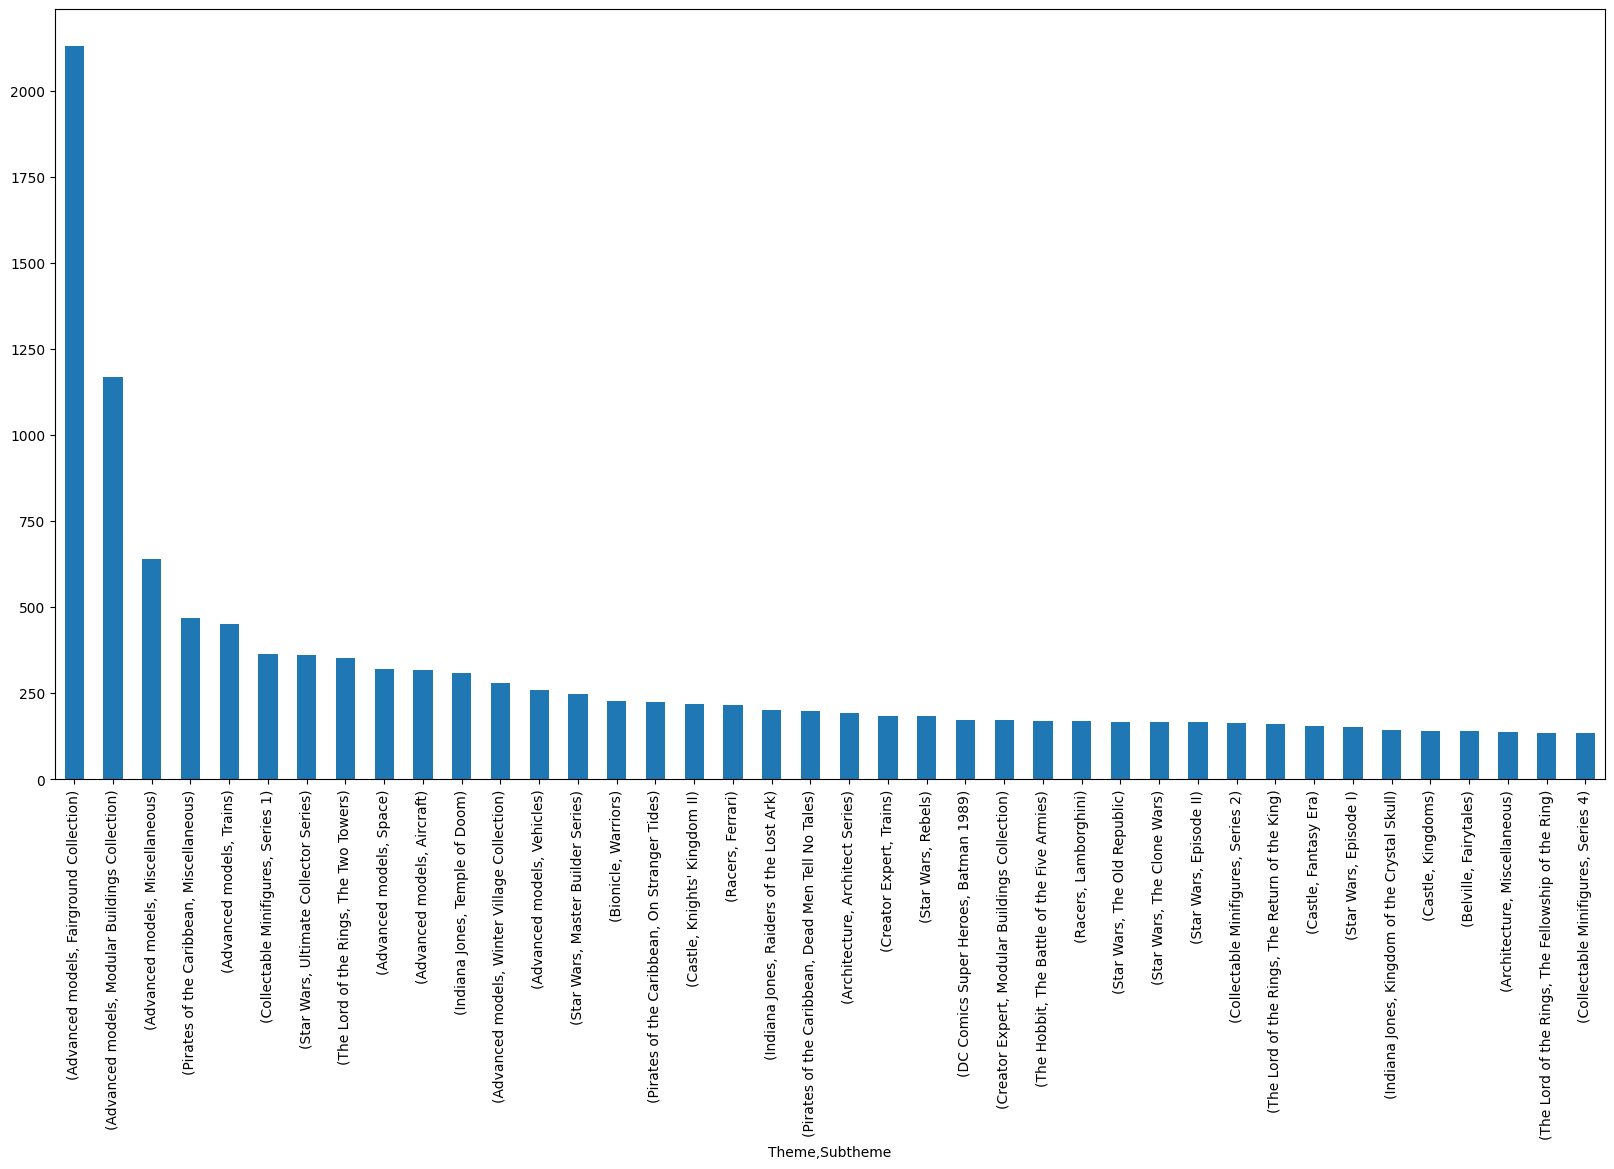

In [441]:
# average Price_Difference per Subtheme where Price_Difference is not NaN and show their Subtheme and Theme

LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby(['Theme', 'Subtheme'])['Price_Difference'].mean().sort_values(ascending=False).head(40).plot(kind='bar', figsize=(20,10))

In [442]:
LEGO_sets_df[LEGO_sets_df['Price_Difference'].notnull()].groupby(['Theme', 'Subtheme'])['Price_Difference'].mean().sort_values(ascending=False).head(20)

Theme                     Subtheme                    
Advanced models           Fairground Collection           2130.801800
                          Modular Buildings Collection    1168.470300
                          Miscellaneous                    640.672550
Pirates of the Caribbean  Miscellaneous                    467.505000
Advanced models           Trains                           451.081600
Collectable Minifigures   Series 1                         363.010000
Star Wars                 Ultimate Collector Series        362.457931
The Lord of the Rings     The Two Towers                   353.786533
Advanced models           Space                            319.980000
                          Aircraft                         317.510000
Indiana Jones             Temple of Doom                   309.510000
Advanced models           Winter Village Collection        279.818650
                          Vehicles                         260.010000
Star Wars                 Master Bu

## Difference in price percentage (retail - current)

<Axes: xlabel='Name'>

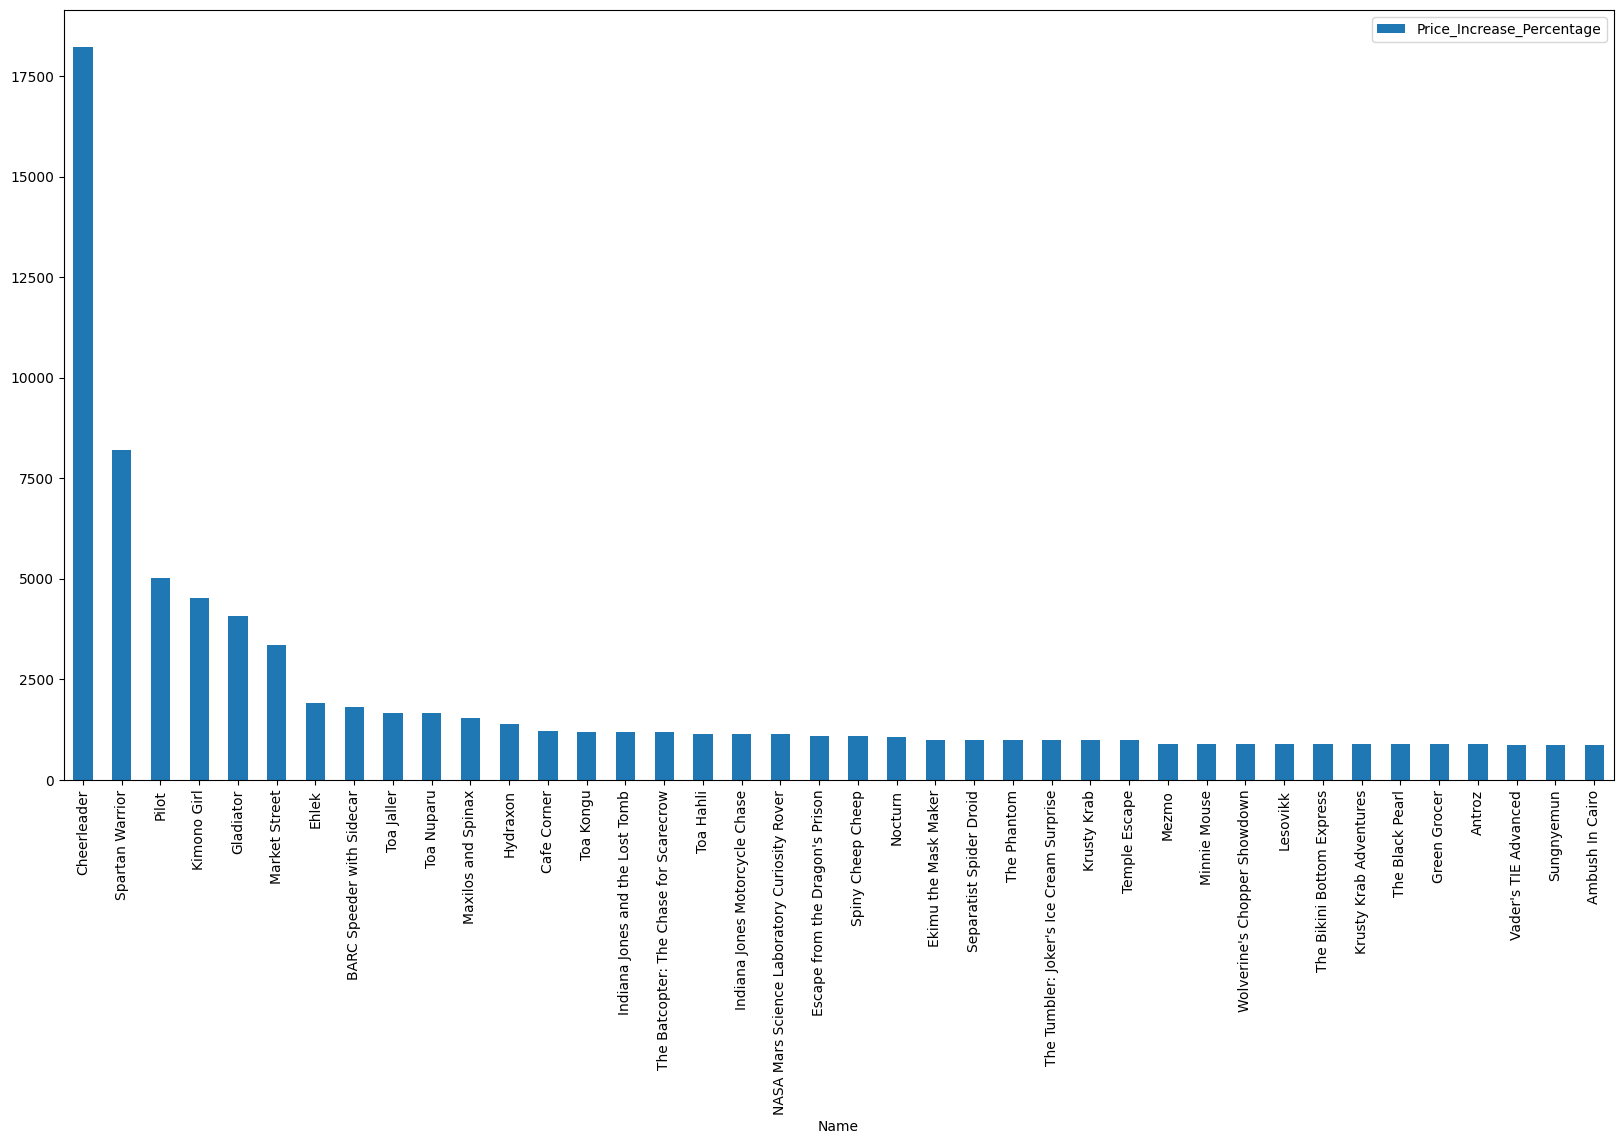

In [443]:
# Add a new column for the price increase percentage
LEGO_sets_df['Price_Increase_Percentage'] = (LEGO_sets_df['Price_Difference'] / LEGO_sets_df['USD_MSRP']) * 100

# Show the 10 biggest differences between Current_Price and USD_MSRP
LEGO_sets_df.sort_values(by='Price_Increase_Percentage', ascending=False).head(40).plot(x='Name', y='Price_Increase_Percentage', kind='bar', figsize=(20,10))

In [444]:
LEGO_sets_df.sort_values(by='Price_Increase_Percentage', ascending=False).head(20)

Set_ID                                          Name  Year  \
8138   8683-2                                   Cheerleader  2010   
8157   8684-2                               Spartan Warrior  2010   
8657   8803-2                                         Pilot  2011   
8676   8804-2                                   Kimono Girl  2011   
8695   8805-2                                     Gladiator  2011   
6787  10190-1                                 Market Street  2007   
6749   8920-1                                         Ehlek  2007   
9850  75012-1                     BARC Speeder with Sidecar  2013   
6740   8911-1                                    Toa Jaller  2007   
6742   8913-1                                    Toa Nuparu  2007   
6753   8924-1                            Maxilos and Spinax  2007   
6752   8923-1                                      Hydraxon  2007   
6785  10182-1                                   Cafe Corner  2007   
6739   8910-1                                     Toa Kongu  2007   
7099   7621-1               Indiana Jones and the Lost Tomb  2008   
6684   7786-1        The Batcopter: The Chase for Scarecrow  2007   
6743   8914-1                                     Toa Hahli  2007   
7098   7620-1                Indiana Jones Motorcycle Chase  2008   
9989  21104-1  NASA Mars Science Laboratory Curiosity Rover  2014   
8582   7187-1               Escape from the Dragon's Prison  2011   

                        Theme    Theme_Group                      Subtheme  \
8138  Collectable Minifigures  Miscellaneous                      Series 1   
8157  Collectable Minifigures  Miscellaneous                      Series 2   
8657  Collectable Minifigures  Miscellaneous                      Series 3   
8676  Collectable Minifigures  Miscellaneous                      Series 4   
8695  Collectable Minifigures  Miscellaneous                      Series 5   
6787          Advanced models   Model making  Modular Buildings Collection   
6749                 Bionicle   Constraction                       Barraki   
9850                Star Wars       Licensed                The Clone Wars   
6740                 Bionicle   Constraction                     Toa Mahri   
6742                 Bionicle   Constraction                     Toa Mahri   
6753                 Bionicle   Constraction                      Warriors   
6752                 Bionicle   Constraction                      Warriors   
6785          Advanced models   Model making  Modular Buildings Collection   
6739                 Bionicle   Constraction                     Toa Mahri   
7099            Indiana Jones       Licensed       Raiders of the Lost Ark   
6684                   Batman       Licensed                           NaN   
6743                 Bionicle   Constraction                     Toa Mahri   
7098            Indiana Jones       Licensed                  Last Crusade   
9989                    Ideas  Miscellaneous                          NASA   
8582                   Castle     Historical                      Kingdoms   

     Category        Packaging  Num_Instructions      Availability  Pieces  \
8138   Normal        Foil pack                 0            Retail     7.0   
8157   Normal        Foil pack                 0            Retail     8.0   
8657   Normal        Foil pack                 0            Retail     7.0   
8676   Normal        Foil pack                 0            Retail     6.0   
8695   Normal        Foil pack                 0            Retail     7.0   
6787   Normal              Box                 0    LEGO exclusive  1248.0   
6749   Normal  {Not specified}                 2   {Not specified}    54.0   
9850   Normal              Box                 2  Retail - limited   226.0   
6740   Normal  {Not specified}                 1   {Not specified}    68.0   
6742   Normal  {Not specified}                 1   {Not specified}    59.0   
6753   Normal  {Not specified}                 1   {Not spec

### Group by theme

<Axes: xlabel='Theme'>

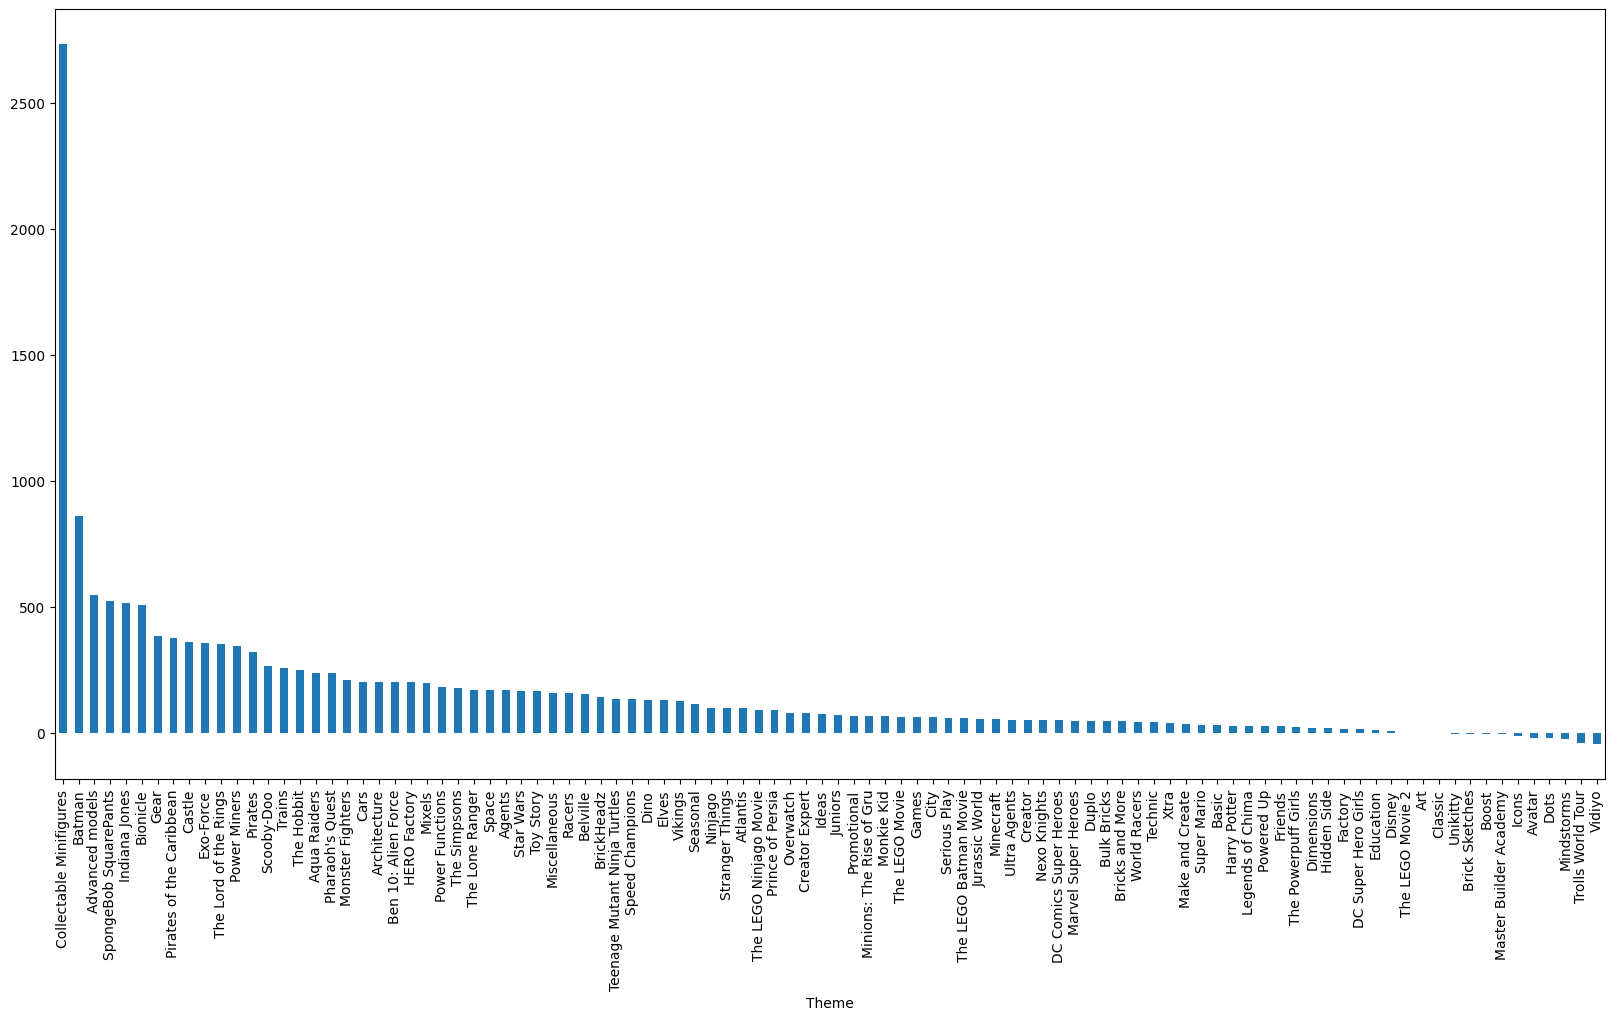

In [445]:
# average Price_Increase_Percentage per Theme where Price_Increase_Percentage is not NaN

LEGO_sets_df[LEGO_sets_df['Price_Increase_Percentage'].notnull()].groupby('Theme')['Price_Increase_Percentage'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))

In [446]:
LEGO_sets_df[LEGO_sets_df['Price_Increase_Percentage'].notnull()].groupby('Theme')['Price_Increase_Percentage'].mean().sort_values(ascending=False).head(20)

Theme
Collectable Minifigures     2733.427687
Batman                       860.656198
Advanced models              547.904113
SpongeBob SquarePants        523.954292
Indiana Jones                513.451205
Bionicle                     506.624569
Gear                         383.438395
Pirates of the Caribbean     374.684796
Castle                       361.108968
Exo-Force                    355.073437
The Lord of the Rings        350.872556
Power Miners                 342.624485
Pirates                      319.971219
Scooby-Doo                   264.948594
Trains                       255.592978
The Hobbit                   248.320772
Aqua Raiders                 238.140152
Pharaoh's Quest              234.867148
Monster Fighters             207.985709
Cars                         202.896958
Name: Price_Increase_Percentage, dtype: float64

<Axes: xlabel='Theme,Subtheme'>

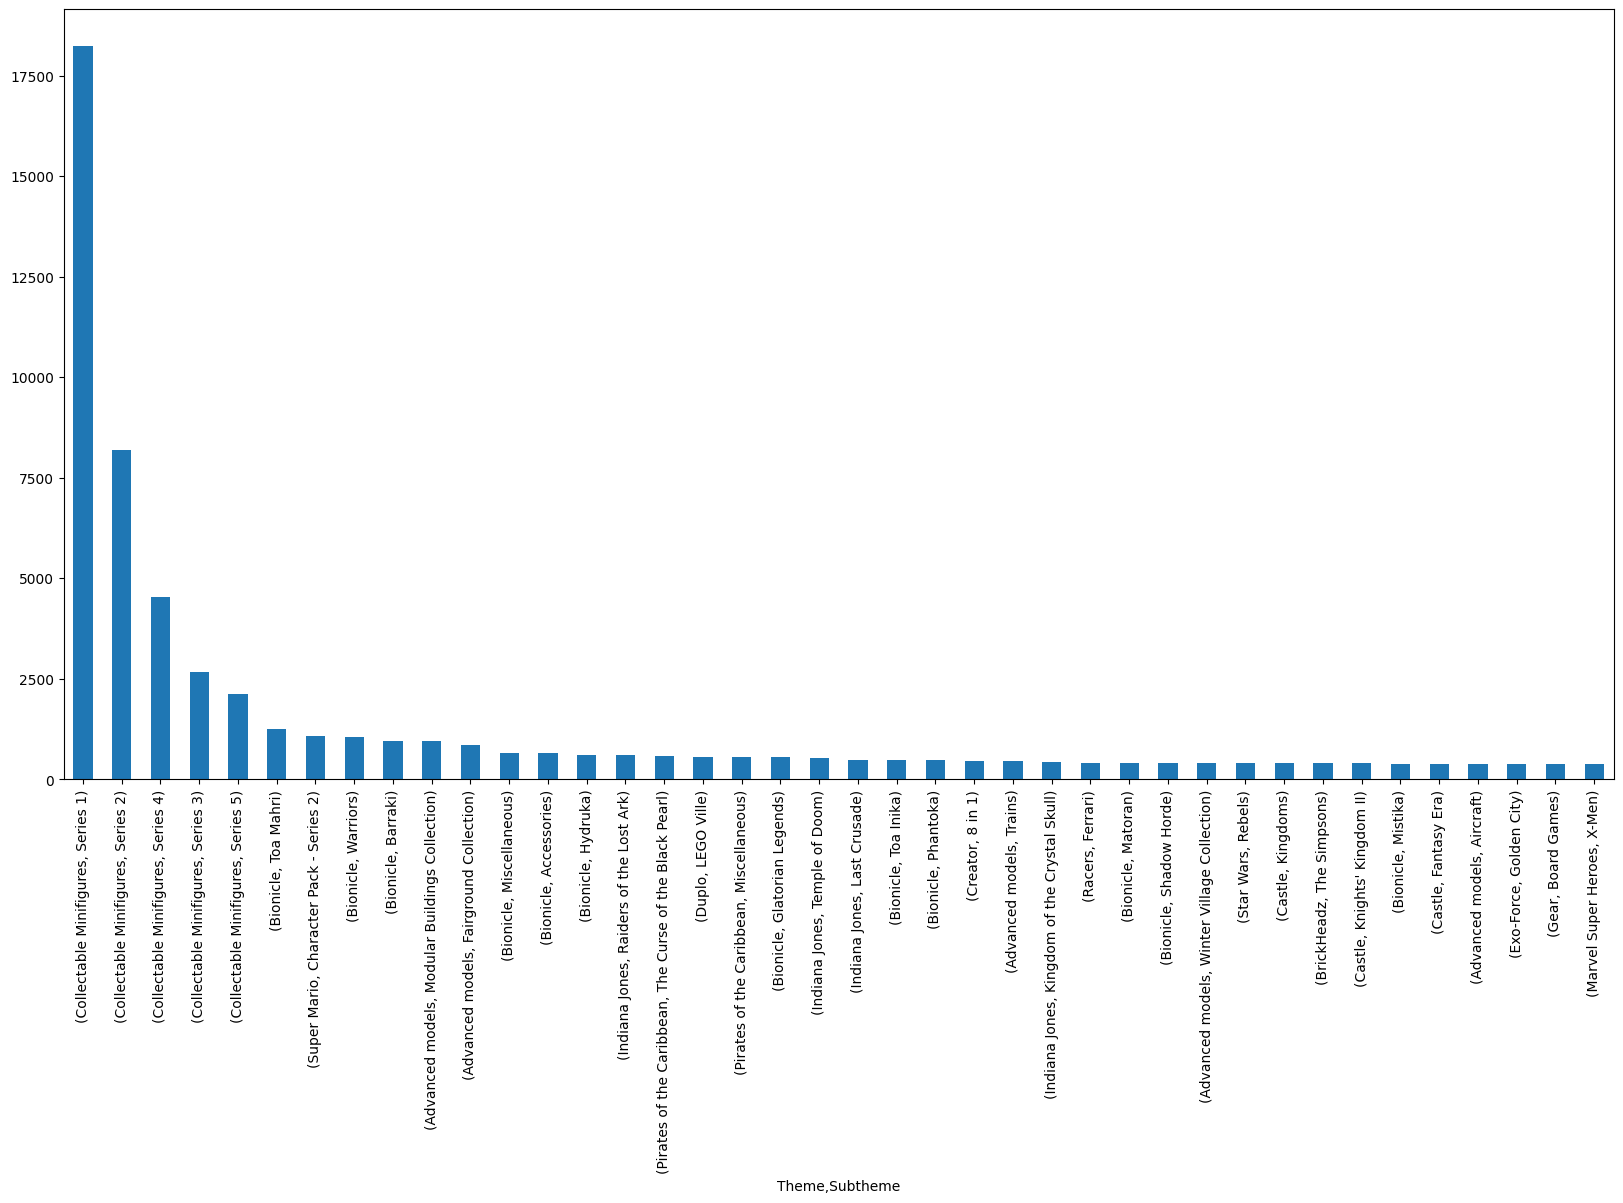

In [447]:
# average Price_Increase_Percentage per Subtheme where Price_Increase_Percentage is not NaN and show their Subtheme and Theme

LEGO_sets_df[LEGO_sets_df['Price_Increase_Percentage'].notnull()].groupby(['Theme', 'Subtheme'])['Price_Increase_Percentage'].mean().sort_values(ascending=False).head(40).plot(kind='bar', figsize=(20,10))

## Number of pieces in a set per year

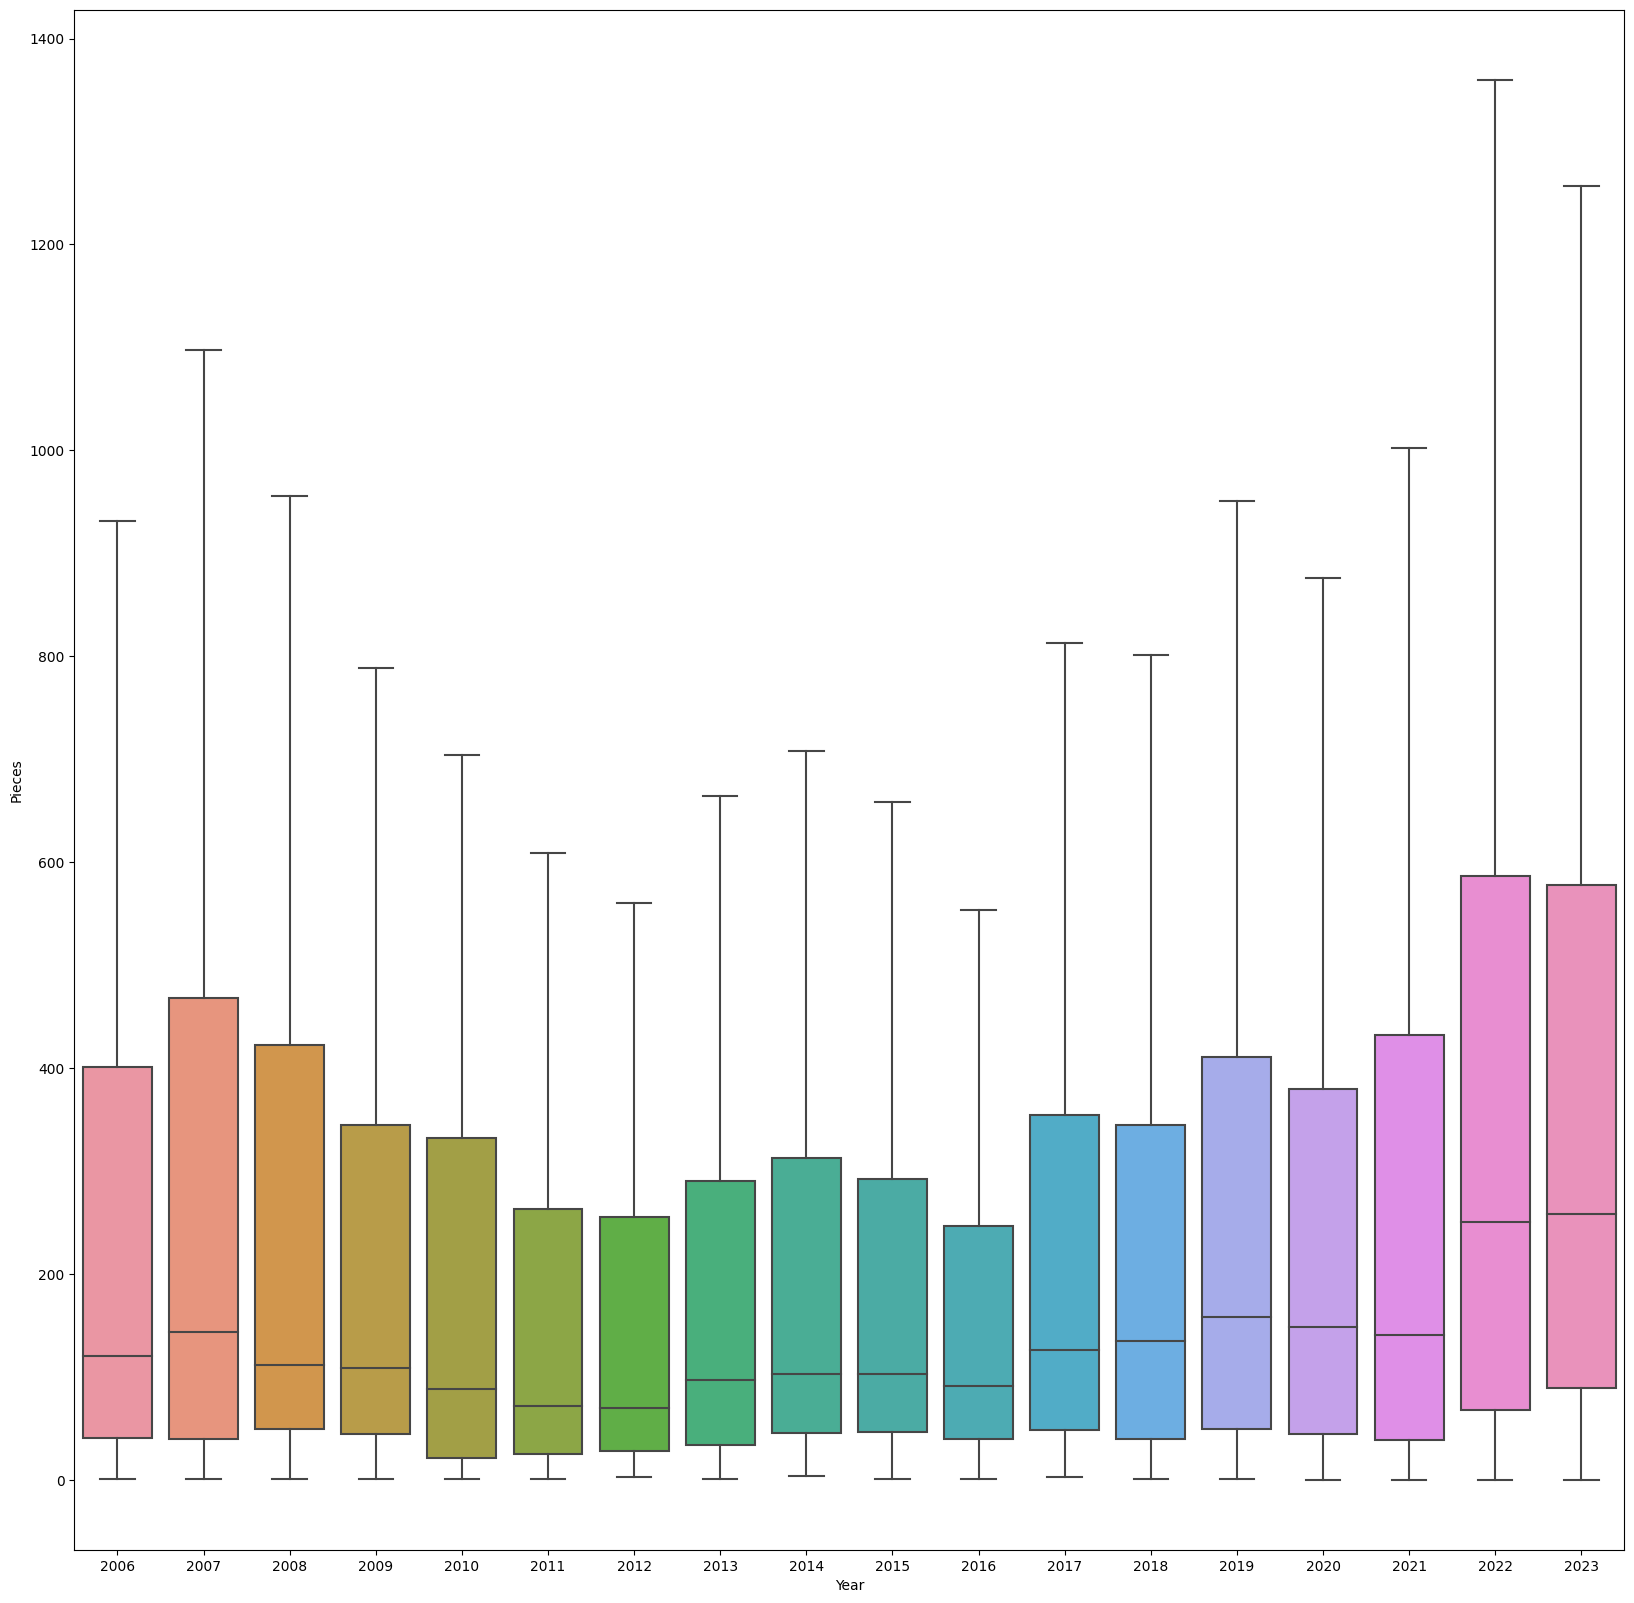

In [448]:
# Make box plot of pieces grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Pieces', data=SETS_after_2005_df, showfliers=False)
plt.show()

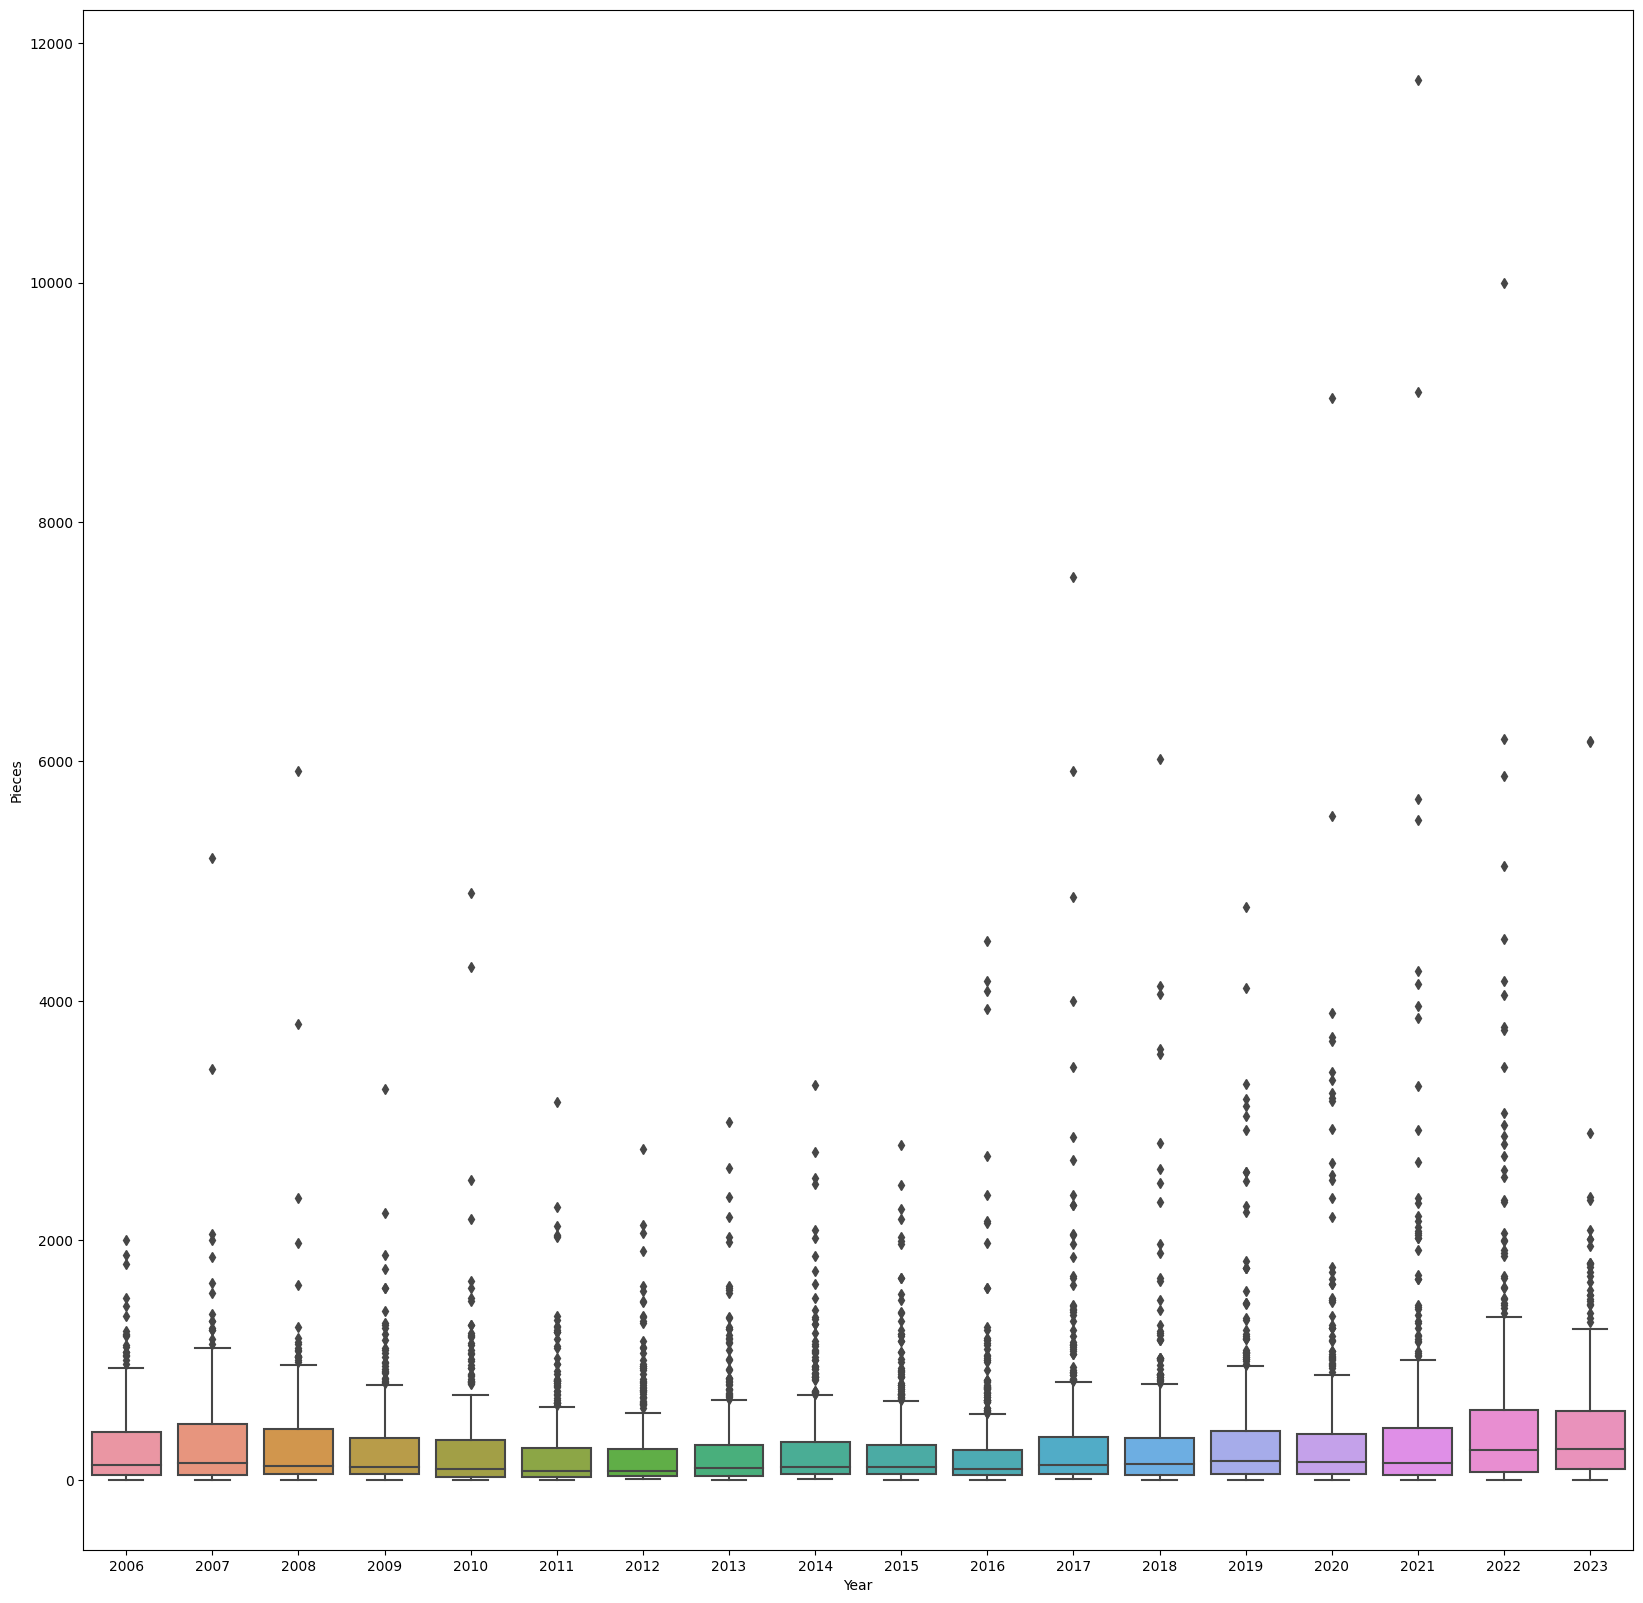

In [449]:
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Pieces', data=SETS_after_2005_df, showfliers=True)
plt.show()

## Adjusting prices of sets (USD_MSRP) for inflation

Deflation of the USD_MSRP

We will do it based on 2022 dollars

In [450]:
import cpi

# Updating the CPI

# Since the BLS routinely releases new CPI new values, this library must periodically download the latest data. 
# This library does not do this automatically. You must update the BLS dataset stored alongside the code yourself 
# by running the following method:

# This takes some time, only need to do it once
# cpi.update()

In [451]:
# Create a new column for the price in 2022 dollars
SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP'] if row['Year'] == 2023 else cpi.inflate(row['USD_MSRP'], row['Year'], to=2022), axis=1)

# the CPI library does not have any data for 2023, so we will use 2022 instead
# so we have to adjust 2023 prices to 2022 prices
# the CPI for 2023 is predicted to be 3.3% higher than 2022

# In the row with Year = 2023 multiply USD_MSRP_adjusted_2022 with 0.967
SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP_adjusted_2022'] * 0.967 if row['Year'] == 2023 else row['USD_MSRP_adjusted_2022'], axis=1)

/tmp/ipykernel_192290/3136512757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP'] if row['Year'] == 2023 else cpi.inflate(row['USD_MSRP'], row['Year'], to=2022), axis=1)
/tmp/ipykernel_192290/3136512757.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  SETS_after_2005_df['USD_MSRP_adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['USD_MSRP_adjusted_2022'] * 0.967 if row['Year'] == 2023 else row[

### Comparison of prices of sets per year

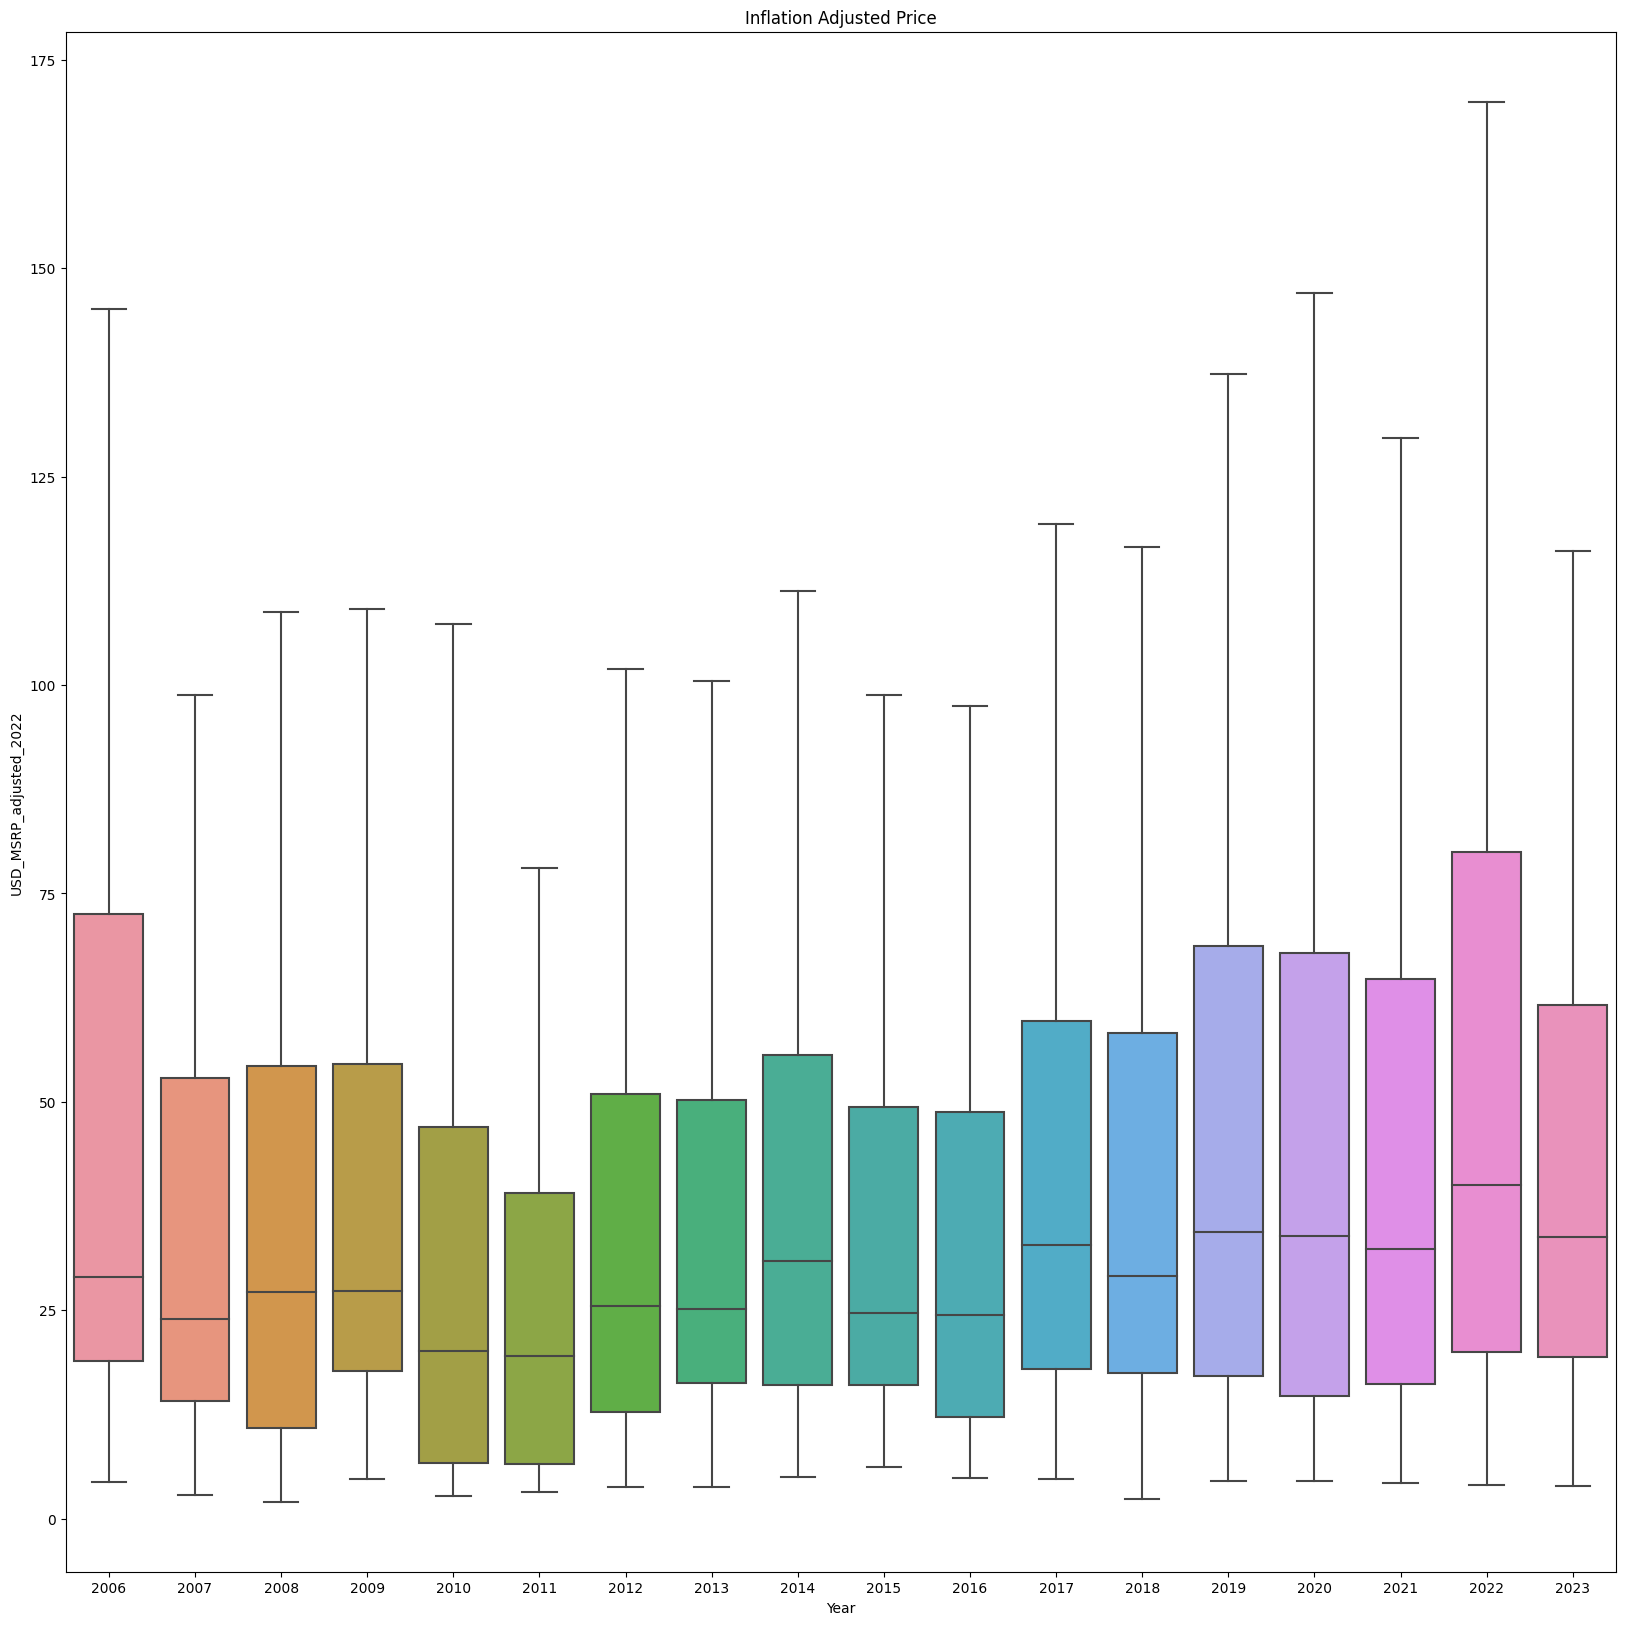

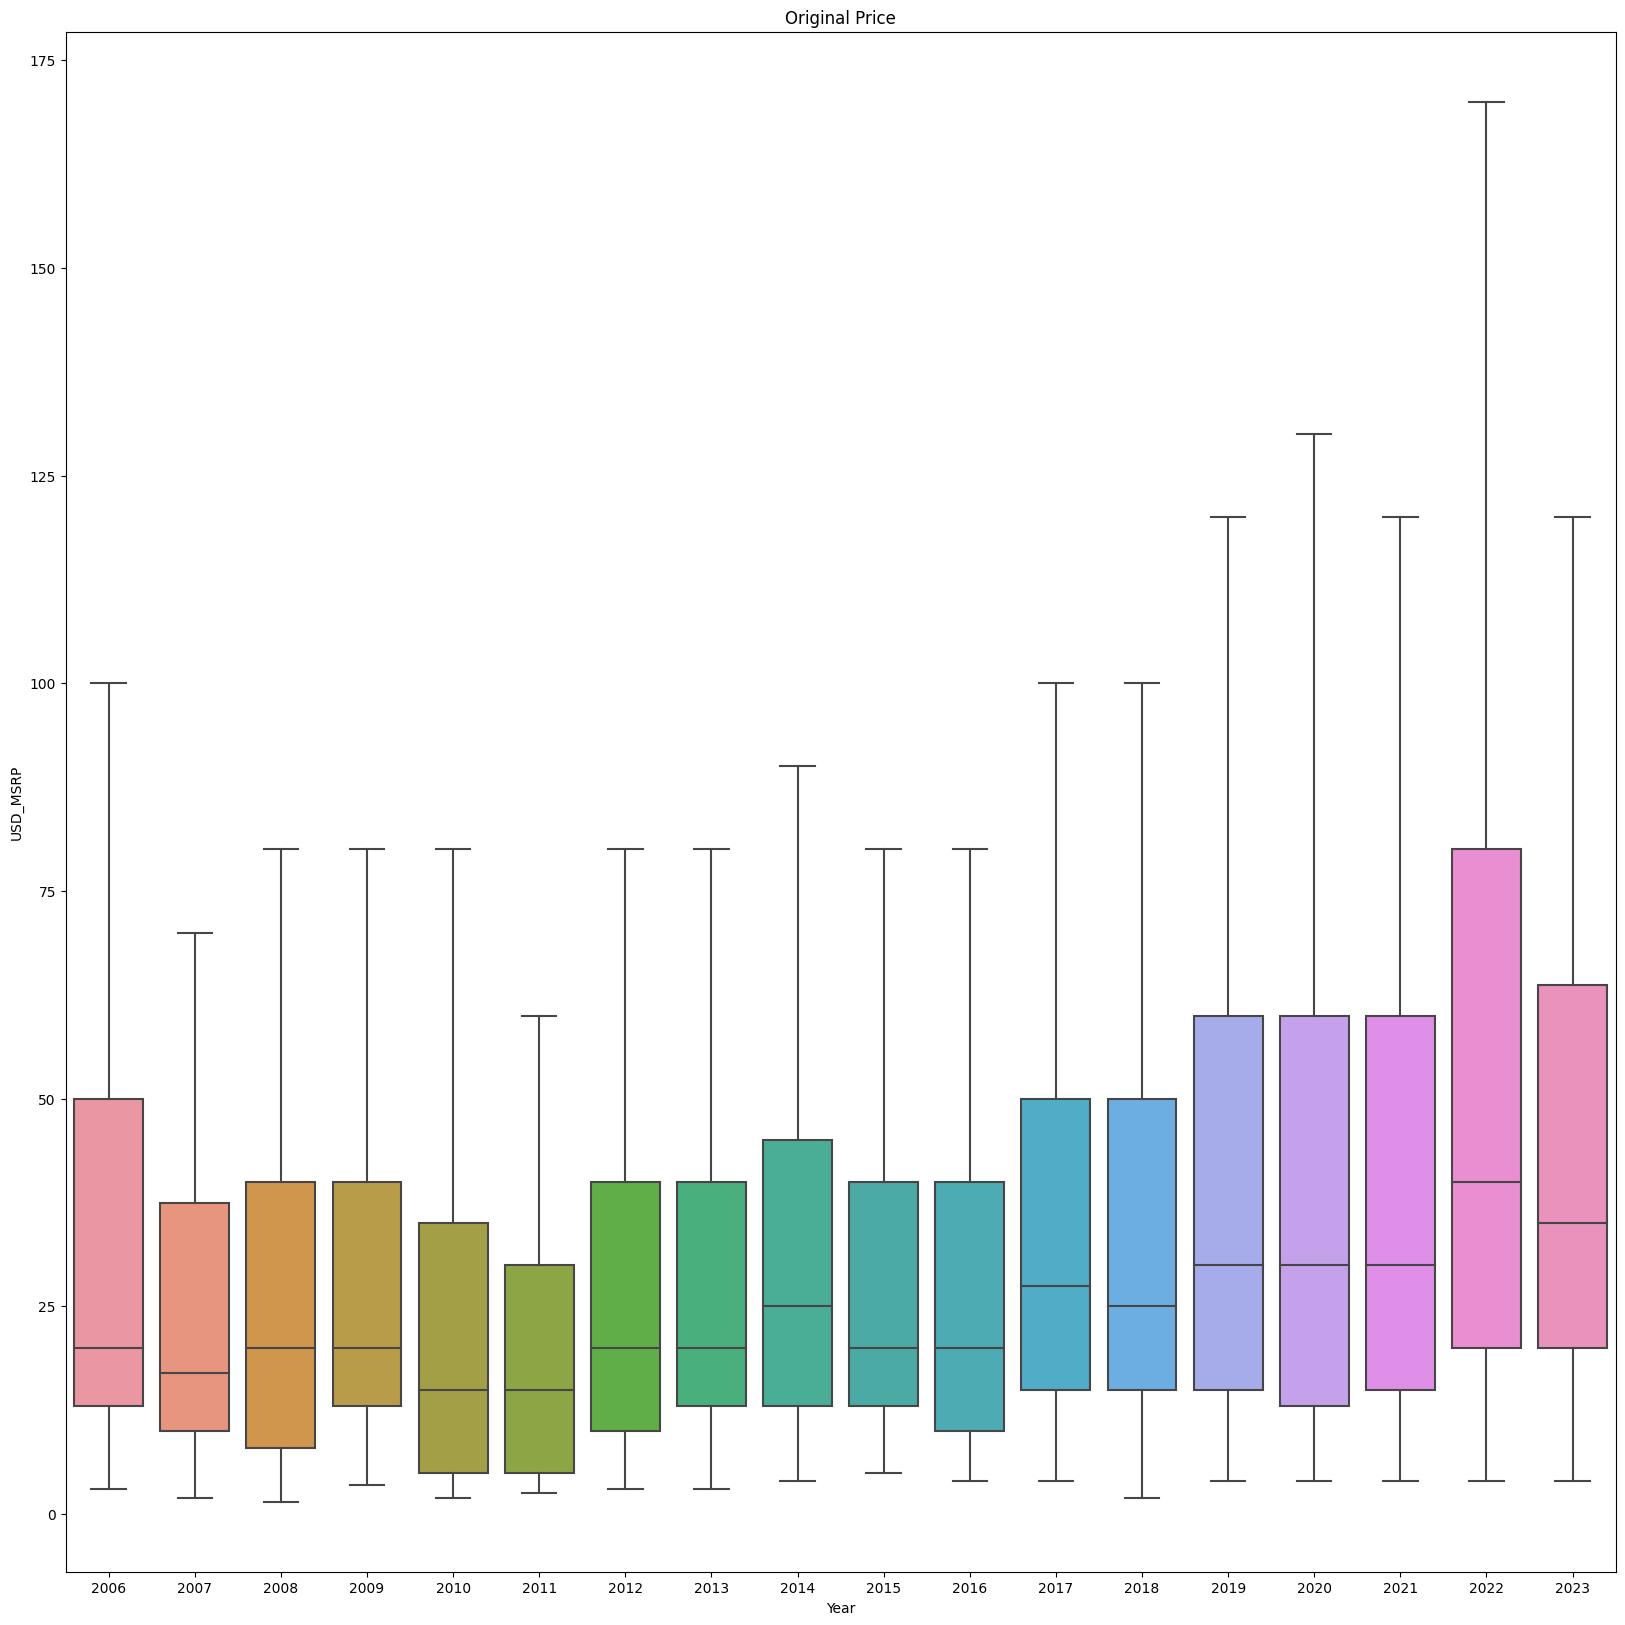

In [452]:
# Make box plot of inflation adjusted price grouped by year without outliers
plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP_adjusted_2022', data=SETS_after_2005_df, showfliers=False)
plt.title('Inflation Adjusted Price')
plt.show()

plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='USD_MSRP', data=SETS_after_2005_df, showfliers=False)
plt.title('Original Price')
plt.show()

### Comparison of prices of a piece per year

/tmp/ipykernel_192290/3667414680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Per_Piece'] = filtered_df['USD_MSRP'] / filtered_df['Pieces']
/tmp/ipykernel_192290/3667414680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Price_Per_Piece_Adjusted'] = filtered_df['USD_MSRP_adjusted_2022'] / filtered_df['Pieces']


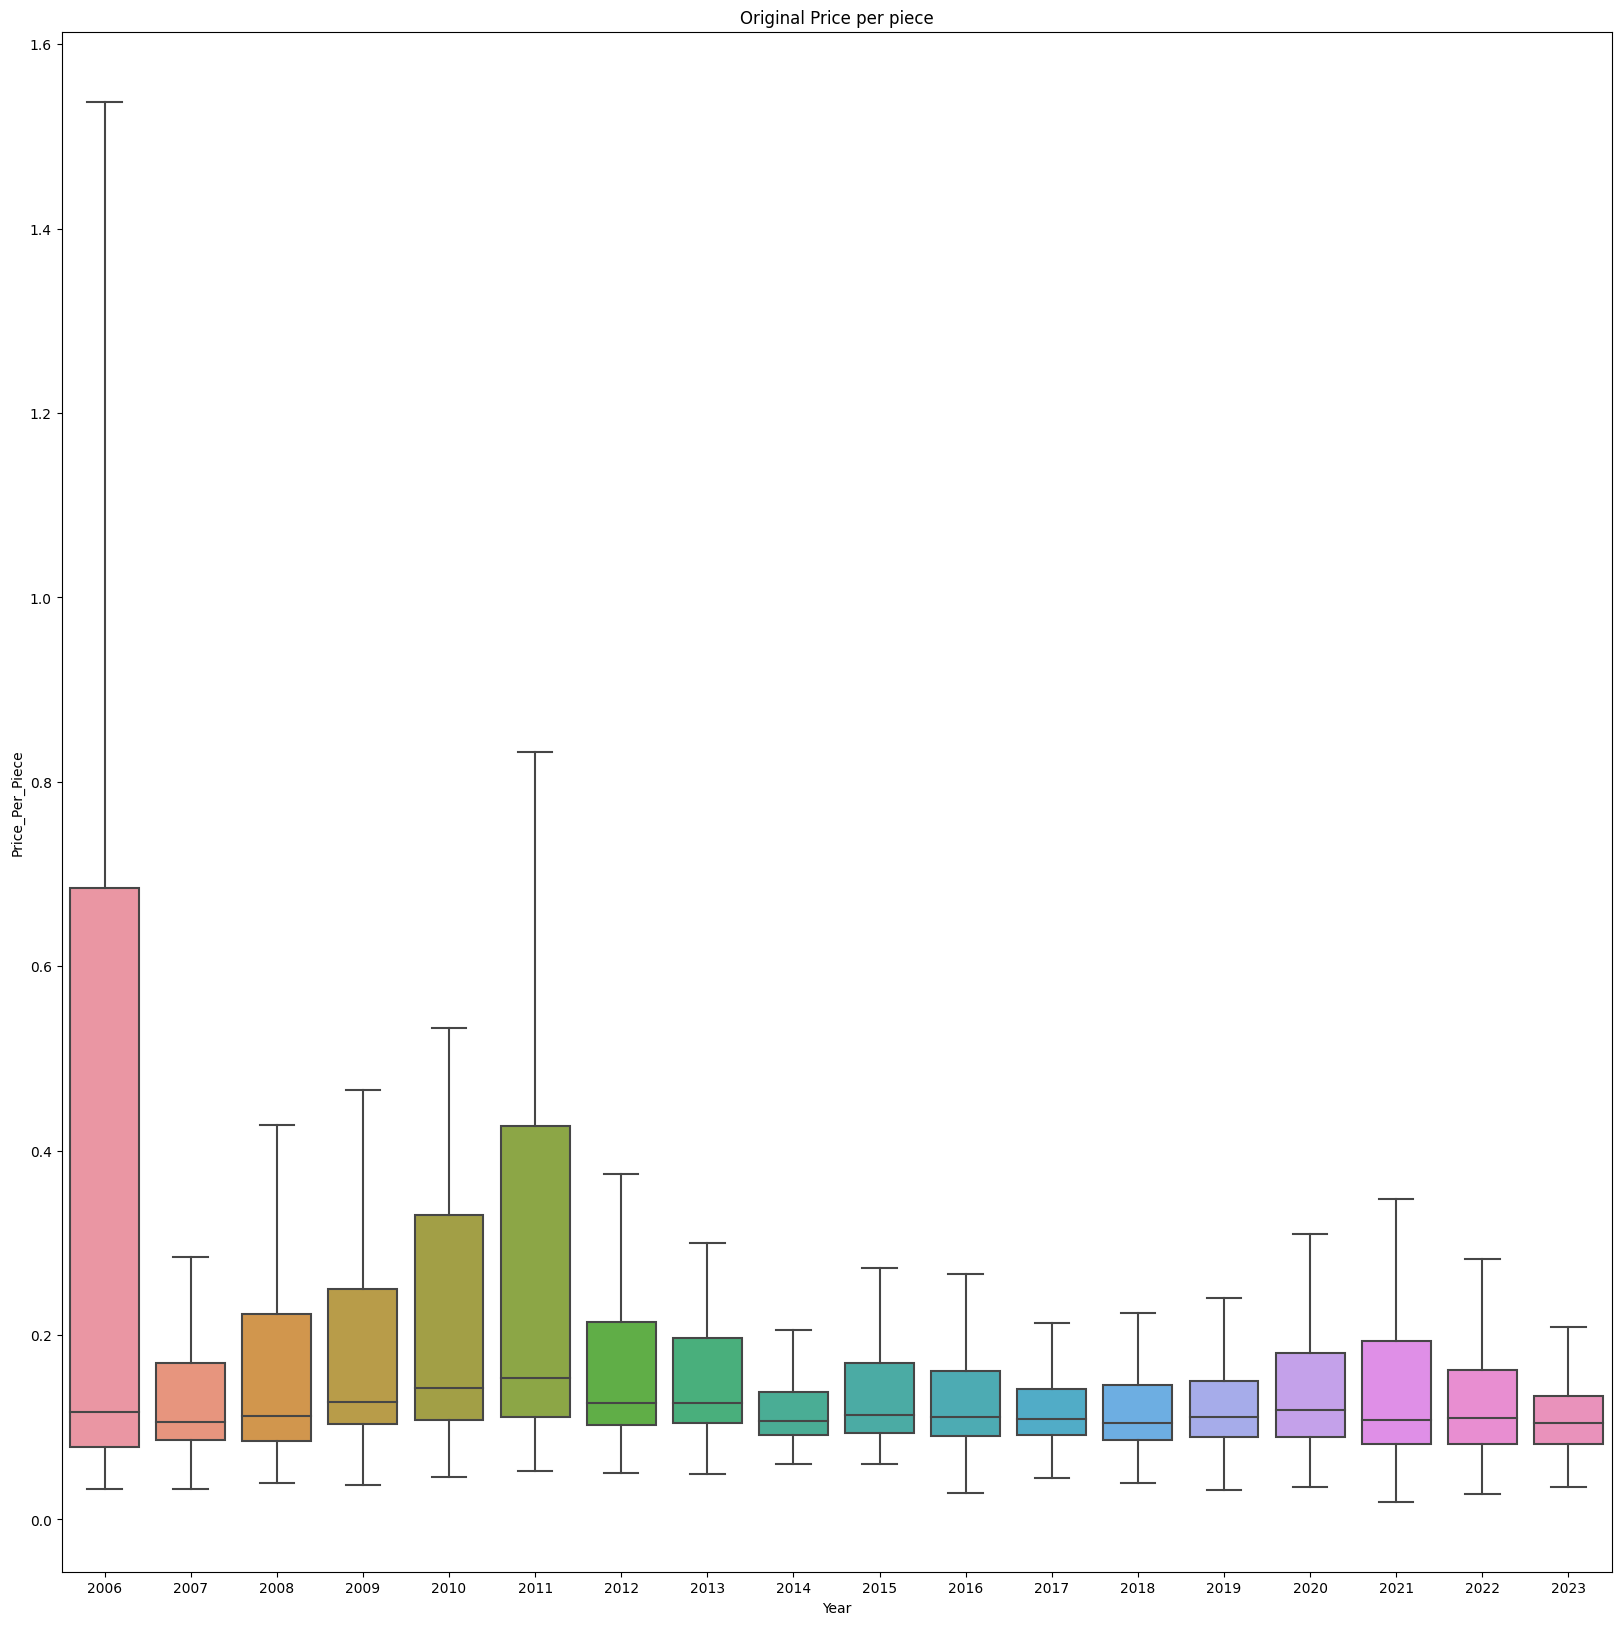

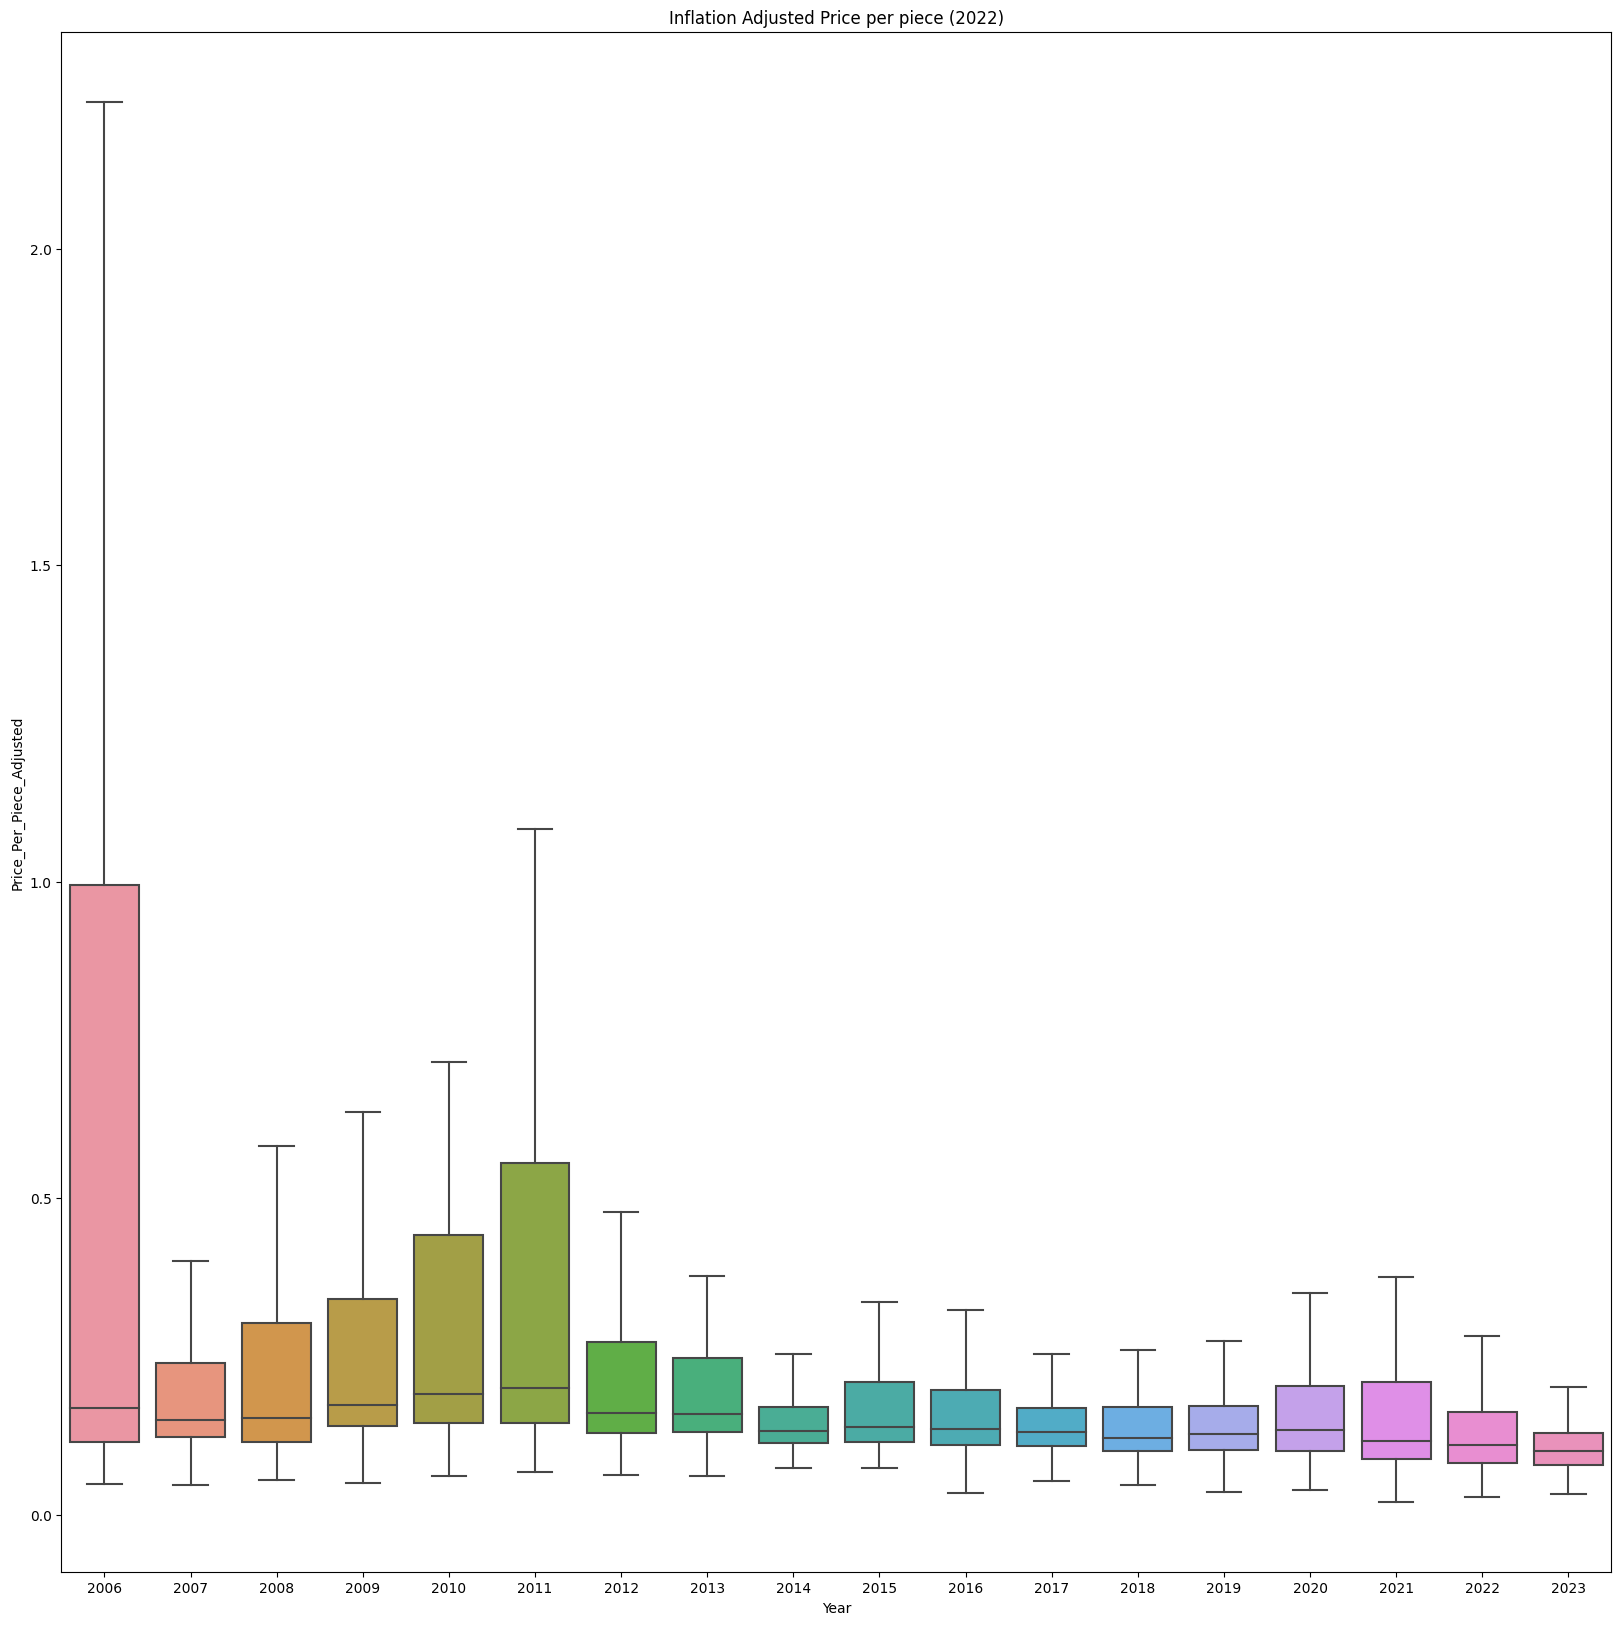

In [453]:
# filter to only have rows with Pieces > 0 and USD_MSRP > 0

filtered_df = SETS_after_2005_df[(SETS_after_2005_df['Pieces'] > 0) & (SETS_after_2005_df['USD_MSRP'] > 0)]

# price for one Piece
filtered_df['Price_Per_Piece'] = filtered_df['USD_MSRP'] / filtered_df['Pieces']
filtered_df['Price_Per_Piece_Adjusted'] = filtered_df['USD_MSRP_adjusted_2022'] / filtered_df['Pieces']

plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Price_Per_Piece', data=filtered_df, showfliers=False)
plt.title('Original Price per piece')
plt.show()

plt.figure(figsize=(20,20))
sns.boxplot(x='Year', y='Price_Per_Piece_Adjusted', data=filtered_df, showfliers=False)
plt.title('Inflation Adjusted Price per piece (2022)')
plt.show()

We can see that when looking at prices per set each year, both before and after adjustment for inflation, the mean price has the tendency of going up each year. 

However, when looking at price per piece, the price seems to be stagnating without adjustment for inflation, and going down with adjusting. For 2006, we have roughly half as many sets with a stated price, as any of the other next years. That could be the explanation why, 2006 seems to be an outlier for price per piece. 

There can be many possible reasons to explain the peak in 2011. One of them could be, that LEGO patent expired in 2011, allowing othr companies to produce LEGO-like products. Another reason could be, that the strategies of LEGO as a company changed over years, concerning LEGO amusement parks introduction in 2004, change of number of colours of bricks, change of shapes of bricks, etc. As any other company, LEGO went through changes that could have affected the price of their products.

# Collectable minifigues

In [454]:
# show all the sets where the Theme is 'Collectable Minifigures'

LEGO_sets_df[LEGO_sets_df['Theme'] == 'Collectable Minifigures'].count()

Set_ID                       804
Name                         804
Year                         804
Theme                        804
Theme_Group                  804
Subtheme                     804
Category                     804
Packaging                    804
Num_Instructions             804
Availability                 804
Pieces                       722
Minifigures                  713
Owned                        804
Rating                       804
USD_MSRP                     129
Total_Quantity               101
Current_Price                 82
Price_Difference              15
Price_Increase_Percentage     15
dtype: int64

We will not look at minifigures and exclude them from all the sets, as there are only 15 that have both original and current price. That is too low of a number, out of 804 collectable minifigures that are in the data set. 

# Pre-processing

We will only work with sets after 2005, as our primary goal will be looking at price of sets. 

### Remove minifigures

We exclude all sets that have a Theme of 'Collectable Minifigures' from the dataset. 

In [455]:
SETS_after_2005_df.count()

Set_ID                    8846
Name                      8846
Year                      8846
Theme                     8846
Theme_Group               8825
Subtheme                  7636
Category                  8846
Packaging                 8846
Num_Instructions          8846
Availability              8846
Pieces                    7560
Minifigures               4831
Owned                     8704
Rating                    8846
USD_MSRP                  5741
Total_Quantity            6783
Current_Price             4439
USD_MSRP_adjusted_2022    5741
dtype: int64

In [456]:
SETS_after_2005_df = SETS_after_2005_df[SETS_after_2005_df['Theme'] != 'Collectable Minifigures']
SETS_after_2005_df = SETS_after_2005_df[SETS_after_2005_df['Theme'] != 'Collectable minifigures']


In [457]:
SETS_after_2005_df.count()

Set_ID                    8041
Name                      8041
Year                      8041
Theme                     8041
Theme_Group               8020
Subtheme                  6831
Category                  8041
Packaging                 8041
Num_Instructions          8041
Availability              8041
Pieces                    6838
Minifigures               4118
Owned                     7899
Rating                    8041
USD_MSRP                  5611
Total_Quantity            6681
Current_Price             4357
USD_MSRP_adjusted_2022    5611
dtype: int64

### Remove rows with missing values for price

We exclude those rows that do not have a value for USD_MSRP or Current price, as we will be looking at price of sets.

In [458]:
# show how many have both USD_MSRP and Current_Price

SETS_after_2005_df[(SETS_after_2005_df['USD_MSRP'].notnull()) & (SETS_after_2005_df['Current_Price'].notnull())].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Subtheme                3088 non-null   object 
 6   Category                3563 non-null   object 
 7   Packaging               3563 non-null   object 
 8   Num_Instructions        3563 non-null   int64  
 9   Availability            3563 non-null   object 
 10  Pieces                  3559 non-null   float64
 11  Minifigures             2533 non-null   float64
 12  Owned                   3563 non-null   float64
 13  Rating                  3563 non-null   float64
 14  USD_MSRP                3563 non-nul

In [459]:
# remove from SETS_after_2005_df those that do not have USD_MSRP or Current_Price

SETS_after_2005_df = SETS_after_2005_df[(SETS_after_2005_df['USD_MSRP'].notnull()) & (SETS_after_2005_df['Current_Price'].notnull())]
SETS_after_2005_df.count()

Set_ID                    3563
Name                      3563
Year                      3563
Theme                     3563
Theme_Group               3563
Subtheme                  3088
Category                  3563
Packaging                 3563
Num_Instructions          3563
Availability              3563
Pieces                    3559
Minifigures               2533
Owned                     3563
Rating                    3563
USD_MSRP                  3563
Total_Quantity            3563
Current_Price             3563
USD_MSRP_adjusted_2022    3563
dtype: int64

## Remove NaN values

We replace NaN values in Minifigures column by 0, as sets can have 0 minifigures.

In [460]:
# replace the NaN values in the Minifigures column with 0

SETS_after_2005_df['Minifigures'].fillna(0, inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Subtheme                3088 non-null   object 
 6   Category                3563 non-null   object 
 7   Packaging               3563 non-null   object 
 8   Num_Instructions        3563 non-null   int64  
 9   Availability            3563 non-null   object 
 10  Pieces                  3559 non-null   float64
 11  Minifigures             3563 non-null   float64
 12  Owned                   3563 non-null   float64
 13  Rating                  3563 non-null   float64
 14  USD_MSRP                3563 non-nul

## Reduce columns

Look at columns of type object

<Axes: >

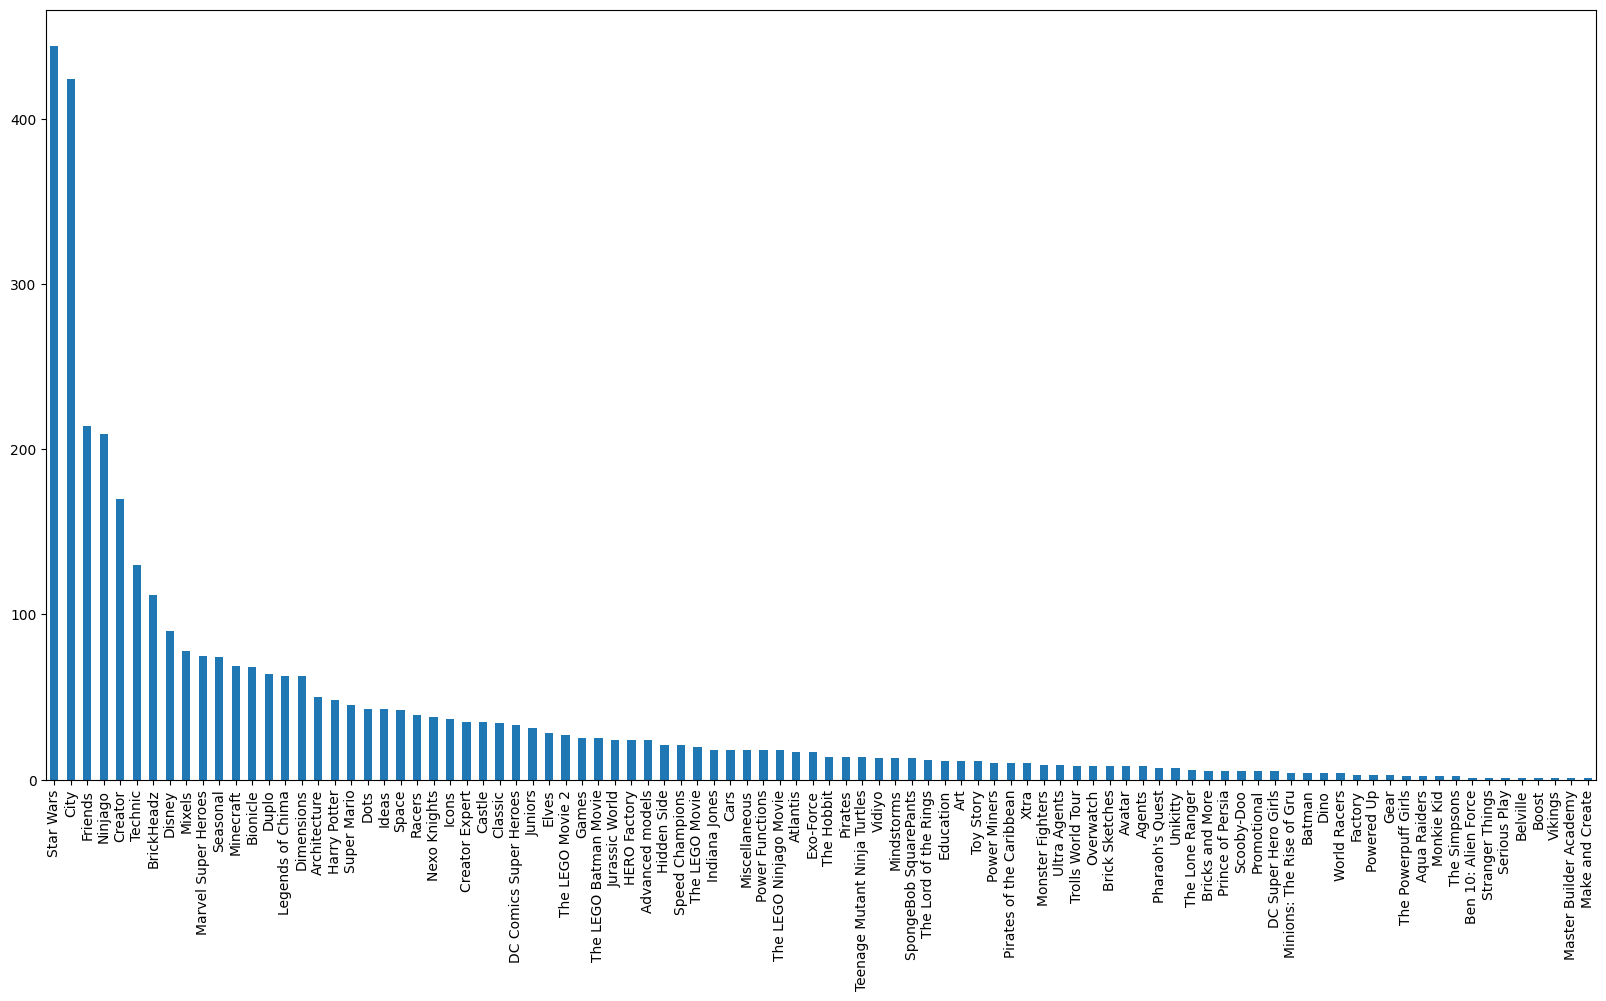

In [461]:
SETS_after_2005_df['Theme'].value_counts().plot(kind='bar', figsize=(20,10))

<Axes: >

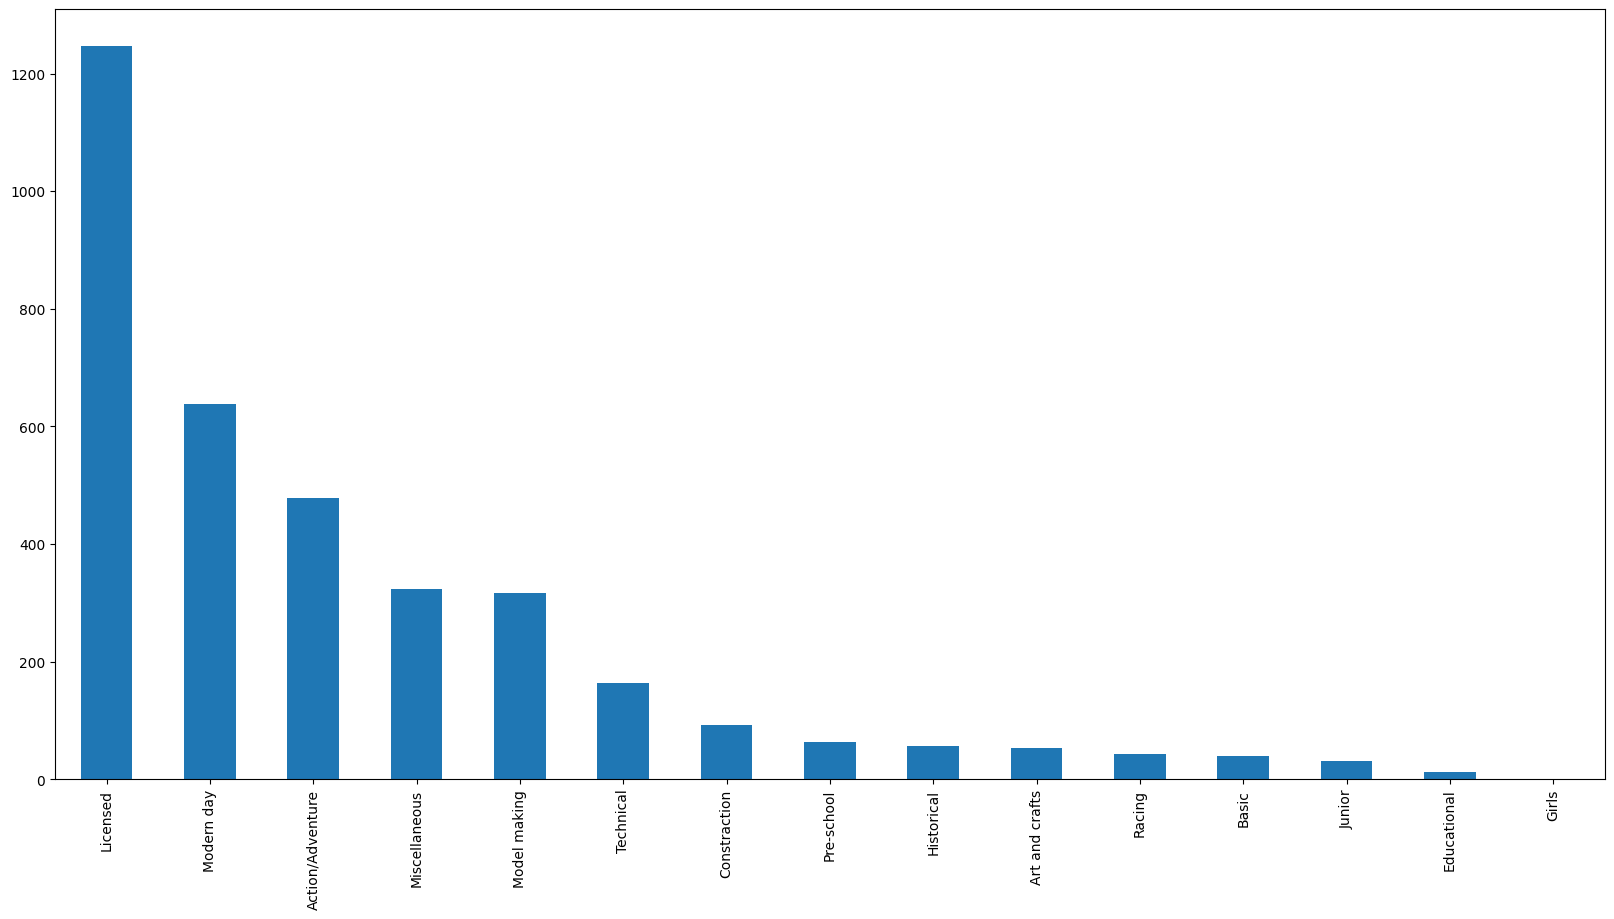

In [462]:
SETS_after_2005_df['Theme_Group'].value_counts().plot(kind='bar', figsize=(20,10))

In [463]:
# count how many distinct Subthemes there are

SETS_after_2005_df['Subtheme'].nunique()

411

As there are too many different Subthemes, we drop the column completely. 

In [464]:
# drop column Subtheme from SETS_after_2005_df

SETS_after_2005_df.drop(columns=['Subtheme'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Category                3563 non-null   object 
 6   Packaging               3563 non-null   object 
 7   Num_Instructions        3563 non-null   int64  
 8   Availability            3563 non-null   object 
 9   Pieces                  3559 non-null   float64
 10  Minifigures             3563 non-null   float64
 11  Owned                   3563 non-null   float64
 12  Rating                  3563 non-null   float64
 13  USD_MSRP                3563 non-null   float64
 14  Total_Quantity          3563 non-nul

In [465]:
SETS_after_2005_df['Packaging'].value_counts()

Box                      3071
Foil pack                 134
{Not specified}           117
Polybag                    74
Blister pack               48
Box with backing card      27
Plastic canister           24
Canister                   19
Other                      15
Tub                        10
Shrink-wrapped             10
Plastic box                 9
Box with handle             5
Name: Packaging, dtype: int64

In [466]:
SETS_after_2005_df['Category'].value_counts()

Normal        3536
Extended        19
Collection       4
Gear             3
Other            1
Name: Category, dtype: int64

Because both Packaging and Category have one value that has a significantly more representatives than others, it gives the data set little value, could overfit for the other categories, so we drop both columns. 

In [467]:
# drop columns Category and Packaging from SETS_after_2005_df

SETS_after_2005_df.drop(columns=['Category', 'Packaging'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Set_ID                  3563 non-null   object 
 1   Name                    3563 non-null   object 
 2   Year                    3563 non-null   int64  
 3   Theme                   3563 non-null   object 
 4   Theme_Group             3563 non-null   object 
 5   Num_Instructions        3563 non-null   int64  
 6   Availability            3563 non-null   object 
 7   Pieces                  3559 non-null   float64
 8   Minifigures             3563 non-null   float64
 9   Owned                   3563 non-null   float64
 10  Rating                  3563 non-null   float64
 11  USD_MSRP                3563 non-null   float64
 12  Total_Quantity          3563 non-null   float64
 13  Current_Price           3563 non-null   float64
 14  USD_MSRP_adjusted_2022  3563 non-nul

### ID and Name

In [468]:
# drop column Set_ID and Name

SETS_after_2005_df.drop(columns=['Set_ID', 'Name'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3563 entries, 6104 to 14897
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3563 non-null   int64  
 1   Theme                   3563 non-null   object 
 2   Theme_Group             3563 non-null   object 
 3   Num_Instructions        3563 non-null   int64  
 4   Availability            3563 non-null   object 
 5   Pieces                  3559 non-null   float64
 6   Minifigures             3563 non-null   float64
 7   Owned                   3563 non-null   float64
 8   Rating                  3563 non-null   float64
 9   USD_MSRP                3563 non-null   float64
 10  Total_Quantity          3563 non-null   float64
 11  Current_Price           3563 non-null   float64
 12  USD_MSRP_adjusted_2022  3563 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 389.7+ KB


### Availability

In [469]:
SETS_after_2005_df['Availability'].value_counts()

Retail              2672
LEGO exclusive       385
{Not specified}      271
Retail - limited     224
Educational            5
Promotional            4
Unknown                1
Not sold               1
Name: Availability, dtype: int64

In [470]:
# remove rows that have 'Availability' = '{Not specified}', 'Educational', 'Promotional', 'Unknown' or 'Not sold'

SETS_after_2005_df = SETS_after_2005_df[(SETS_after_2005_df['Availability'] != '{Not specified}') & (SETS_after_2005_df['Availability'] != 'Educational') & (SETS_after_2005_df['Availability'] != 'Promotional') & (SETS_after_2005_df['Availability'] != 'Unknown') & (SETS_after_2005_df['Availability'] != 'Not sold')]
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3281 non-null   int64  
 1   Theme                   3281 non-null   object 
 2   Theme_Group             3281 non-null   object 
 3   Num_Instructions        3281 non-null   int64  
 4   Availability            3281 non-null   object 
 5   Pieces                  3280 non-null   float64
 6   Minifigures             3281 non-null   float64
 7   Owned                   3281 non-null   float64
 8   Rating                  3281 non-null   float64
 9   USD_MSRP                3281 non-null   float64
 10  Total_Quantity          3281 non-null   float64
 11  Current_Price           3281 non-null   float64
 12  USD_MSRP_adjusted_2022  3281 non-null   float64
dtypes: float64(8), int64(2), object(3)
memory usage: 358.9+ KB


In [471]:
SETS_after_2005_df['Availability'].value_counts()

Retail              2672
LEGO exclusive       385
Retail - limited     224
Name: Availability, dtype: int64

### Year to years on market

In [472]:
# create a column with the number of years since the set was released

SETS_after_2005_df['Years_Since_Release'] = 2023 - SETS_after_2005_df['Year']
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    3281 non-null   int64  
 1   Theme                   3281 non-null   object 
 2   Theme_Group             3281 non-null   object 
 3   Num_Instructions        3281 non-null   int64  
 4   Availability            3281 non-null   object 
 5   Pieces                  3280 non-null   float64
 6   Minifigures             3281 non-null   float64
 7   Owned                   3281 non-null   float64
 8   Rating                  3281 non-null   float64
 9   USD_MSRP                3281 non-null   float64
 10  Total_Quantity          3281 non-null   float64
 11  Current_Price           3281 non-null   float64
 12  USD_MSRP_adjusted_2022  3281 non-null   float64
 13  Years_Since_Release     3281 non-null   int64  
dtypes: float64(8), int64(3), object(3)
m

In [473]:
# drop column Year

SETS_after_2005_df.drop(columns=['Year'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Theme                   3281 non-null   object 
 1   Theme_Group             3281 non-null   object 
 2   Num_Instructions        3281 non-null   int64  
 3   Availability            3281 non-null   object 
 4   Pieces                  3280 non-null   float64
 5   Minifigures             3281 non-null   float64
 6   Owned                   3281 non-null   float64
 7   Rating                  3281 non-null   float64
 8   USD_MSRP                3281 non-null   float64
 9   Total_Quantity          3281 non-null   float64
 10  Current_Price           3281 non-null   float64
 11  USD_MSRP_adjusted_2022  3281 non-null   float64
 12  Years_Since_Release     3281 non-null   int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 358.9+ KB


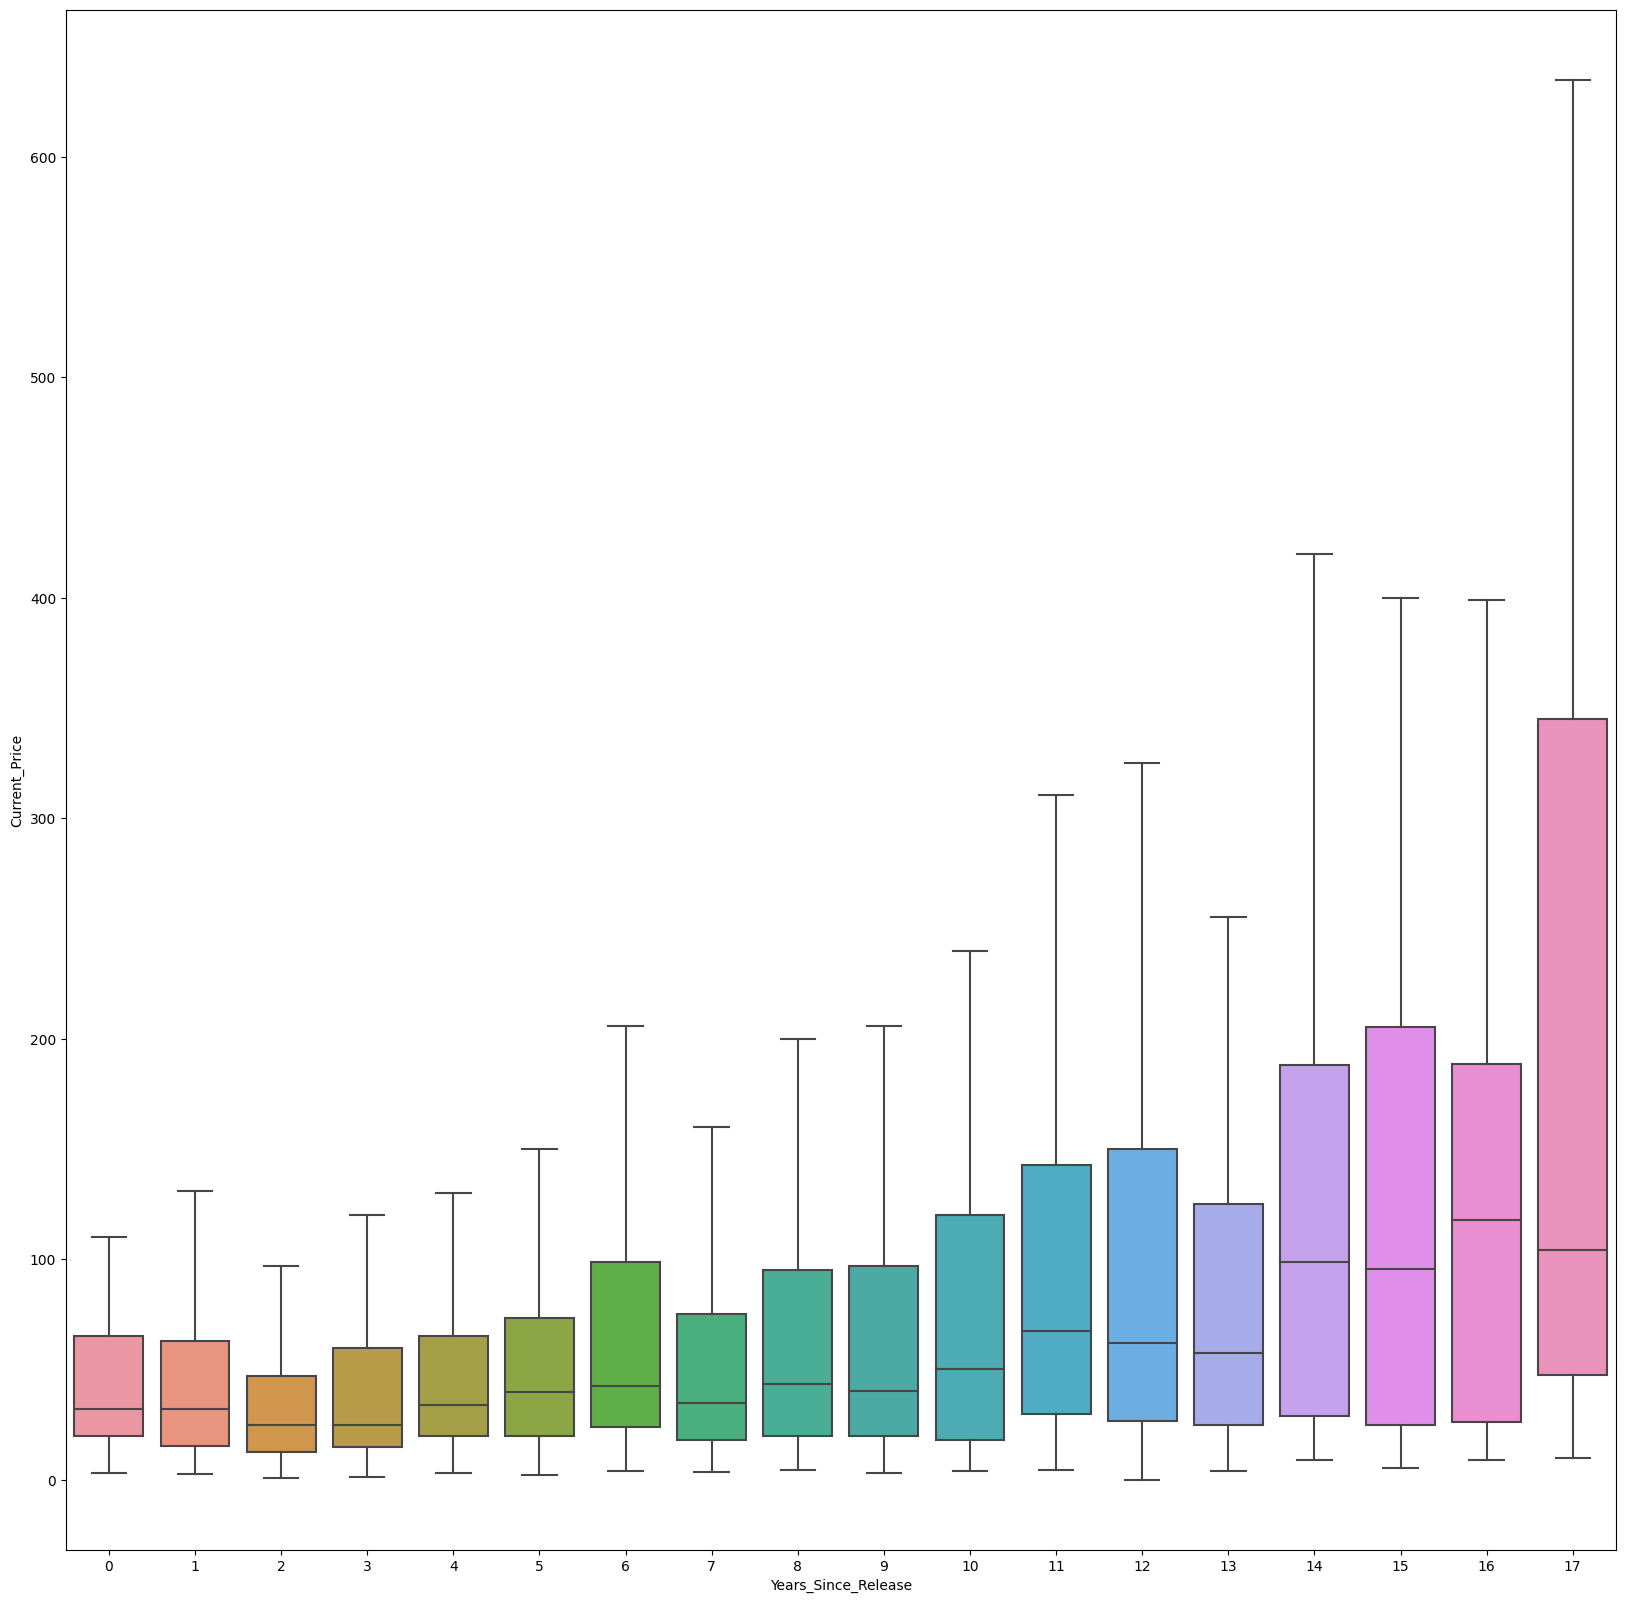

In [474]:
# plot a boxplot of Current_Price grouped by Years_Since_Release

plt.figure(figsize=(20,20))
sns.boxplot(x='Years_Since_Release', y='Current_Price', data=SETS_after_2005_df, showfliers=False)
plt.show()


In general, we can say the longer since it has been released, the higher the current price is. 

### One-hot encoding of Availability

In [475]:
# do one-hot encoding for values of Availability

SETS_after_2005_df = pd.get_dummies(SETS_after_2005_df, columns=['Availability'])
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Theme                          3281 non-null   object 
 1   Theme_Group                    3281 non-null   object 
 2   Num_Instructions               3281 non-null   int64  
 3   Pieces                         3280 non-null   float64
 4   Minifigures                    3281 non-null   float64
 5   Owned                          3281 non-null   float64
 6   Rating                         3281 non-null   float64
 7   USD_MSRP                       3281 non-null   float64
 8   Total_Quantity                 3281 non-null   float64
 9   Current_Price                  3281 non-null   float64
 10  USD_MSRP_adjusted_2022         3281 non-null   float64
 11  Years_Since_Release            3281 non-null   int64  
 12  Availability_LEGO exclusive    3281 non-null

### One-hot encoding of Theme_Groups

In [476]:
# do one-hot encoding for values of Theme_Group

SETS_after_2005_df = pd.get_dummies(SETS_after_2005_df, columns=['Theme_Group'])
SETS_after_2005_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Theme                          3281 non-null   object 
 1   Num_Instructions               3281 non-null   int64  
 2   Pieces                         3280 non-null   float64
 3   Minifigures                    3281 non-null   float64
 4   Owned                          3281 non-null   float64
 5   Rating                         3281 non-null   float64
 6   USD_MSRP                       3281 non-null   float64
 7   Total_Quantity                 3281 non-null   float64
 8   Current_Price                  3281 non-null   float64
 9   USD_MSRP_adjusted_2022         3281 non-null   float64
 10  Years_Since_Release            3281 non-null   int64  
 11  Availability_LEGO exclusive    3281 non-null   uint8  
 12  Availability_Retail            3281 non-null

### One-hot encoding of Theme

In [477]:
SETS_after_2005_df = pd.get_dummies(SETS_after_2005_df, columns=['Theme'])
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 118 entries, Num_Instructions to Theme_Xtra
dtypes: float64(8), int64(2), uint8(108)
memory usage: 628.0 KB


## Correlation matrix

In [478]:
# create a correlation matrix of SETS_after_2005_df_copy

corr_matrix = SETS_after_2005_df.corr()
corr_matrix

Num_Instructions    Pieces  Minifigures     Owned  \
Num_Instructions            1.000000  0.508175     0.154134  0.092779   
Pieces                      0.508175  1.000000     0.335258  0.177349   
Minifigures                 0.154134  0.335258     1.000000  0.190853   
Owned                       0.092779  0.177349     0.190853  1.000000   
Rating                      0.137289  0.190755     0.154699  0.376253   
...                              ...       ...          ...       ...   
Theme_Unikitty             -0.002364 -0.012940     0.050056 -0.037976   
Theme_Vidiyo               -0.029840 -0.016630    -0.017938 -0.035840   
Theme_Vikings              -0.008261  0.000995     0.003388 -0.013031   
Theme_World Racers          0.004633 -0.002576     0.016164 -0.014476   
Theme_Xtra                 -0.058824 -0.032283    -0.049960 -0.015208   

                      Rating  USD_MSRP  Total_Quantity  Current_Price  \
Num_Instructions    0.137289  0.509175       -0.038201       0.196218   
Pieces              0.190755  0.904474       -0.000150       0.574350   
Minifigures         0.154699  0.407906        0.016801       0.335483   
Owned               0.376253  0.174470        0.357357       0.184423   
Rating              1.000000  0.177958        0.105289       0.217847   
...                      ...       ...             ...            ...   
Theme_Unikitty     -0.020477 -0.018621        0.043753      -0.018147   
Theme_Vidiyo       -0.009934 -0.014277       -0.001574      -0.028154   
Theme_Vikings       0.011246 -0.002028       -0.005854       0.000784   
Theme_World Racers  0.004026 -0.002028       -0.007708      -0.006122   
Theme_Xtra          0.015034 -0.038113        0.038105      -0.029648   

                    USD_MSRP_adjusted_2022  Years_Since_Release  ...  \
Num_Instructions                  0.488167            -0.158748  ...   
Pieces                            0.892924            -0.101149  ...   
Minifigures                       0.414791             0.009634  ...   
Owned                             0.193577             0.162386  ...   
Rating                            0.198486             0.217788  ...   
...                                    ...                  ...  ...   
Theme_Unikitty                   -0.019202            -0.019598  ...   
Theme_Vidiyo                     -0.017421            -0.072461  ...   
Theme_Vikings                     0.000556             0.043238  ...   
Theme_World Racers               -0.000499             0.026359  ...   
Theme_Xtra                       -0.039036            -0.038134  ...   

                    Theme_The Powerpuff Girls  Theme_The Simpsons  \
Num_Instructions                    -0.011684            0.006554   
Pieces                              -0.009262            0.063151   
Minifigures                          0.009310            0.031899   
Owned                               -0.020600            0.044527   
Rating                               0.002630            0.018970   
...                                       ...                 ...   
Theme_Unikitty                      -0.001142           -0.001142   
Theme_Vidiyo                        -0.001558           -0.001558   
Theme_Vikings                       -0.000431           -0.000431   
Theme_World Racers                  -0.000431           -0.000431   
Theme_Xtra                          -0.001366           -0.001366   

                    Theme_Toy Story  Theme_Trolls World Tour  \
Num_Instructions           0.015391                -0.000572   
Pieces                    -0.015125                -0.012423   
Minifigures               -0.004179                 0.007332   
Owned                      0.008178                -0.042824   
Rating                     0.023837                -0.067819   
...                             ...                      ...   
Theme_Unikitty            -0.002682                -0.002286   
Theme_Vidiyo              -0.003658                -0.003118

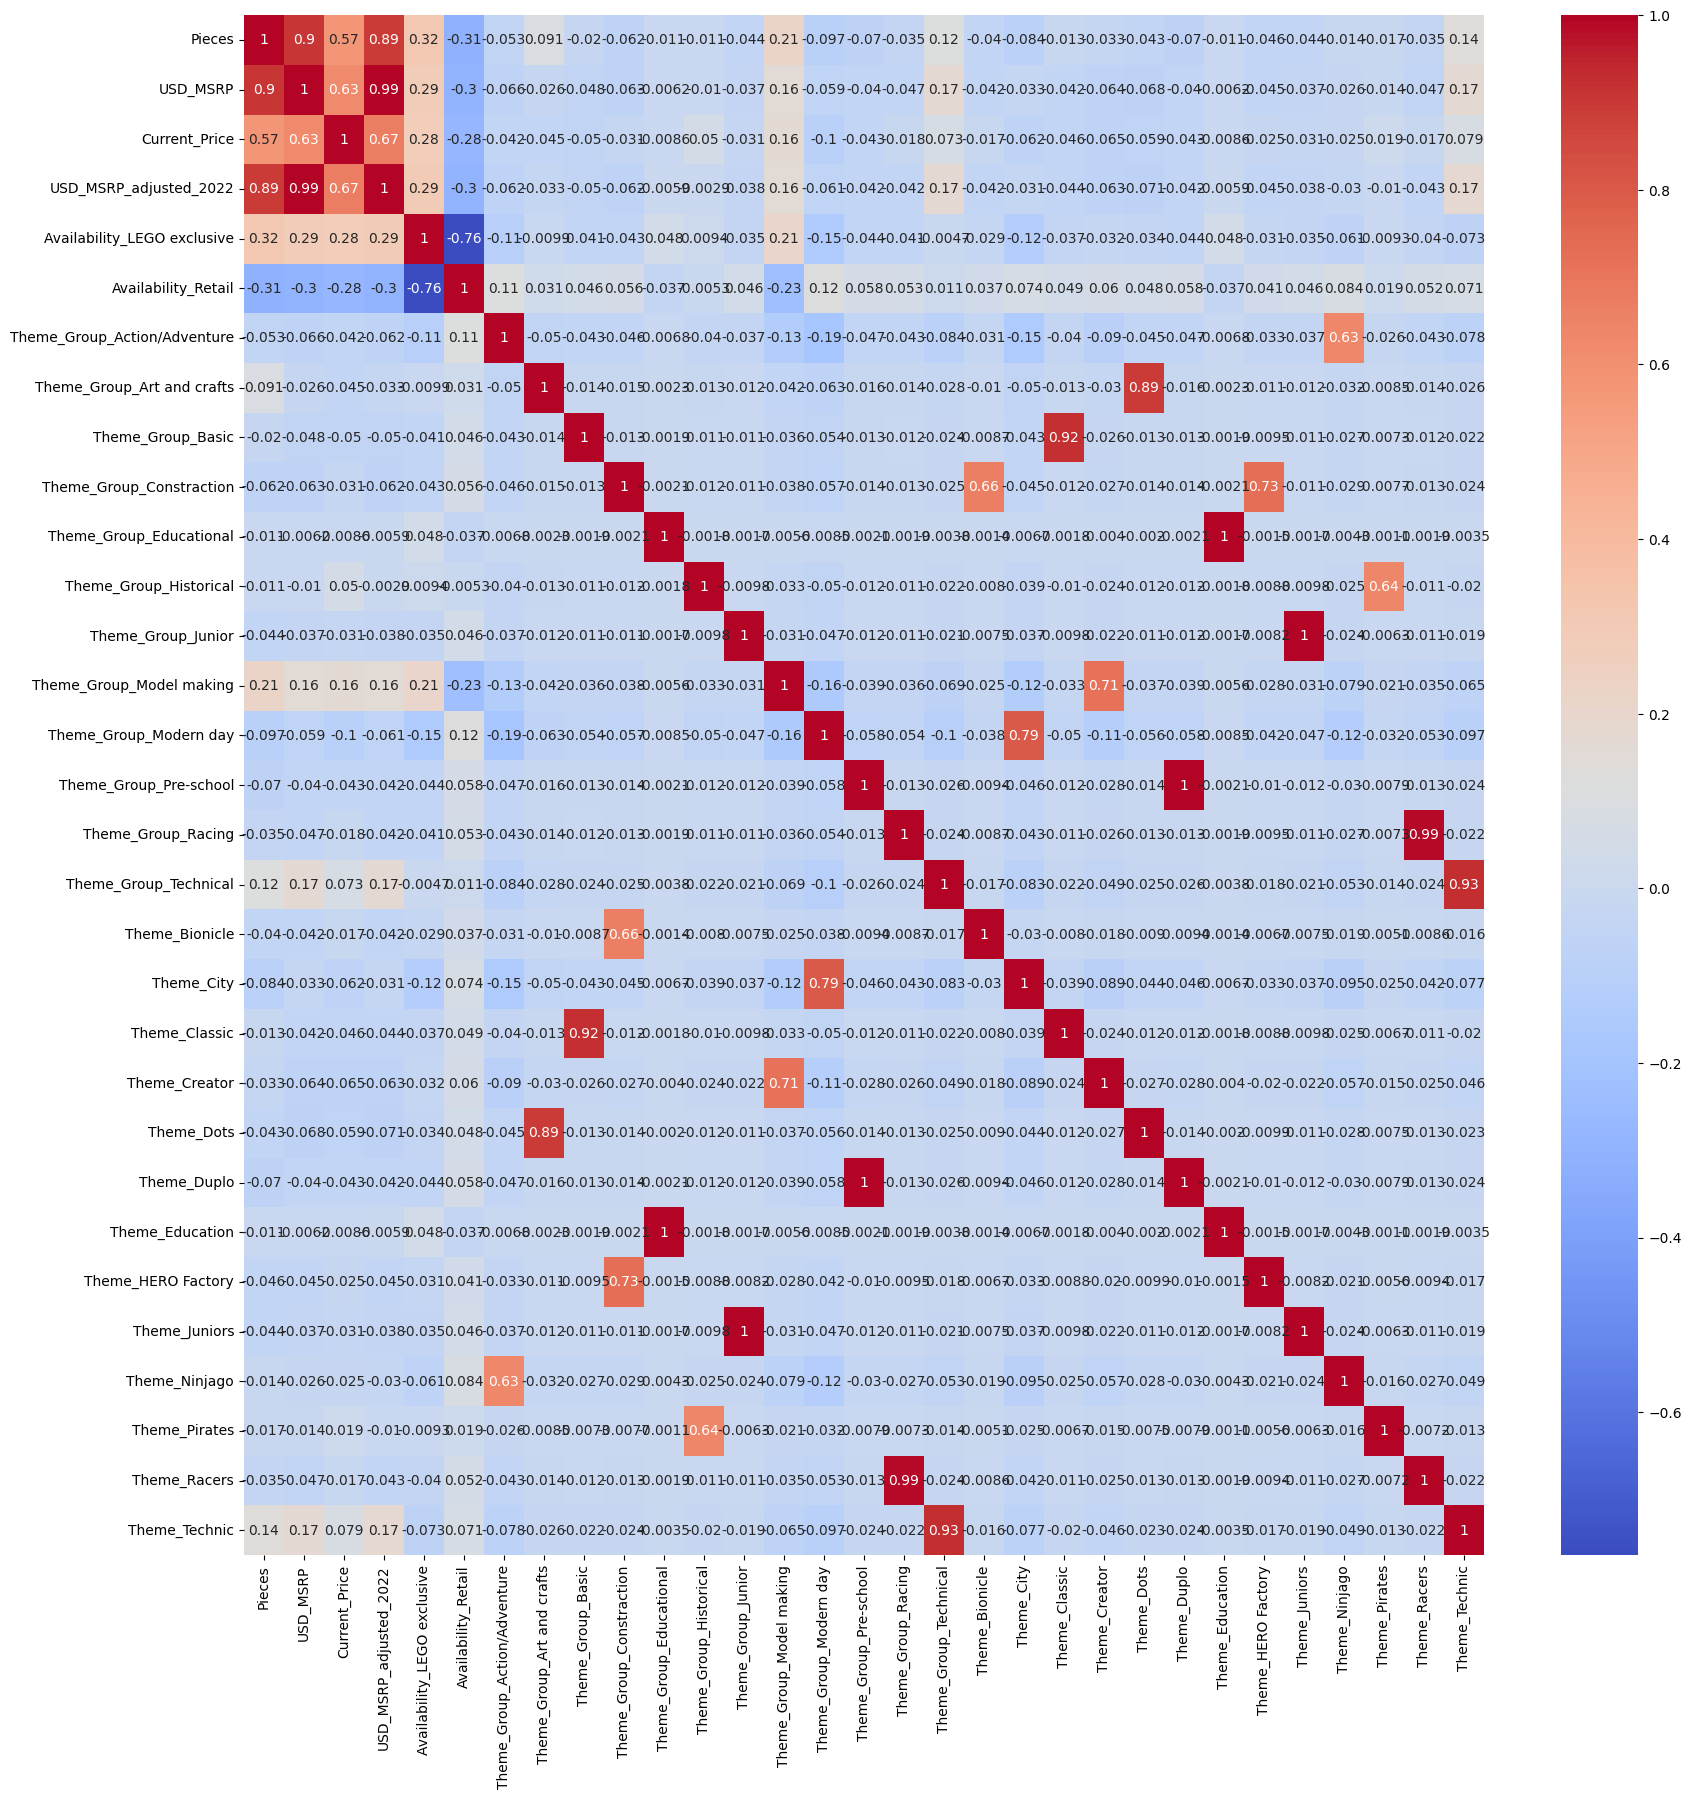

In [479]:
# show the correlation matrix as a heatmap but only of those with correlation > 0.7 or < -0.7, ignoring the diagonal

import numpy as np

# Create a mask for correlations > 0.7 or < -0.7
mask = np.abs(corr_matrix) < 0.6

# Set the diagonal values to True
np.fill_diagonal(mask.values, True)

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix.loc[~mask.all(), ~mask.all()]

plt.figure(figsize=(20,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

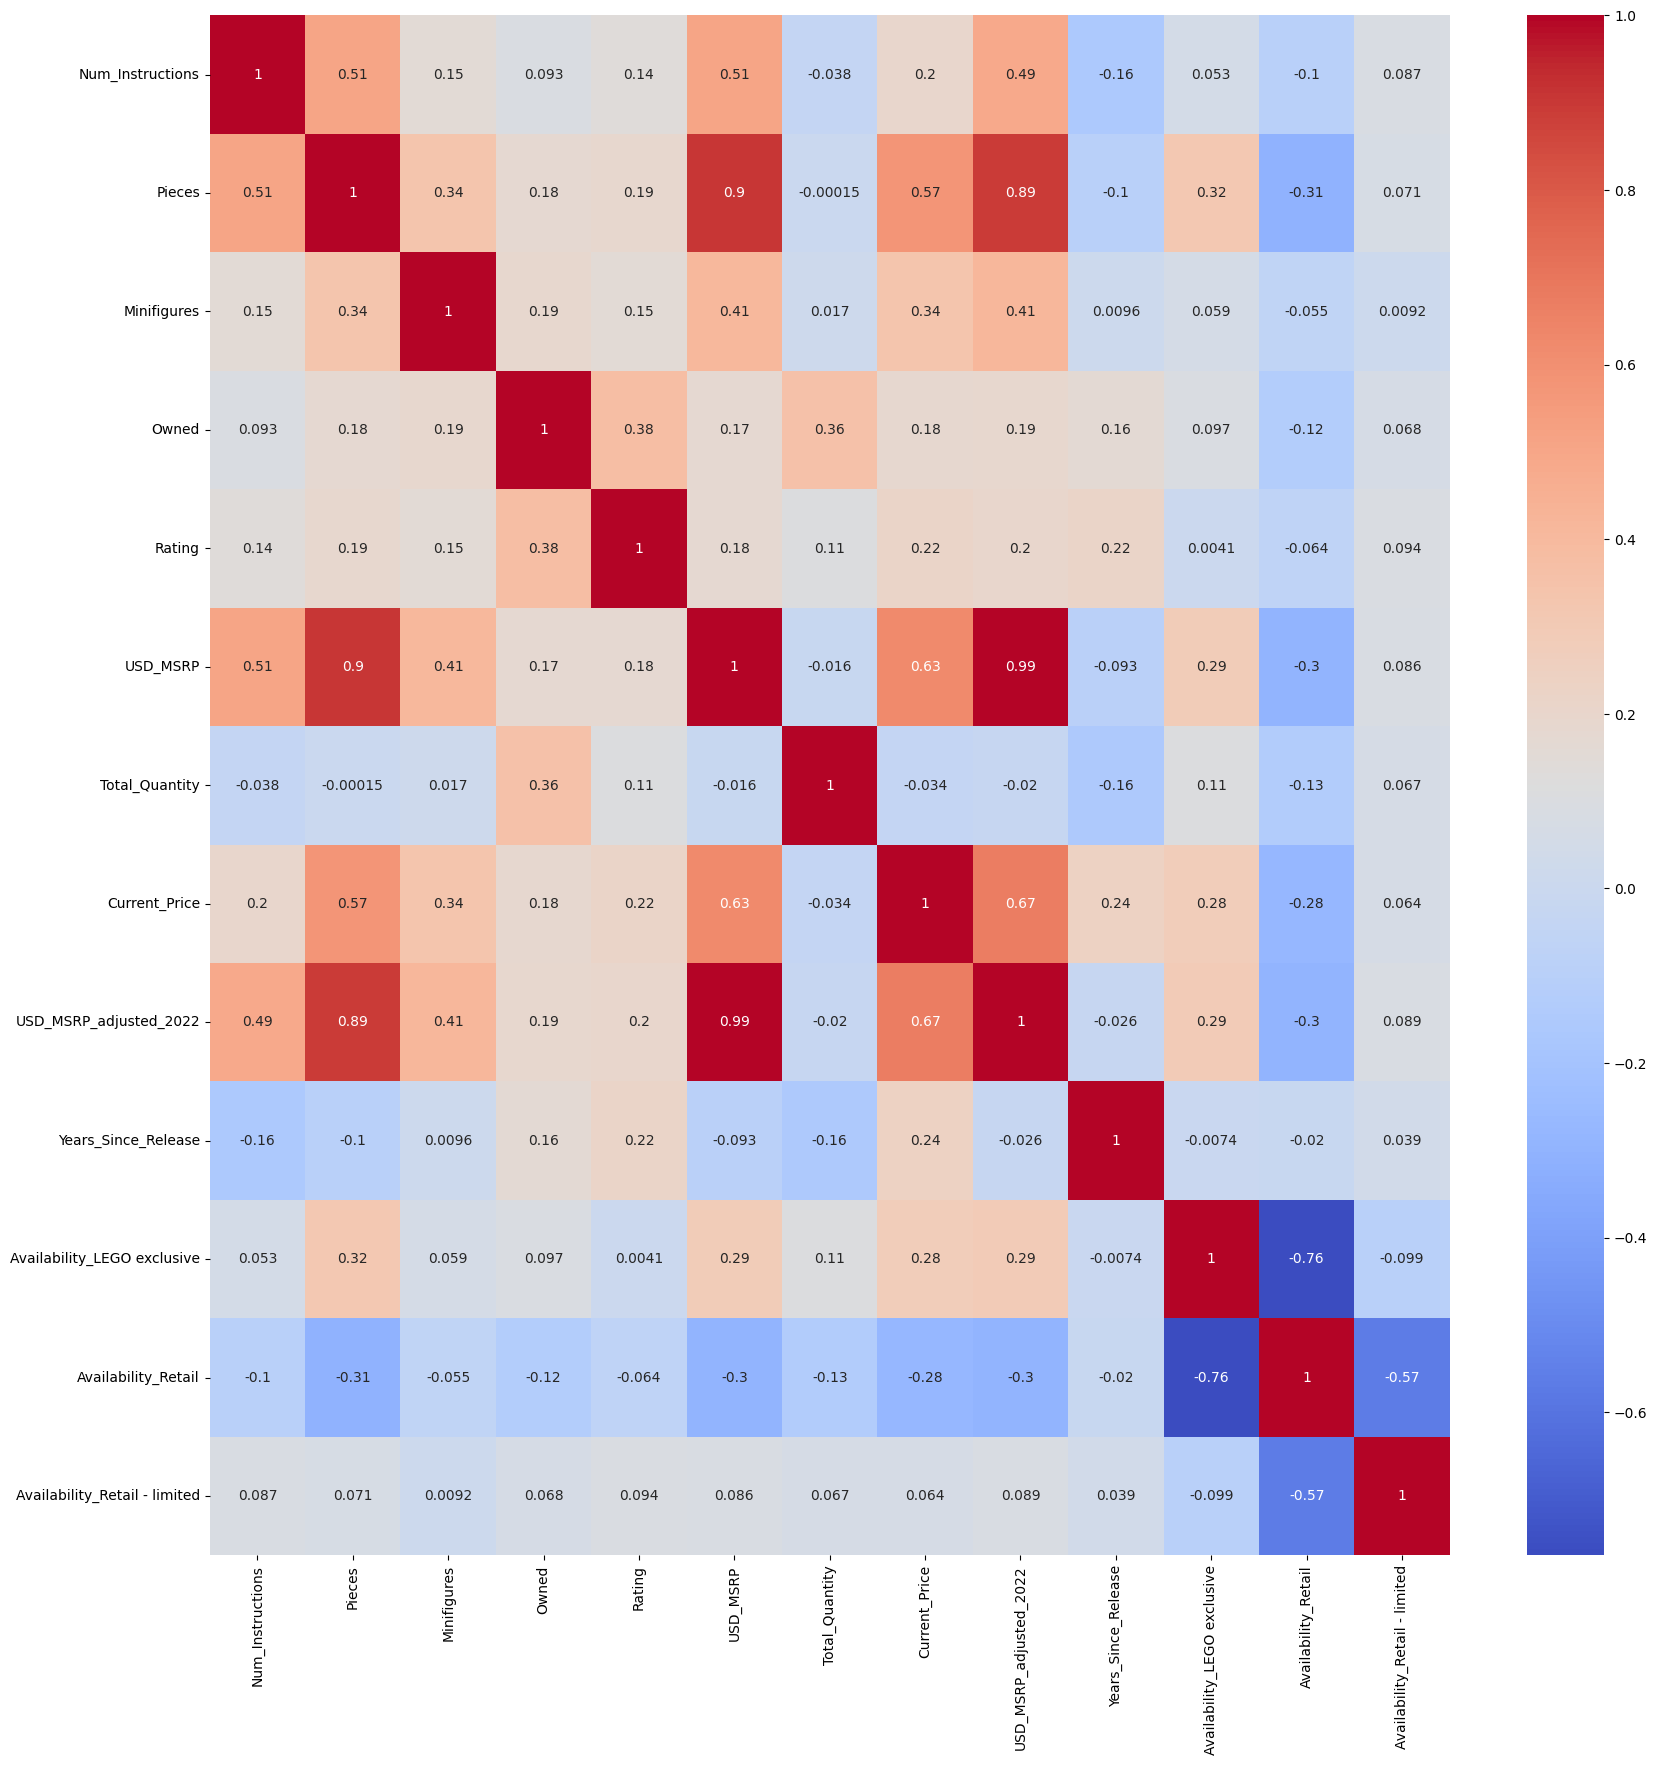

In [480]:
# plot correlation map

# create a data frame as a copy of SETS_after_2005_df_copy but without columns starting by 'Theme_'

testing = SETS_after_2005_df.copy()
# remove columns from testing not in the columns list
columns = ['Num_Instructions', 'Pieces', 'Minifigures', 'Owned', 'Rating', 'USD_MSRP', 'Total_Quantity', 'Current_Price', 'USD_MSRP_adjusted_2022', 'Years_Since_Release', 'Availability_LEGO exclusive', 'Availability_Retail', 'Availability_Retail - limited']

for column in testing.columns:
    if column not in columns:
        testing.drop(columns=[column], inplace=True)


plt.figure(figsize=(20,20))
sns.heatmap(testing.corr(), annot=True, cmap='coolwarm')
plt.show()

Looking at correlation of Availability one-hot encoding, we chose to remove the Availability_Retail. By removing it, all the information still remains, because if it is not Retail limited and neither is it LEGO exclusive, it must be Retail. 

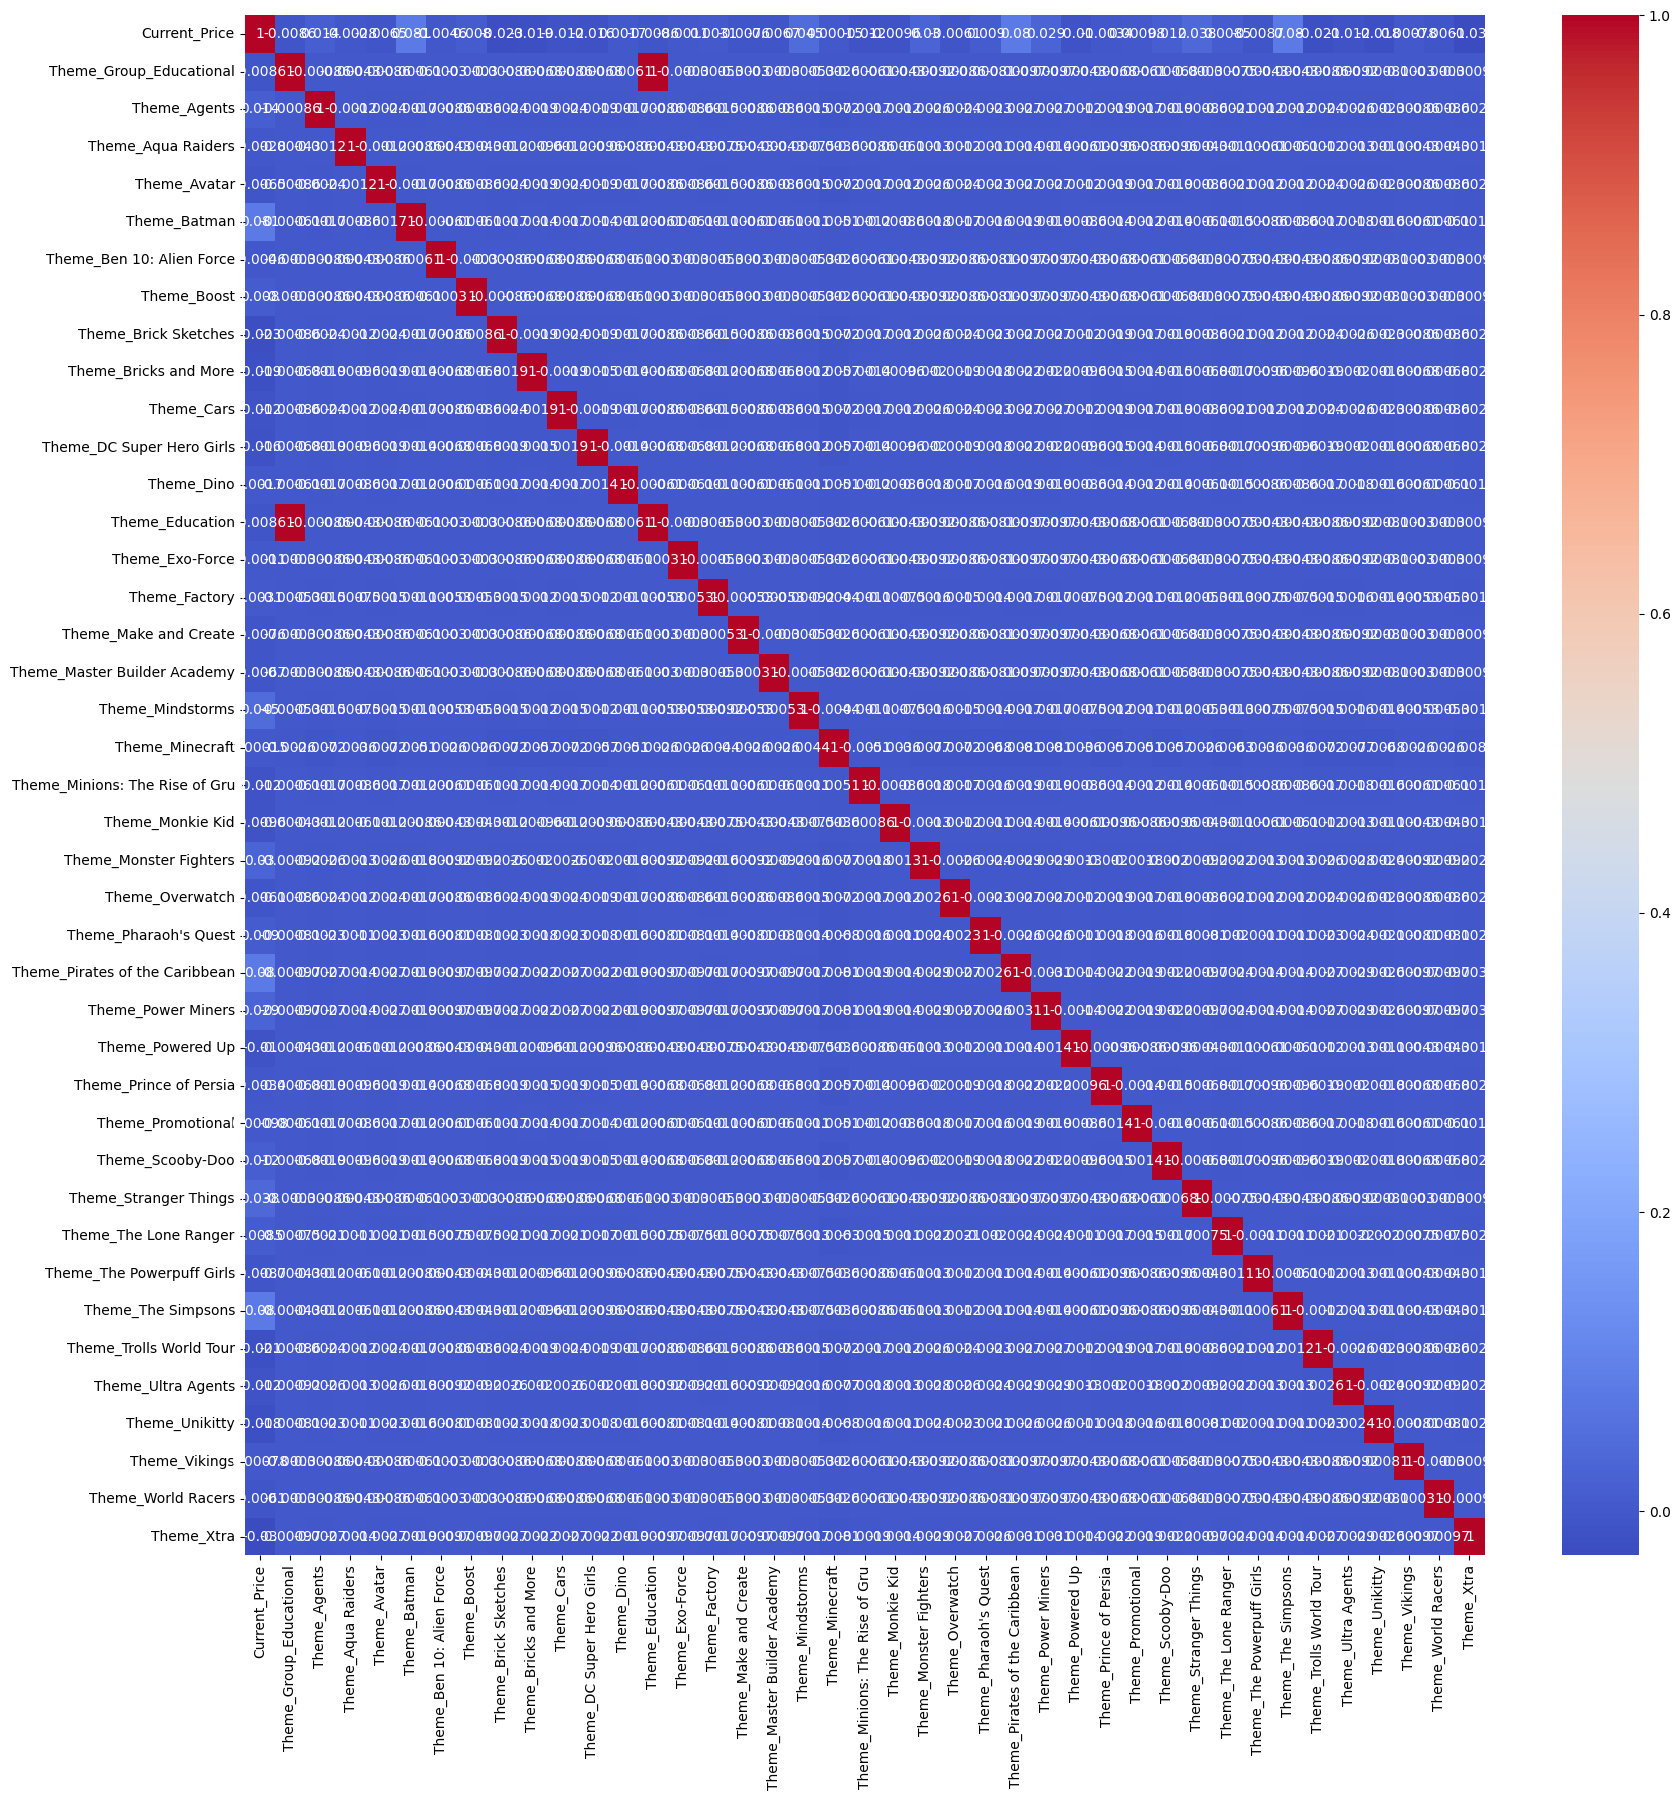

In [481]:
# calculate correlatoin with the column 'Current_Price'
# exclude 'Pieces' 'USD_MSRP' 'USD_MSRP_adjusted_2022' 'Years_Since_Release' 'Availability_LEGO exclusive' 'Availability_Retail' 'Availability_Retail - limited'

tmp = SETS_after_2005_df.drop(columns=['Pieces', 'USD_MSRP', 'USD_MSRP_adjusted_2022', 'Years_Since_Release', 'Availability_LEGO exclusive', 'Availability_Retail', 'Availability_Retail - limited', 'Rating', 'Num_Instructions','Owned','Minifigures','Total_Quantity'])
#tmp.corr()['Current_Price'].sort_values(ascending=False)

# plot the correlation
corr_matrix = tmp.corr()

mask = np.abs(corr_matrix) > 0.001

# Set the diagonal values to True
np.fill_diagonal(mask.values, True)

# Filter the correlation matrix
filtered_corr_matrix = corr_matrix.loc[~mask.all(), ~mask.all()]

plt.figure(figsize=(20,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()



In [482]:
# only show the correlations with Current_Price that are < 0.01 or > -0.01

tmp = SETS_after_2005_df.drop(columns=['Pieces', 'USD_MSRP', 'USD_MSRP_adjusted_2022', 'Years_Since_Release', 'Availability_LEGO exclusive', 'Availability_Retail', 'Availability_Retail - limited', 'Rating', 'Num_Instructions','Owned','Minifigures','Total_Quantity'])

# Calculate correlations
correlations = tmp.corr()['Current_Price'].sort_values(ascending=False)

# Count occurrences between -0.01 and 0.01
count = ((correlations >= -0.01) & (correlations <= 0.01)).sum()

print(count)

30


### Dropping correlating features

In [483]:
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 118 entries, Num_Instructions to Theme_Xtra
dtypes: float64(8), int64(2), uint8(108)
memory usage: 628.0 KB


In [484]:
# drop Pieces, Availability_Retail and USD_MSRP columns

SETS_after_2005_df.drop(columns=['Pieces', 'Availability_Retail', 'USD_MSRP'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 115 entries, Num_Instructions to Theme_Xtra
dtypes: float64(6), int64(2), uint8(107)
memory usage: 573.5 KB


In [485]:
# drop Theme_Group_Action/Adventure, Theme_Group_Arts and crafts, Theme_Group_Basic, Theme_Group_Constraction, Theme_Group_Educational, Theme_Group_Historical, Theme_Group_Junior, Theme_Group_Model making, Theme_Group_Modern day, Theme_Group_Pre-school, Theme_Group_Racing, Theme_Group_Technical

SETS_after_2005_df.drop(columns=['Theme_Group_Action/Adventure', 'Theme_Group_Art and crafts', 'Theme_Group_Basic', 'Theme_Group_Constraction', 
                                 'Theme_Group_Educational', 'Theme_Group_Historical', 'Theme_Group_Junior', 'Theme_Group_Model making', 
                                 'Theme_Group_Modern day', 'Theme_Group_Pre-school', 'Theme_Group_Racing', 'Theme_Group_Technical'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 103 entries, Num_Instructions to Theme_Xtra
dtypes: float64(6), int64(2), uint8(95)
memory usage: 535.1 KB


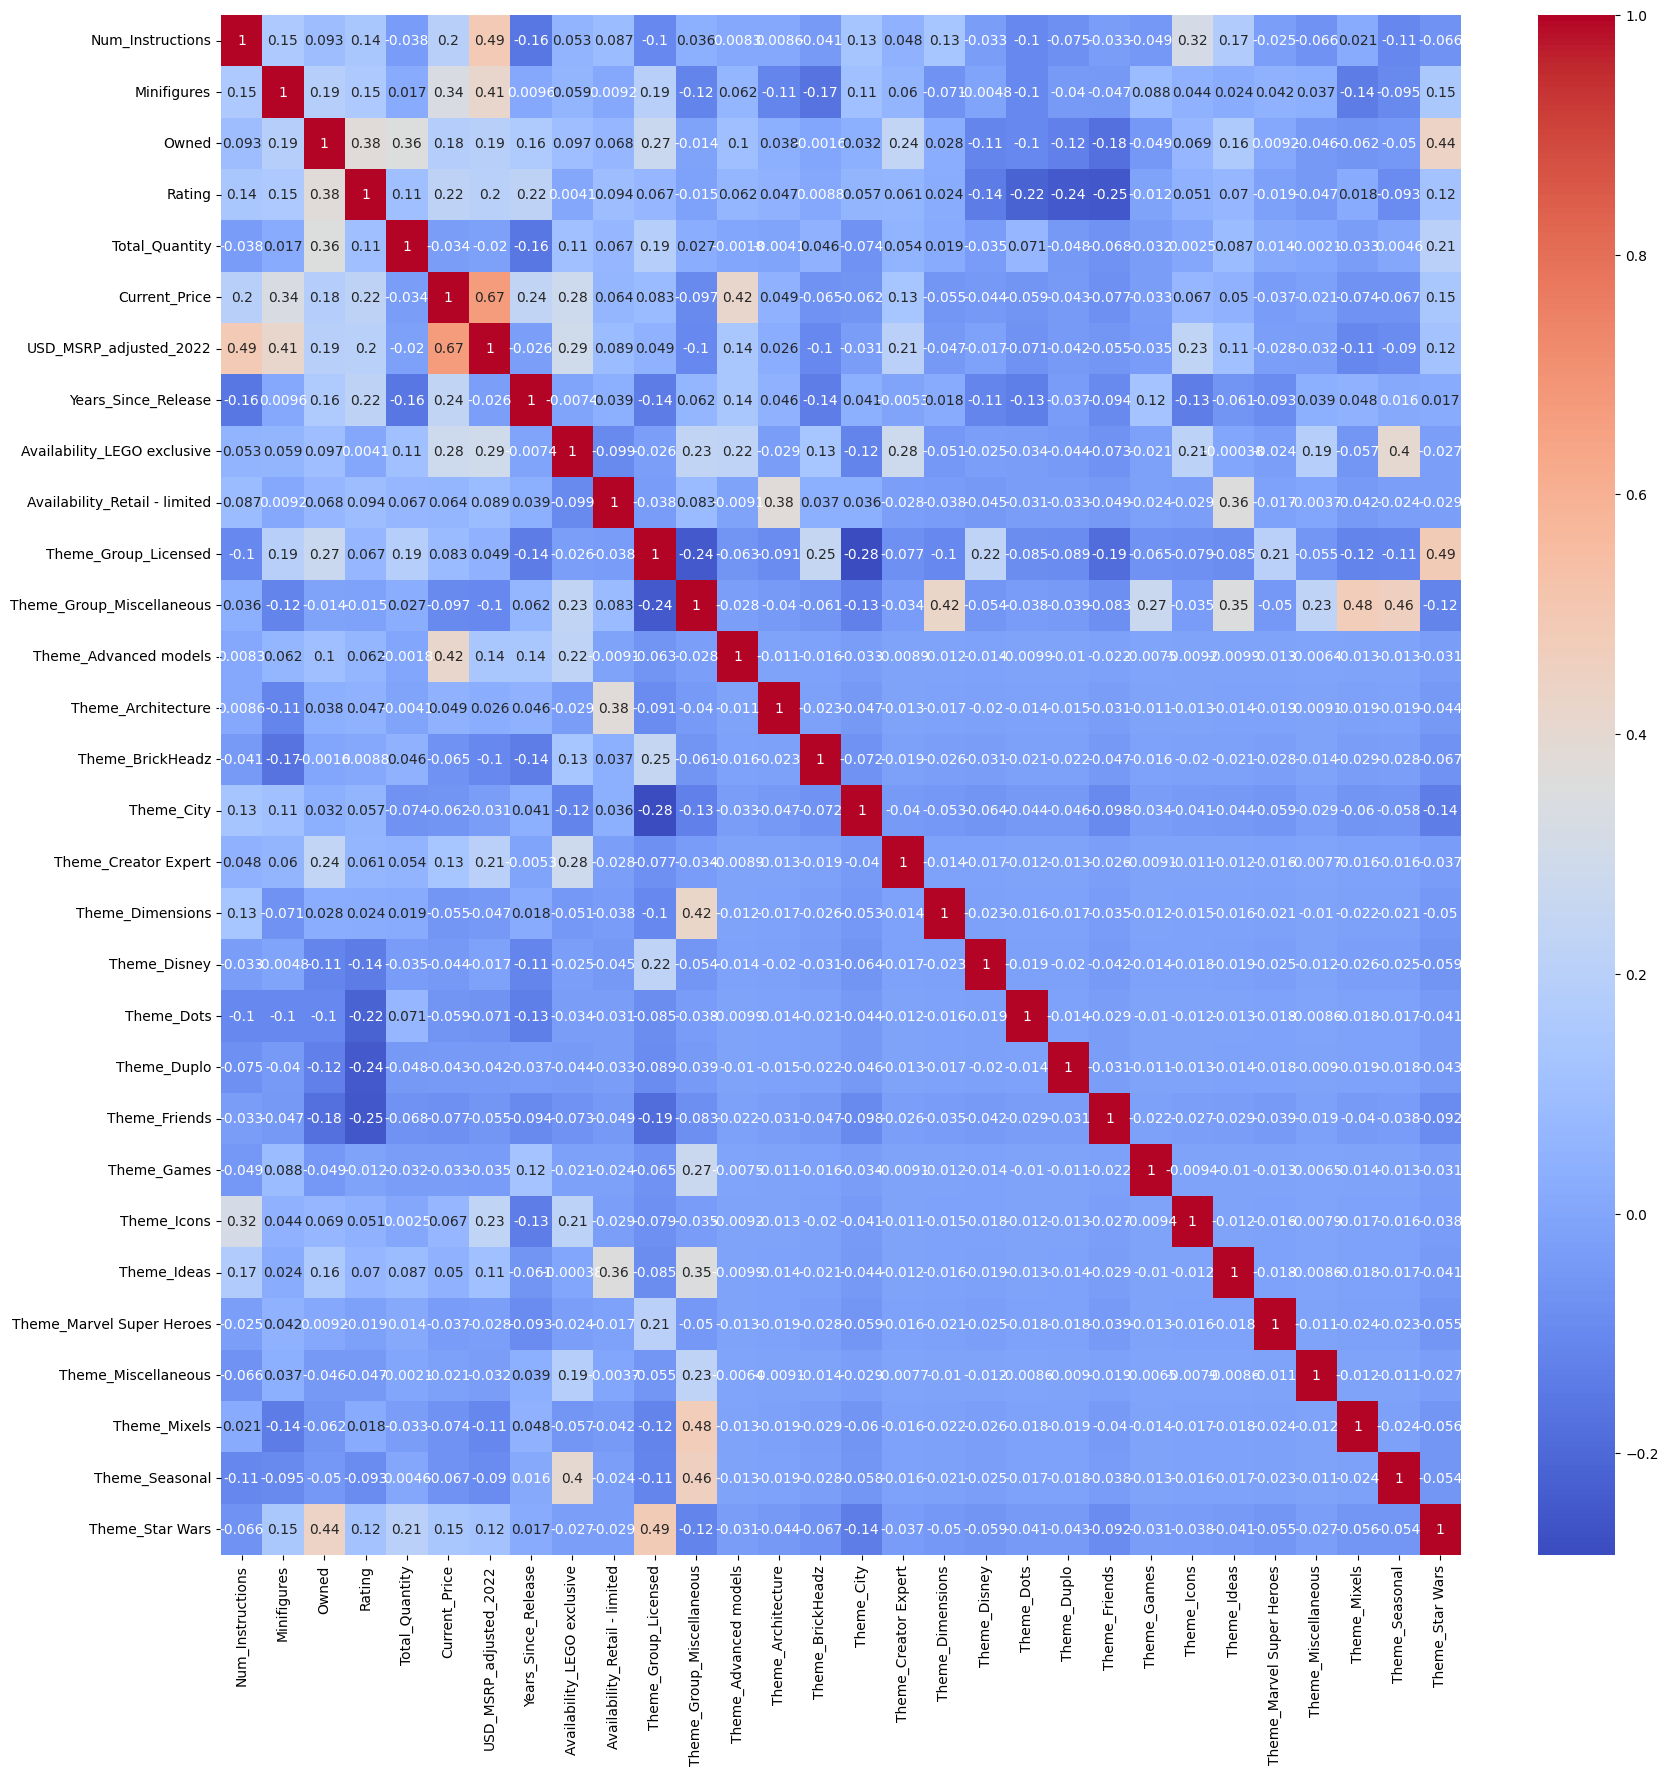

In [486]:
fixed_correlation_matrix = SETS_after_2005_df.corr()

mask = np.abs(fixed_correlation_matrix) < 0.2
np.fill_diagonal(mask.values, True)
filtered_corr_matrix = fixed_correlation_matrix.loc[~mask.all(), ~mask.all()]

plt.figure(figsize=(20,20))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

As the only highly correlated features are Current_Price and USD_MSRP_adjusted_2022, we keep it as it is, as Current_Price is what we will be estimating. 

### Make Current_Price be adjusted to 2022 dollars

Because we will be using the USD_MSRP_adjusted_2022 as our feature, we want to adjust the Current_Price to 2022 dollars as well.

In [487]:
SETS_after_2005_df['Current_Price_Adjusted_2022'] = SETS_after_2005_df.apply(lambda row: row['Current_Price'] * 0.967, axis=1)

In [488]:
SETS_after_2005_df.drop(columns=['Current_Price'], inplace=True)
SETS_after_2005_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3281 entries, 6104 to 14897
Columns: 103 entries, Num_Instructions to Current_Price_Adjusted_2022
dtypes: float64(6), int64(2), uint8(95)
memory usage: 535.1 KB


# Possible models

Simple linear regression: We want to try to use simple linear regression, as it performs significantly faster than other models, being a very simple one. On the other hand, it might not fit this problem, as it is so simple. We do not know, whether the data will follow a linear line. 

Elastic net: We want to try to use Elastic net, as a combination of Lasso and Ridge. As it is widely used as a feature selector, we want to use this one, as we have many features. It does well with driving down the least significant features. 

Few layer neural network: On the other hand, opposite to Simple linear regression, we also want to try a model that is complex, to see if it would fit the data better. If the model is too complex, it might overfit the data. That is why we will try to make it not too complex, just a few layers, to limit the risk of overfitting. 

## Pre-processing

We are going to do pre-processing for each model separately, as we will be using different models that need different kinds of pre-processing.

In [489]:
# make a list of all columns that start with 'Theme_'

theme_columns = []

for column in SETS_after_2005_df.columns:
    if column.startswith('Theme_'):
        theme_columns.append(column)

In [490]:
testing_no_theme = SETS_after_2005_df.copy()

X_testing_no_theme = testing_no_theme.drop(columns=['Current_Price_Adjusted_2022']+theme_columns)
y_testing_no_theme = testing_no_theme['Current_Price_Adjusted_2022']

In [491]:
X = SETS_after_2005_df.drop(columns=['Current_Price_Adjusted_2022'])
y = SETS_after_2005_df['Current_Price_Adjusted_2022']

array([[<Axes: title={'center': 'Num_Instructions'}>,
        <Axes: title={'center': 'Minifigures'}>,
        <Axes: title={'center': 'Owned'}>],
       [<Axes: title={'center': 'Rating'}>,
        <Axes: title={'center': 'Total_Quantity'}>,
        <Axes: title={'center': 'USD_MSRP_adjusted_2022'}>],
       [<Axes: title={'center': 'Years_Since_Release'}>, <Axes: >,
        <Axes: >]], dtype=object)

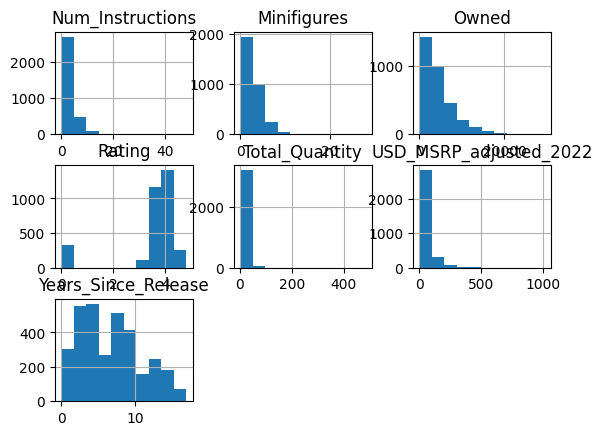

In [492]:
# Non categorial columns
cols = ['Num_Instructions', 'Minifigures', 'Owned', 'Rating','Total_Quantity' ,'USD_MSRP_adjusted_2022', 'Years_Since_Release']
X[cols].hist()

# Linear regression

## With Themes

### Pre-processing

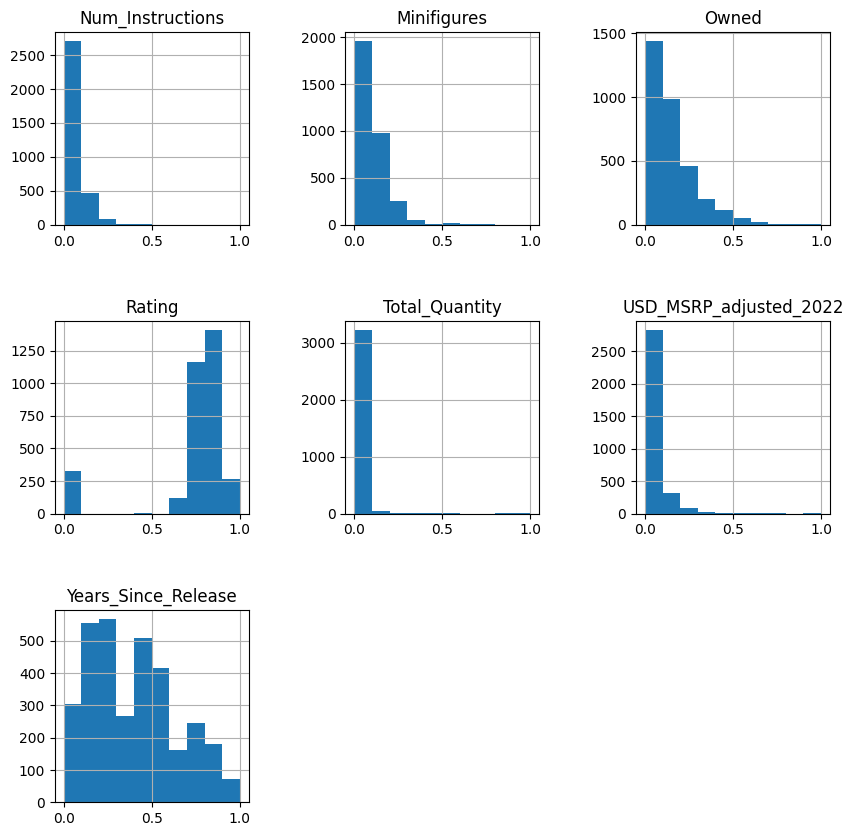

In [493]:
from sklearn.preprocessing import MinMaxScaler

X_LR = X.copy() 

# Non categorial columns
cols = ['Num_Instructions', 'Minifigures', 'Owned', 'Rating','Total_Quantity' ,
        'USD_MSRP_adjusted_2022', 'Years_Since_Release']

scaler = MinMaxScaler()
scaler.fit(X_LR[cols])
X_LR[cols] = scaler.transform(X_LR[cols])

X_LR[cols].hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Train, val and test split

In [494]:
# Test, Train and Validation split

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X_LR, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

### Model

In [495]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Create the regressor
lr_model = LinearRegression()

# Fit the regressor to the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
y_pred = lr_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

# Print validation set evaluation metrics
print(f'Validation Mean Squared Error: {mse_val:.2f}')
print(f'Validation R-squared: {r2_val:.2f}')
print(f'Validation Root Mean Squared Error: {np.sqrt(mse_val):.2f}')
print(f'Validation Mean Absolute Error: {mean_absolute_error(y_val, y_pred):.2f}')
print(f'Validation Explained Variance Score: {explained_variance_score(y_val, y_pred):.2f}')

Validation Mean Squared Error: 1636095097083725759905792.00
Validation R-squared: -151414461725778345984.00
Validation Root Mean Squared Error: 1279099330421.11
Validation Mean Absolute Error: 55824471489.88
Validation Explained Variance Score: -151126053227275288576.00


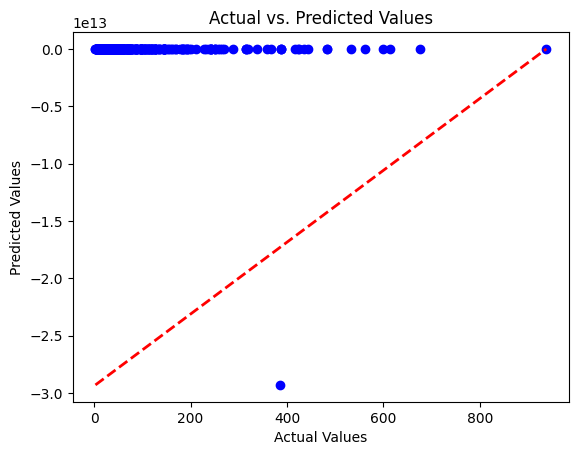

In [496]:
# Actual vs Predicted

plt.scatter(y_val, y_pred, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

Looks like having all those different themes does not help the model. Lets try again without the themes

# Without themes

### Pre-processing

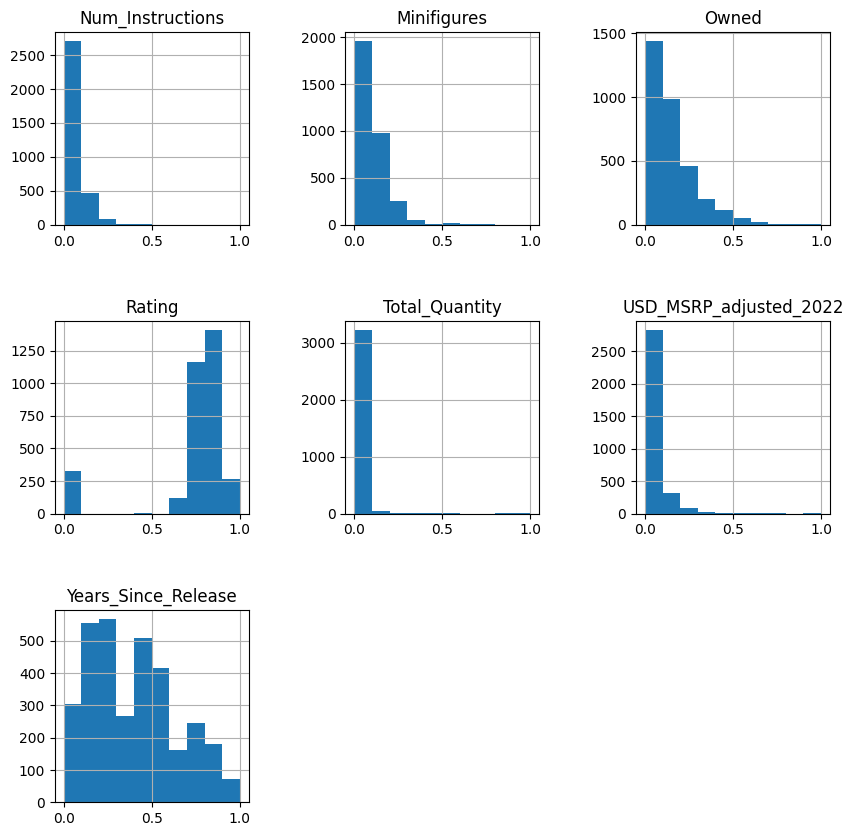

In [497]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

X_LR = X_testing_no_theme.copy() 

# Non categorial columns
cols = ['Num_Instructions', 'Minifigures', 'Owned', 'Rating','Total_Quantity' ,
        'USD_MSRP_adjusted_2022', 'Years_Since_Release']

scaler = MinMaxScaler()
scaler.fit(X_LR[cols])
X_LR[cols] = scaler.transform(X_LR[cols])

X_LR[cols].hist(figsize=(10,10))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

### Train, Val and Test sets

In [498]:
# Test, Train and Validation split

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X_LR, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

### Model

In [499]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Create the regressor
lr_model = LinearRegression()

# Fit the regressor to the training data
lr_model.fit(X_train, y_train)

# Predict on the validation data
y_pred = lr_model.predict(X_val)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_val, y_pred)
r2_val = r2_score(y_val, y_pred)

# Print validation set evaluation metrics
print(f'Validation Mean Squared Error: {mse_val:.2f}')
print(f'Validation R-squared: {r2_val:.2f}')
print(f'Validation Root Mean Squared Error: {np.sqrt(mse_val):.2f}')
print(f'Validation Mean Absolute Error: {mean_absolute_error(y_val, y_pred):.2f}')
print(f'Validation Explained Variance Score: {explained_variance_score(y_val, y_pred):.2f}')

Validation Mean Squared Error: 4286.63
Validation R-squared: 0.60
Validation Root Mean Squared Error: 65.47
Validation Mean Absolute Error: 37.74
Validation Explained Variance Score: 0.61


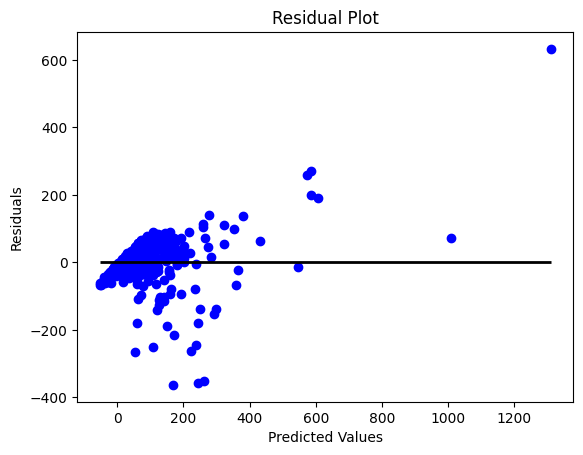

In [500]:
# Residual plot

plt.scatter(y_pred, y_pred - y_val, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='black', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

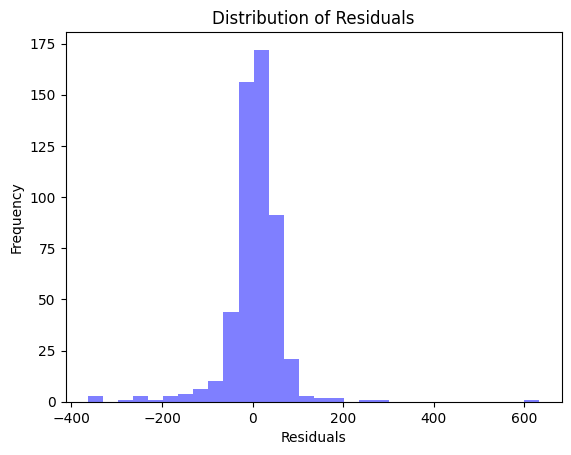

In [501]:
# Distribution of residuals

plt.hist(y_pred - y_val, bins=30, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


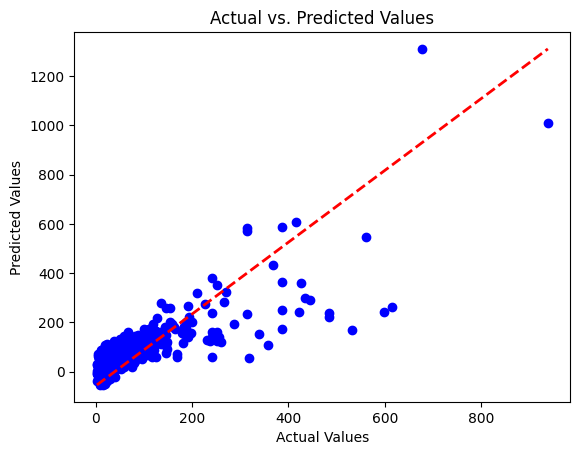

In [502]:
# Actual vs Predicted

plt.scatter(y_val, y_pred, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


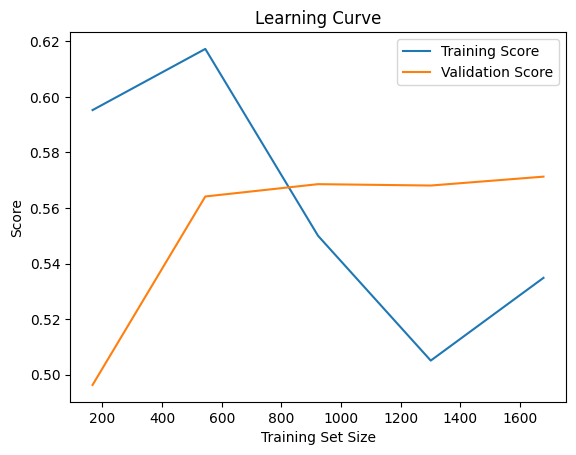

In [503]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(lr_model, X_train, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


### Train the model on validation and training set

In [504]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score

# Create the regressor
lr_model = LinearRegression()

# Fit the regressor to the training data
lr_model.fit(X_trainval, y_trainval)

# Predict on the test data
y_pred = lr_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

# Print test set evaluation metrics
print(f'Validation Mean Squared Error: {mse_test:.2f}')
print(f'Validation R-squared: {r2_test:.2f}')
print(f'Validation Root Mean Squared Error: {np.sqrt(mse_test):.2f}')
print(f'Validation Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}')
print(f'Validation Explained Variance Score: {explained_variance_score(y_test, y_pred):.2f}')

Validation Mean Squared Error: 15923.15
Validation R-squared: 0.52
Validation Root Mean Squared Error: 126.19
Validation Mean Absolute Error: 45.66
Validation Explained Variance Score: 0.52


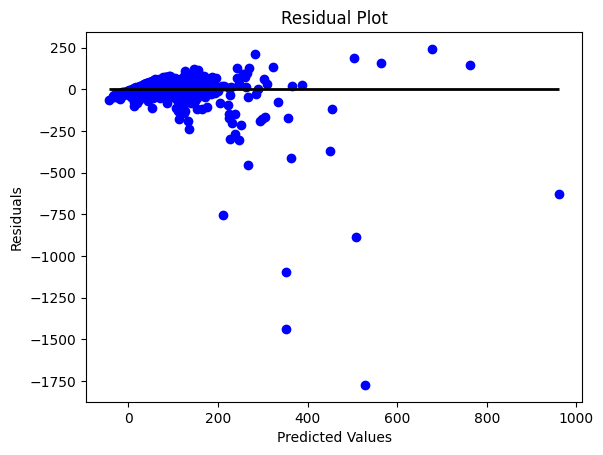

In [505]:
# Residual plot

plt.scatter(y_pred, y_pred - y_test, color='blue')
plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), color='black', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

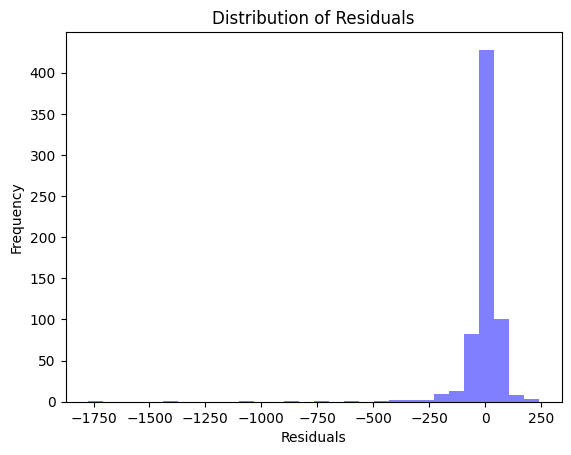

In [506]:
# Distribution of residuals

plt.hist(y_pred - y_test, bins=30, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


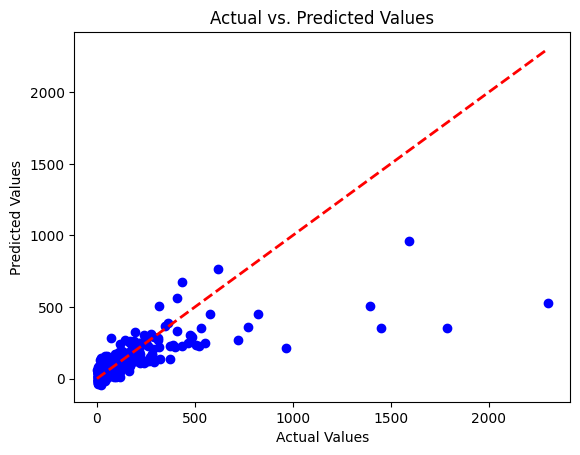

In [507]:
# Actual vs Predicted

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


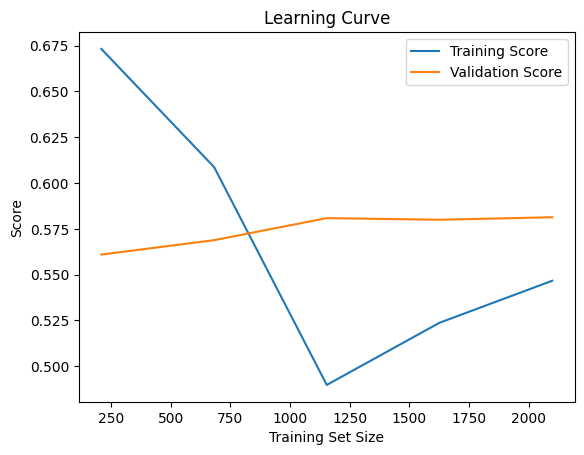

In [508]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(lr_model, X_trainval, y_trainval, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Elastic net

## With themes

### Split data

In [509]:
# Test, Train and Validation split

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

### Pre-processing

In [510]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

scaler = StandardScaler()

X_trainval_scaled = scaler.fit_transform(X_trainval)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Model

In [511]:

elastic_net_model = ElasticNet()

# Hyperparameter grid
param_grid = {
    'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ,1],
    'l1_ratio': [0.9, 1]
}

grid_search_elastic_net = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic_net.fit(X_train_scaled, y_train)

# Get the best Elastic Net model
best_elastic_net_model = grid_search_elastic_net.best_estimator_

# Make predictions on the test set
y_pred_elastic_net = best_elastic_net_model.predict(X_val_scaled)

# Evaluate the model
mse_elastic_net = mean_squared_error(y_val, y_pred_elastic_net)

# Print results
print('Best Elastic Net Model:', best_elastic_net_model)
print('Elastic Net MSE:', mse_elastic_net)
print('Elastic Net RMSE:', np.sqrt(mse_elastic_net))
print(f'R-squared: {r2_score(y_val, y_pred_elastic_net):.2f}')
print(f'Elastic Net Mean Absolute Error: {mean_absolute_error(y_val, y_pred_elastic_net):.2f}')

Best Elastic Net Model: ElasticNet(alpha=0.4, l1_ratio=1)
Elastic Net MSE: 3281.874231765253
Elastic Net RMSE: 57.28764466938097
R-squared: 0.70
Elastic Net Mean Absolute Error: 32.50


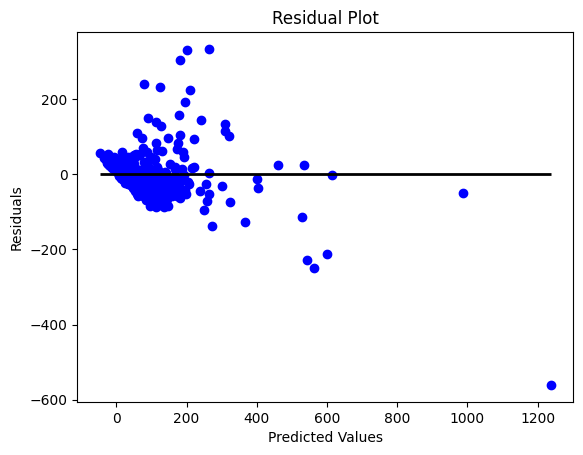

In [512]:
import matplotlib.pyplot as plt 

residuals = y_val - y_pred_elastic_net
plt.scatter(y_pred_elastic_net, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred_elastic_net), xmax=max(y_pred_elastic_net), color='black', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

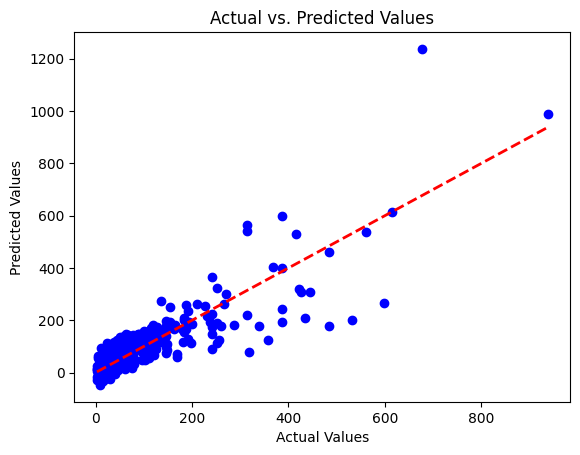

In [513]:
plt.scatter(y_val, y_pred_elastic_net, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

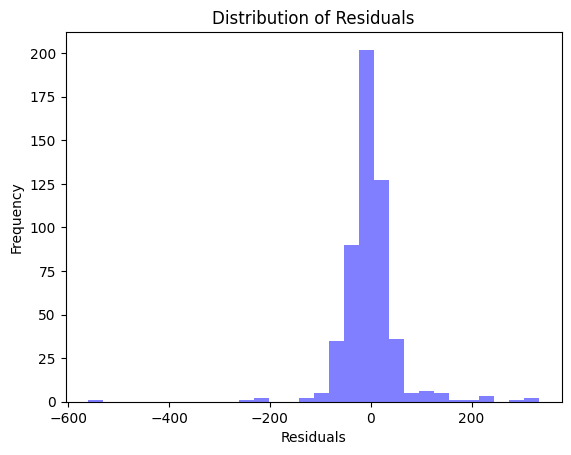

In [514]:
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

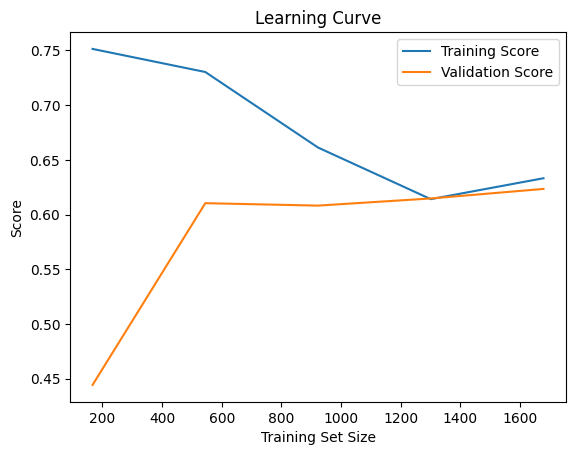

In [515]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_elastic_net_model, X_train_scaled, y_train, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


## Trained on train and validation set

In [516]:

elastic_net_model = ElasticNet()

# Hyperparameter grid
param_grid = {
    'alpha': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ,1],
    'l1_ratio': [0.6, 0.7, 0.8, 0.9, 1]
}

grid_search_elastic_net = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_elastic_net.fit(X_trainval_scaled, y_trainval)

# Get the best Elastic Net model
best_elastic_net_model = grid_search_elastic_net.best_estimator_

# Make predictions on the test set
y_pred_elastic_net = best_elastic_net_model.predict(X_test_scaled)

# Evaluate the model
mse_elastic_net = mean_squared_error(y_test, y_pred_elastic_net)

# Print results
print('Best Elastic Net Model:', best_elastic_net_model)
print('Elastic Net MSE:', mse_elastic_net)
print('Elastic Net RMSE:', np.sqrt(mse_elastic_net))
print(f'R-squared: {r2_score(y_test, y_pred_elastic_net):.2f}')
print(f'Elastic Net Mean Absolute Error: {mean_absolute_error(y_test, y_pred_elastic_net):.2f}')

Best Elastic Net Model: ElasticNet(alpha=0.3, l1_ratio=0.9)
Elastic Net MSE: 11558.689576644067
Elastic Net RMSE: 107.51134626933134
R-squared: 0.65
Elastic Net Mean Absolute Error: 39.83


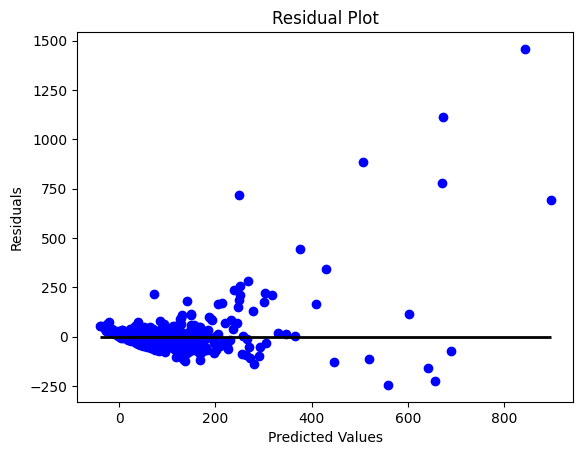

In [517]:
import matplotlib.pyplot as plt 

residuals = y_test - y_pred_elastic_net
plt.scatter(y_pred_elastic_net, residuals, color='blue')
plt.hlines(y=0, xmin=min(y_pred_elastic_net), xmax=max(y_pred_elastic_net), color='black', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

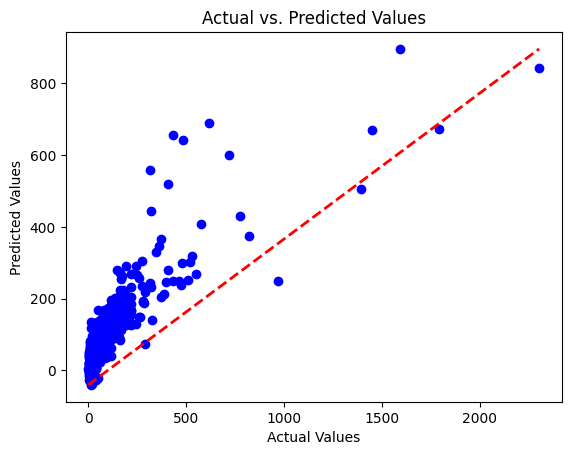

In [518]:
plt.scatter(y_test, y_pred_elastic_net, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred_elastic_net), max(y_pred_elastic_net)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

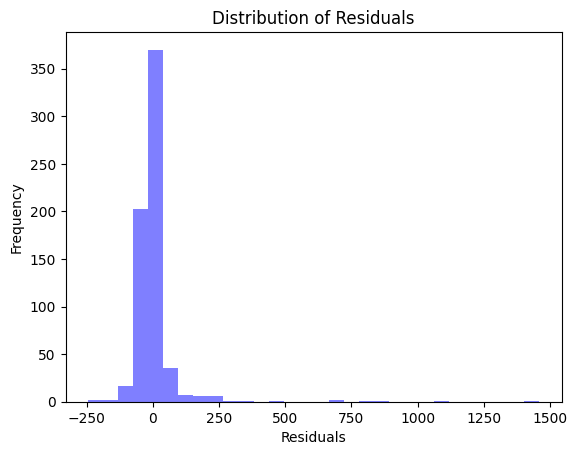

In [519]:
plt.hist(residuals, bins=30, color='blue', alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

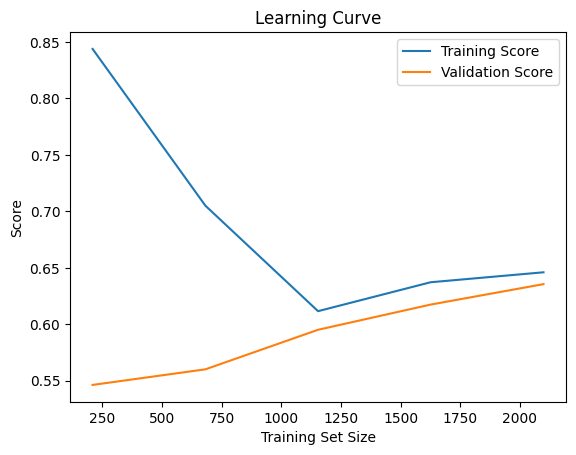

In [520]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(best_elastic_net_model, X_trainval_scaled, y_trainval, cv=5)
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


# Neural Network

### Train, val and test split

In [521]:
# Test, Train and Validation split

from sklearn.model_selection import train_test_split

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.2, random_state=42)

### Pre-processing

In [522]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()

X_trainval_scaled = scaler.fit_transform(X_trainval)
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)
X_test_scaled = scaler.fit_transform(X_test)

In [523]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

nn_model = tf.keras.Sequential([
    layers.Dense(units=32, input_dim=X_trainval.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.2)),
    layers.Dropout(0.2),
    layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l1(0.2)),
    layers.Dropout(0.2),
    layers.Dense(units=1)
])

nn_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

In [524]:
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                3296      
                                                                 
 dropout_15 (Dropout)        (None, 32)                0         
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dropout_16 (Dropout)        (None, 16)                0         
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3841 (15.00 KB)
Trainable params: 3841 (15.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [525]:
es = tf.keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True, monitor='val_loss')

history = nn_model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_data=(X_val_scaled, y_val), callbacks=[es])

Epoch 1/500


66/66 [==============================] - 2s 7ms/step - loss: 23936.4902 - mean_squared_error: 23851.6875 - root_mean_squared_error: 154.4399 - mean_absolute_error: 77.8718 - val_loss: 15807.8740 - val_mean_squared_error: 15721.9941 - val_root_mean_squared_error: 125.3874 - val_mean_absolute_error: 71.2519
Epoch 2/500
66/66 [==============================] - 0s 3ms/step - loss: 22848.6543 - mean_squared_error: 22756.7969 - root_mean_squared_error: 150.8536 - mean_absolute_error: 72.8320 - val_loss: 14256.7773 - val_mean_squared_error: 14156.9678 - val_root_mean_squared_error: 118.9831 - val_mean_absolute_error: 64.1515
Epoch 3/500
66/66 [==============================] - 0s 3ms/step - loss: 20258.0703 - mean_squared_error: 20148.0957 - root_mean_squared_error: 141.9440 - mean_absolute_error: 62.7485 - val_loss: 11239.9639 - val_mean_squared_error: 11117.3701 - val_root_mean_squared_error: 105.4389 - val_mean_absolute_error: 52.2653
Epoch 4/500
66/66 [==============================] - 0s

In [526]:
nn_model.evaluate(X_val_scaled, y_val)

17/17 [==============================] - 0s 3ms/step - loss: 2838.0969 - mean_squared_error: 2741.9634 - root_mean_squared_error: 52.3638 - mean_absolute_error: 27.7514


[2838.096923828125, 2741.96337890625, 52.36376190185547, 27.75135040283203]

In [527]:
# r-squared of nn_model

from sklearn.metrics import r2_score

y_pred = nn_model.predict(X_val_scaled)
r2_score(y_val, y_pred)

17/17 [==============================] - 0s 2ms/step


0.7462415637507862

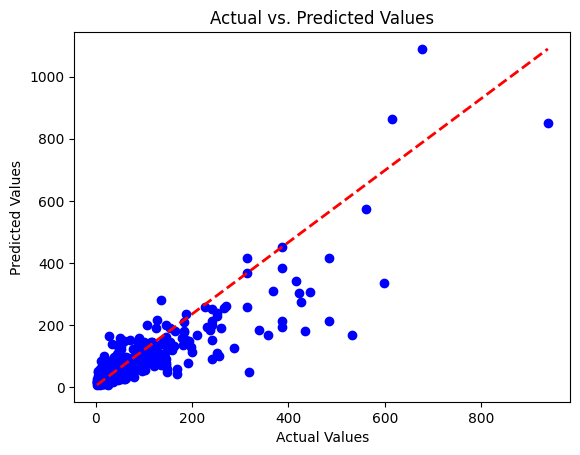

In [528]:
# plot expected vs predicted from the nn_model

plt.scatter(y_val, y_pred, color='blue')
plt.plot([min(y_val), max(y_val)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

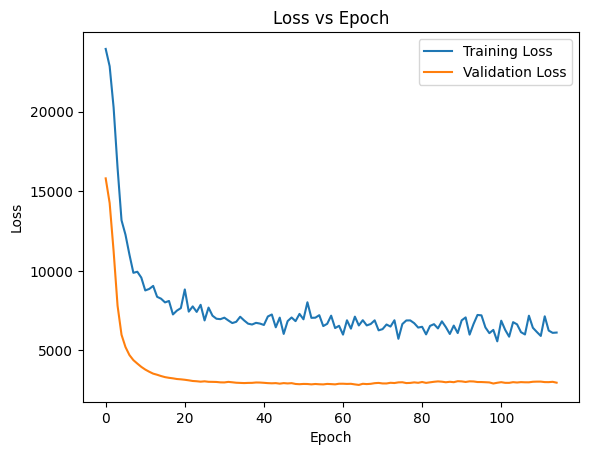

In [529]:
# plot validation loss vs epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

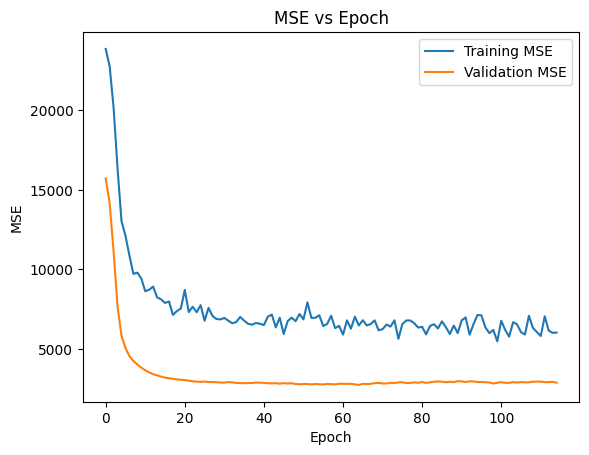

In [530]:
# plot mean squared error vs epochs

plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch')
plt.legend()
plt.show()

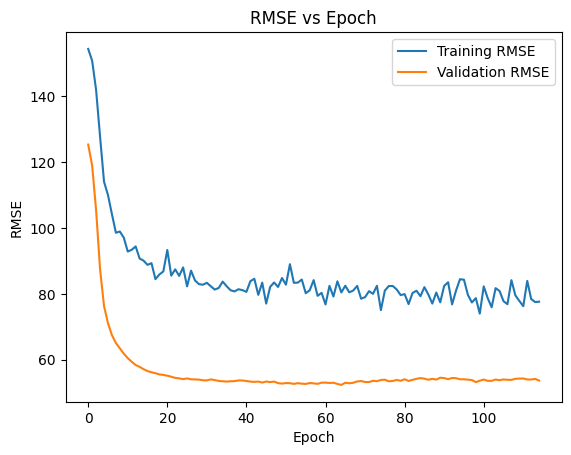

In [531]:
# plot root mean squared error vs epochs

plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epoch')
plt.legend()
plt.show()

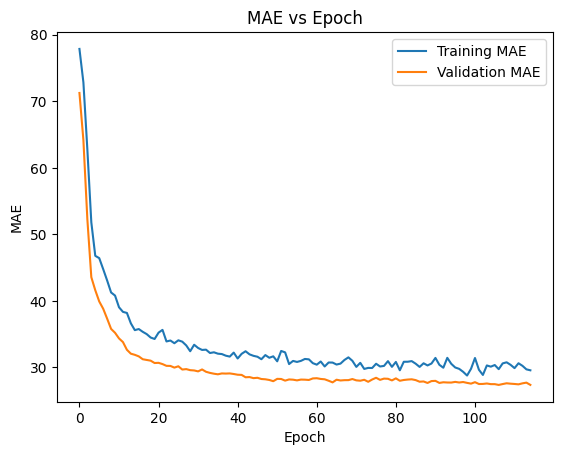

In [532]:
# plot mean absolute error vs epochs

plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE vs Epoch')
plt.legend()
plt.show()

# Simple NN on Train and Validation set

In [533]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

nn_model = tf.keras.Sequential([
    layers.Dense(units=32, input_dim=X_trainval.shape[1], activation='relu', kernel_regularizer=regularizers.l1(0.2)),
    layers.Dropout(0.2),
    layers.Dense(units=16, activation='relu', kernel_regularizer=regularizers.l1(0.2)),
    layers.Dropout(0.2),
    layers.Dense(units=1)
])

nn_model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=[tf.keras.metrics.MeanSquaredError(), tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])

In [534]:
es = tf.keras.callbacks.EarlyStopping(patience=100, restore_best_weights=True, monitor='val_loss')

history = nn_model.fit(X_trainval_scaled, y_trainval, epochs=500, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[es])

Epoch 1/500


82/82 [==============================] - 2s 7ms/step - loss: 22364.5312 - mean_squared_error: 22282.3164 - root_mean_squared_error: 149.2726 - mean_absolute_error: 76.9986 - val_loss: 40321.0156 - val_mean_squared_error: 40238.2188 - val_root_mean_squared_error: 200.5947 - val_mean_absolute_error: 87.1109
Epoch 2/500
82/82 [==============================] - 0s 3ms/step - loss: 20824.9883 - mean_squared_error: 20733.2285 - root_mean_squared_error: 143.9904 - mean_absolute_error: 69.7405 - val_loss: 37339.7500 - val_mean_squared_error: 37235.7734 - val_root_mean_squared_error: 192.9657 - val_mean_absolute_error: 76.0410
Epoch 3/500
82/82 [==============================] - 0s 3ms/step - loss: 17307.9785 - mean_squared_error: 17189.3926 - root_mean_squared_error: 131.1083 - mean_absolute_error: 56.3472 - val_loss: 31423.1348 - val_mean_squared_error: 31289.5957 - val_root_mean_squared_error: 176.8887 - val_mean_absolute_error: 61.2507
Epoch 4/500
82/82 [==============================] - 0s

In [535]:
nn_model.evaluate(X_test_scaled, y_test)

21/21 [==============================] - 0s 2ms/step - loss: 9176.3984 - mean_squared_error: 9066.4863 - root_mean_squared_error: 95.2181 - mean_absolute_error: 31.3140


[9176.3984375, 9066.486328125, 95.21810150146484, 31.314001083374023]

In [536]:
# r-squared of nn_model

from sklearn.metrics import r2_score

y_pred = nn_model.predict(X_test_scaled)
r2_score(y_test, y_pred)

21/21 [==============================] - 0s 2ms/step


0.7242310495995793

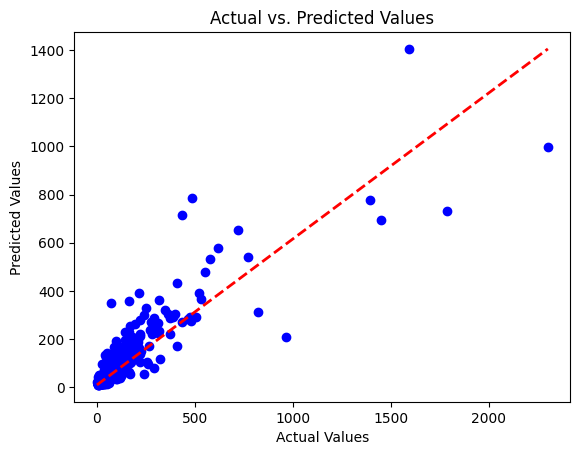

In [537]:
# plot expected vs predicted from the nn_model

plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

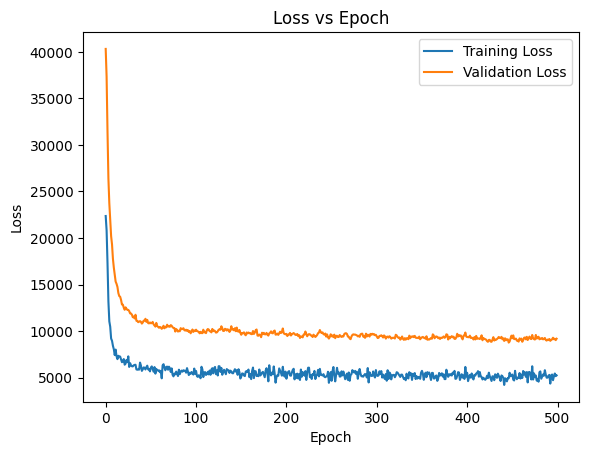

In [538]:
# plot validation loss vs epochs

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.show()

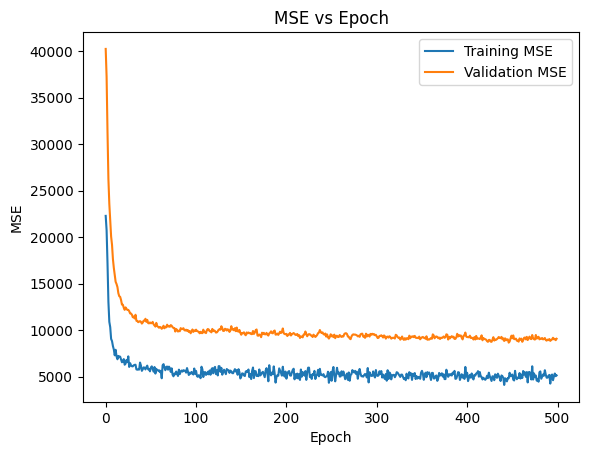

In [539]:
# plot mean squared error vs epochs

plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('MSE vs Epoch')
plt.legend()
plt.show()

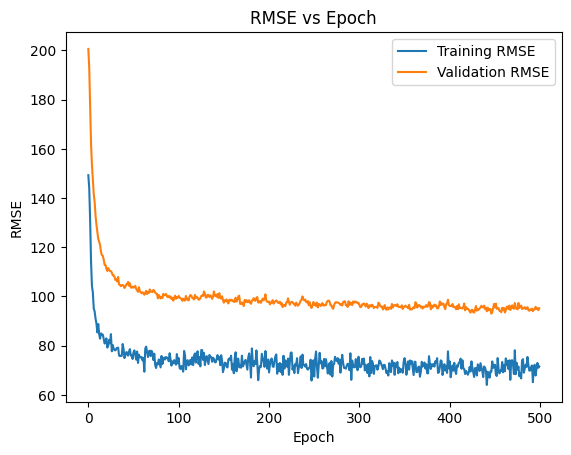

In [540]:
# plot root mean squared error vs epochs

plt.plot(history.history['root_mean_squared_error'], label='Training RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.title('RMSE vs Epoch')
plt.legend()
plt.show()

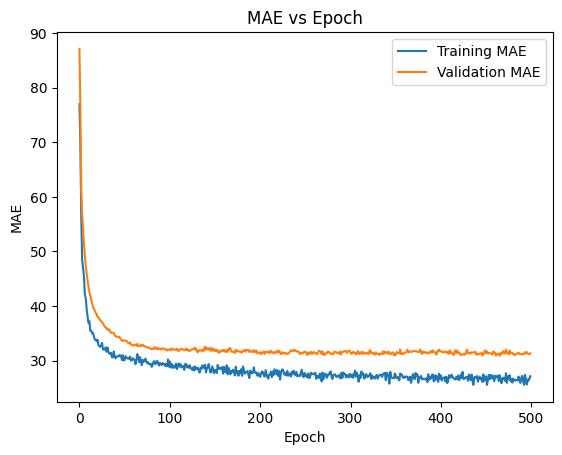

In [541]:
# plot mean absolute error vs epochs

plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.title('MAE vs Epoch')
plt.legend()
plt.show()